In [ ]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Mounted at /content/drive


In [197]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import pingouin as pg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [198]:

pd.set_option('display.max_columns', None)
data = pd.read_csv('OnlineNewsPopularity.csv')

# Data Preprocessing

In [199]:
data.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length   num_keywords  \
0          0.0               4.680365            5.0   
1          0.0               4.913725            4.0   
2          0.0               4.393365            6.0   
3          0.0               4.404896            7.0   
4          0.0               4.682836            7.0   

    data_channel_is_lifestyle   data_channel_is_entertainment  \
0                         0.0                             1.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             1.0   
4                         0.0                             0.0   

    data_channel_is_bus   data_channel_is_socmed   data_channel_is_tech  \
0                   0.0                      0.0                    0.0   
1                   1.0                      0.0                    0.0   
2                   1.0                      0.0                    0.0   
3                   0.0                      0.0                    0.0   
4                   0.0                      0.0                    1.0   

    data_channel_is_world   kw_min_min   kw_max_min   kw_avg_min   kw_min_max  \
0                     0.0          0.0          0.0          0.0          0.0   
1                     0.0          0.0          0.0          0.0          0.0   
2                     0.0          0.0          0.0          0.0          0.0   
3                     0.0          0.0          0.0          0.0          0.0   
4                     0.0          0.0          0.0          0.0          0.0   

    kw_max_max   kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

    self_reference_min_shares   self_reference_max_shares  \
0                       496.0                       496.0   
1                         0.0                         0.0   
2                       918.0                       918.0   
3                         0.0                         0.0   
4                       545.0                     16000.0   

    self_reference_avg_sharess   weekday_is_monday   weekday_is_tuesday  \
0                   496.000000                 1.0                  0.0   
1                     0.000000                 1.0                  0.0   
2                   918.000000                 1.0         

In [200]:
data.shape

(39644, 61)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [202]:


data=data.drop_duplicates()

In [203]:
#checking for all variables that contain missing values
missing_val=data.isna().sum()
missing_val[missing_val>0]

Series([], dtype: int64)

there is no missing values

In [204]:
print(list(data.columns))

['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', '

we remarked there is space in the columns name , so we remove it

In [205]:
#Removing Space Character from Feature names
data.columns=data.columns.str.replace(" ","")

In [206]:
# n_tokens_content represents Number of words in the content
# However its minimum value to be 0. Means that there are articles that do not have any content.
# Such records should be dropped as their related attributes add no meaning to our analysis
# find number of rows that contain 0 for n_tokens_content
num_of_nowords=data[data['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)


number of news items with no words 1181


so we drop these rows

In [207]:
# Drop these items or rows with n_tokens_content = 0
data = data[data['n_tokens_content'] != 0]

In [208]:
# Since URL is a non-numeric attribute and will not add value to our analysis so dropping it from the dataset
# Also timedelta is a non-predictive attribute and not a feature of the data set so we can drop it from the dataset

data = data.drop('url',axis=1)
data = data.drop('timedelta',axis=1)

#### Handling Column's types

In [209]:
data.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

we should change the type of columns of categories to binary because it is one hot encoding

In [210]:
#convert to binary
_binary_features = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']
for f in _binary_features:
    data[f] = data[f].astype('bool')


The columns that are number of (attribute) , should be converted to Integer

In [211]:
#convert to interger
_int_features = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords']
for f in _int_features:
    data[f] = data[f].astype('int64')



# EDA

Categorize the features in variables : ***textual , multimedia , keywords, content's type, self reference, date, lda, subjectivity polarity , target***.

In [212]:
textual_features =  ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
                    'n_non_stop_unique_tokens', 'average_token_length']
multimedia_features =  ['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos']
keyword_features = ['num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
                  'kw_max_avg']
content_type_features = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
                         'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

self_reference_features = [
    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess'
]

weekday_features = [
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
    'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
    'weekday_is_sunday', 'is_weekend'
]


lda_features = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']


subjectivity_polarity_features = [
    'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words',
    'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
    'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity',
    'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity',
    'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity',
    'abs_title_sentiment_polarity'
]


target_feature = 'shares'


## Extract Insights from Data

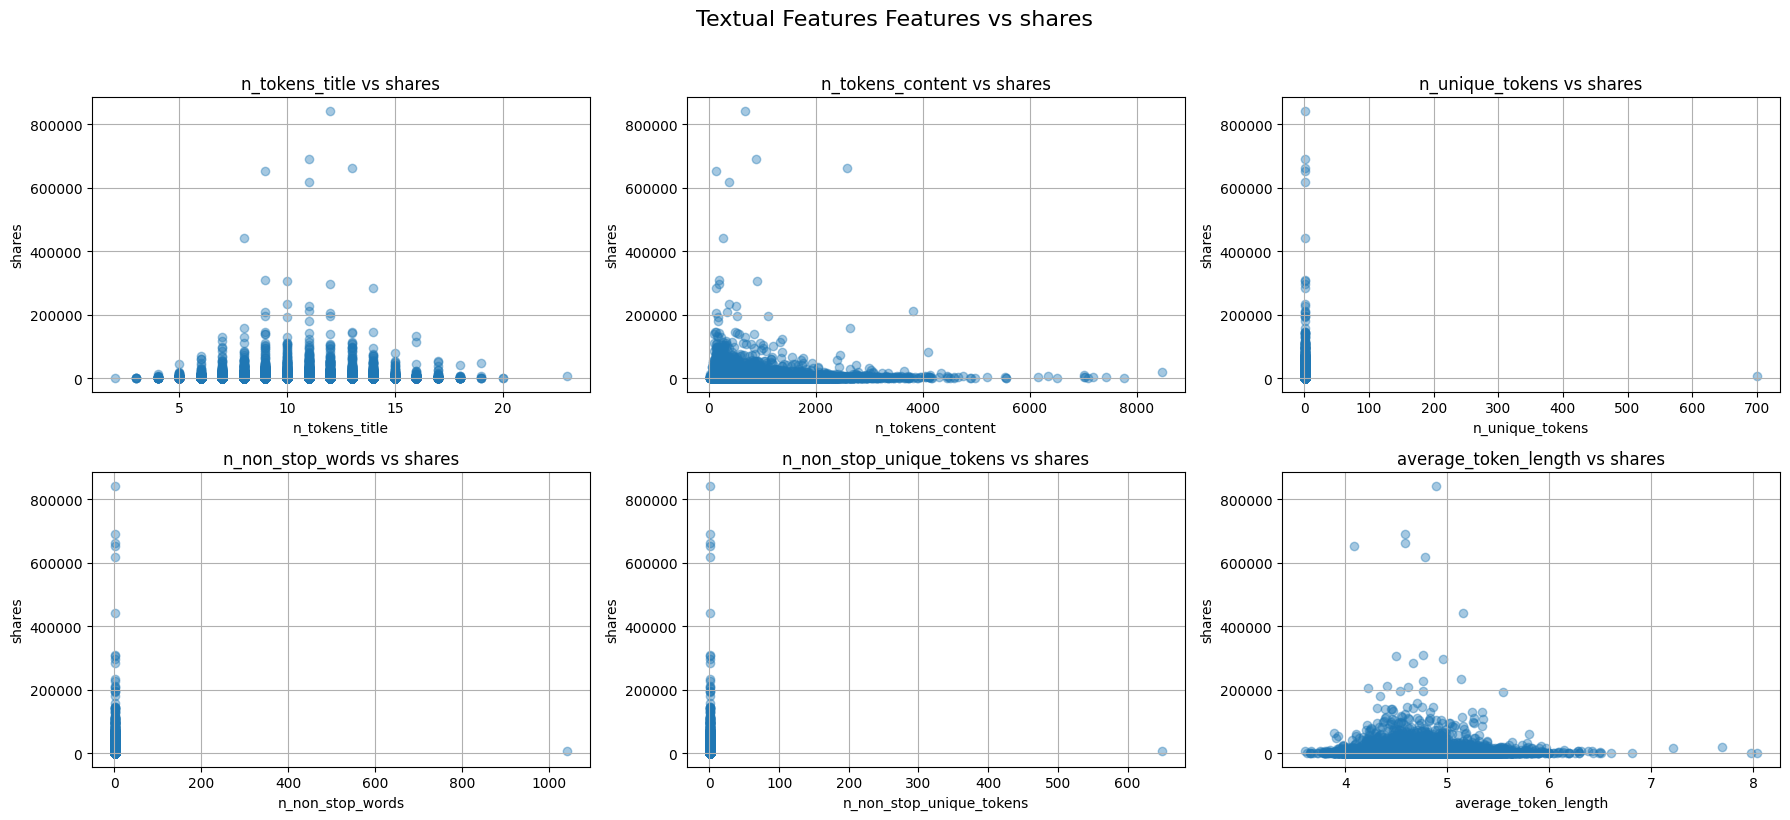

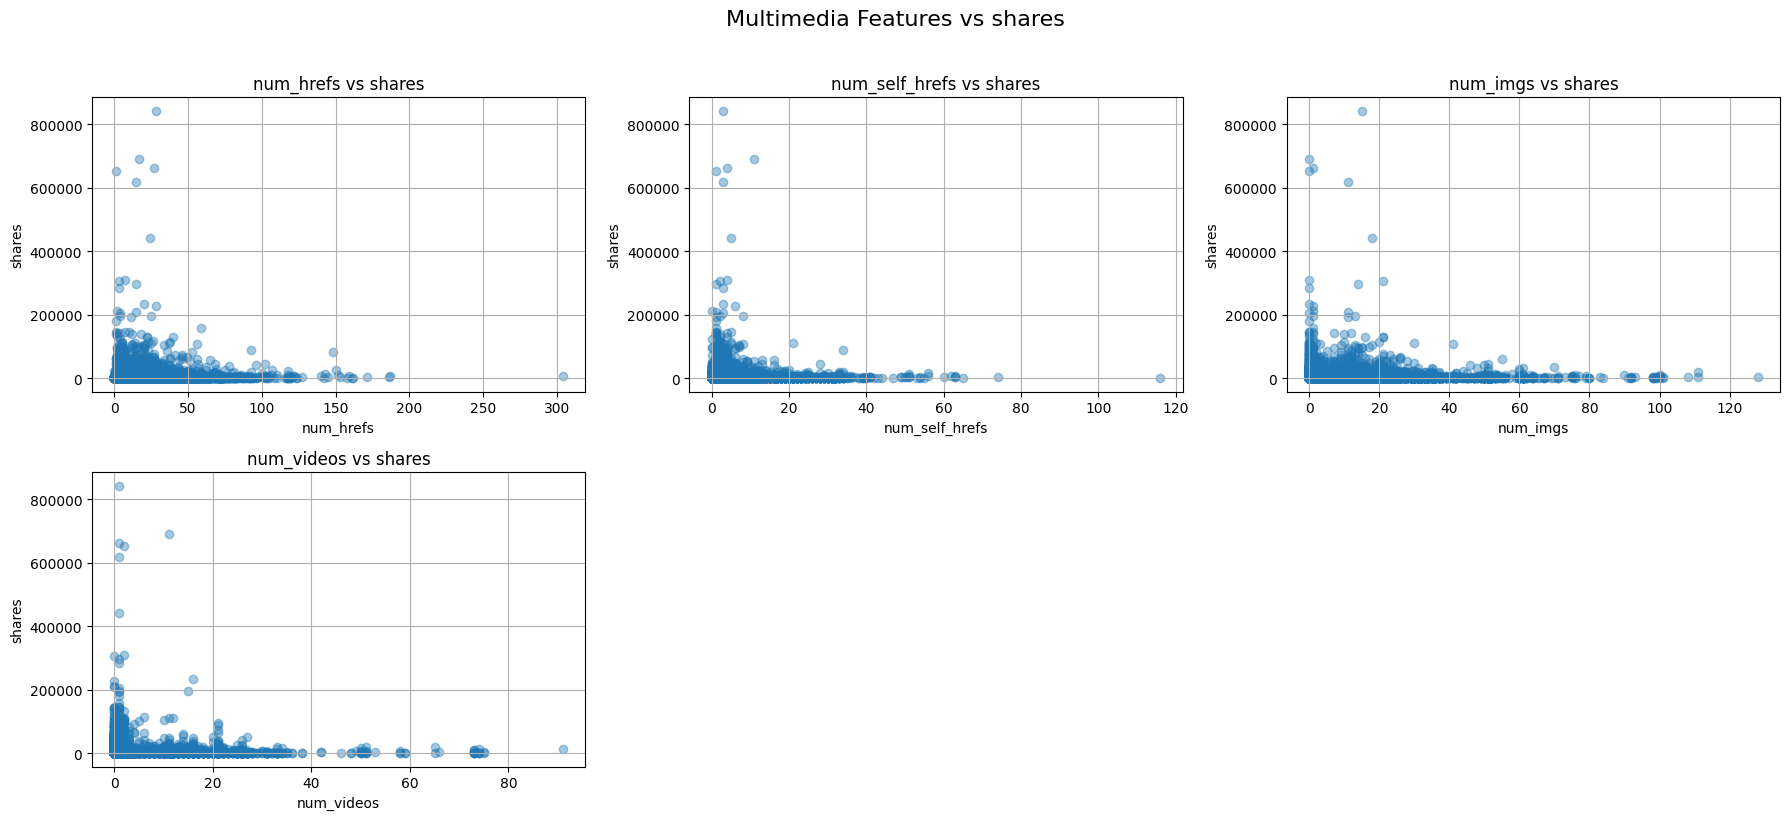

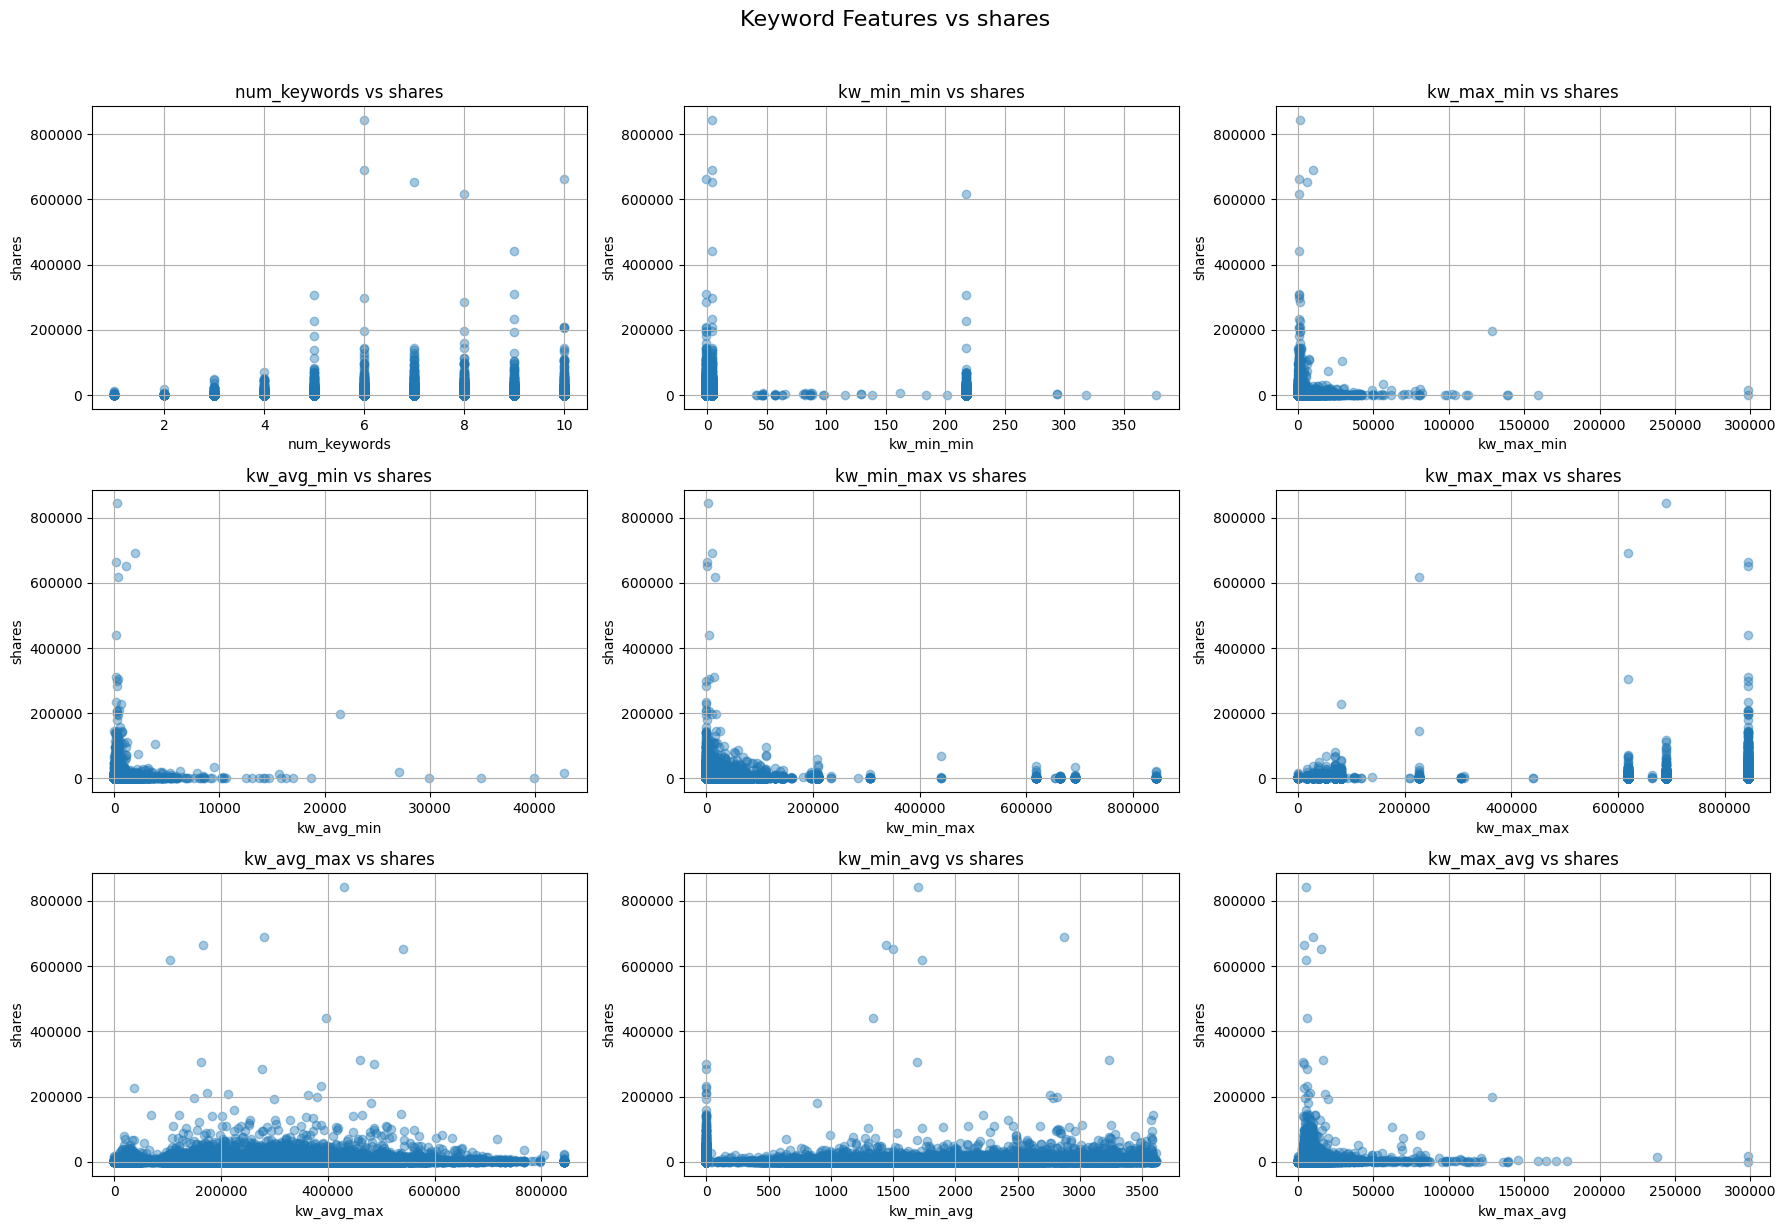

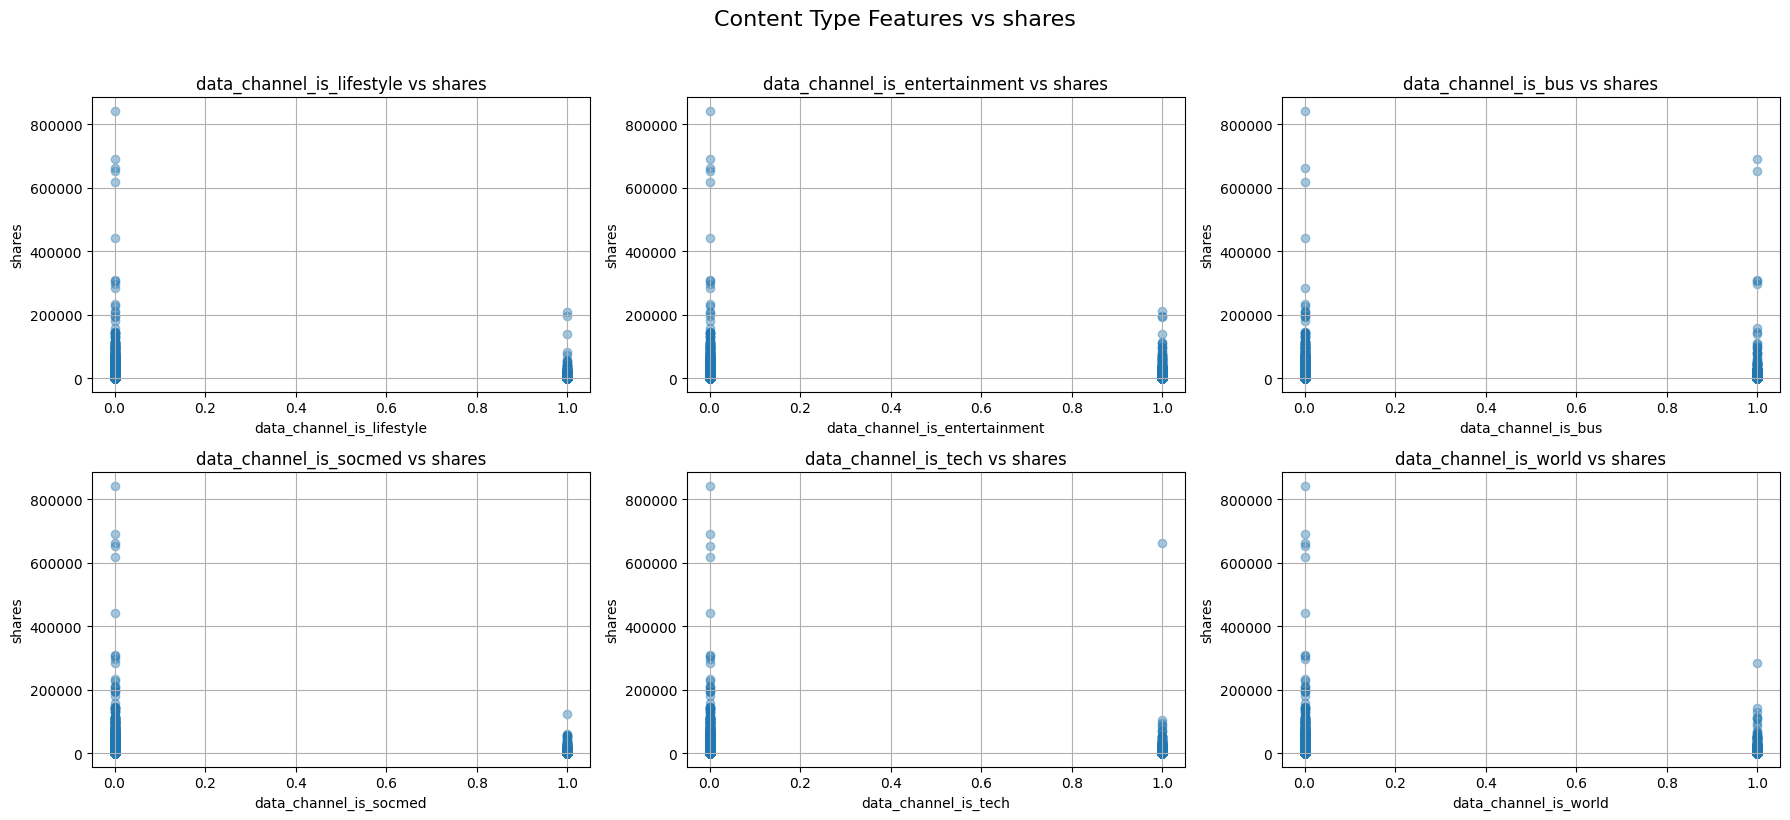

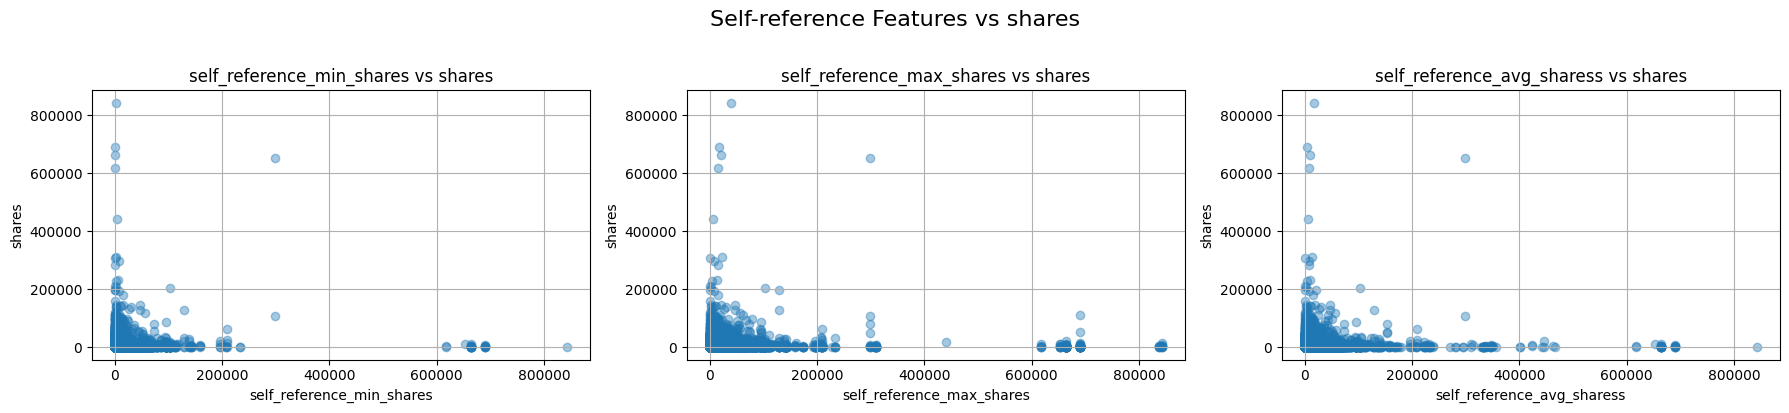

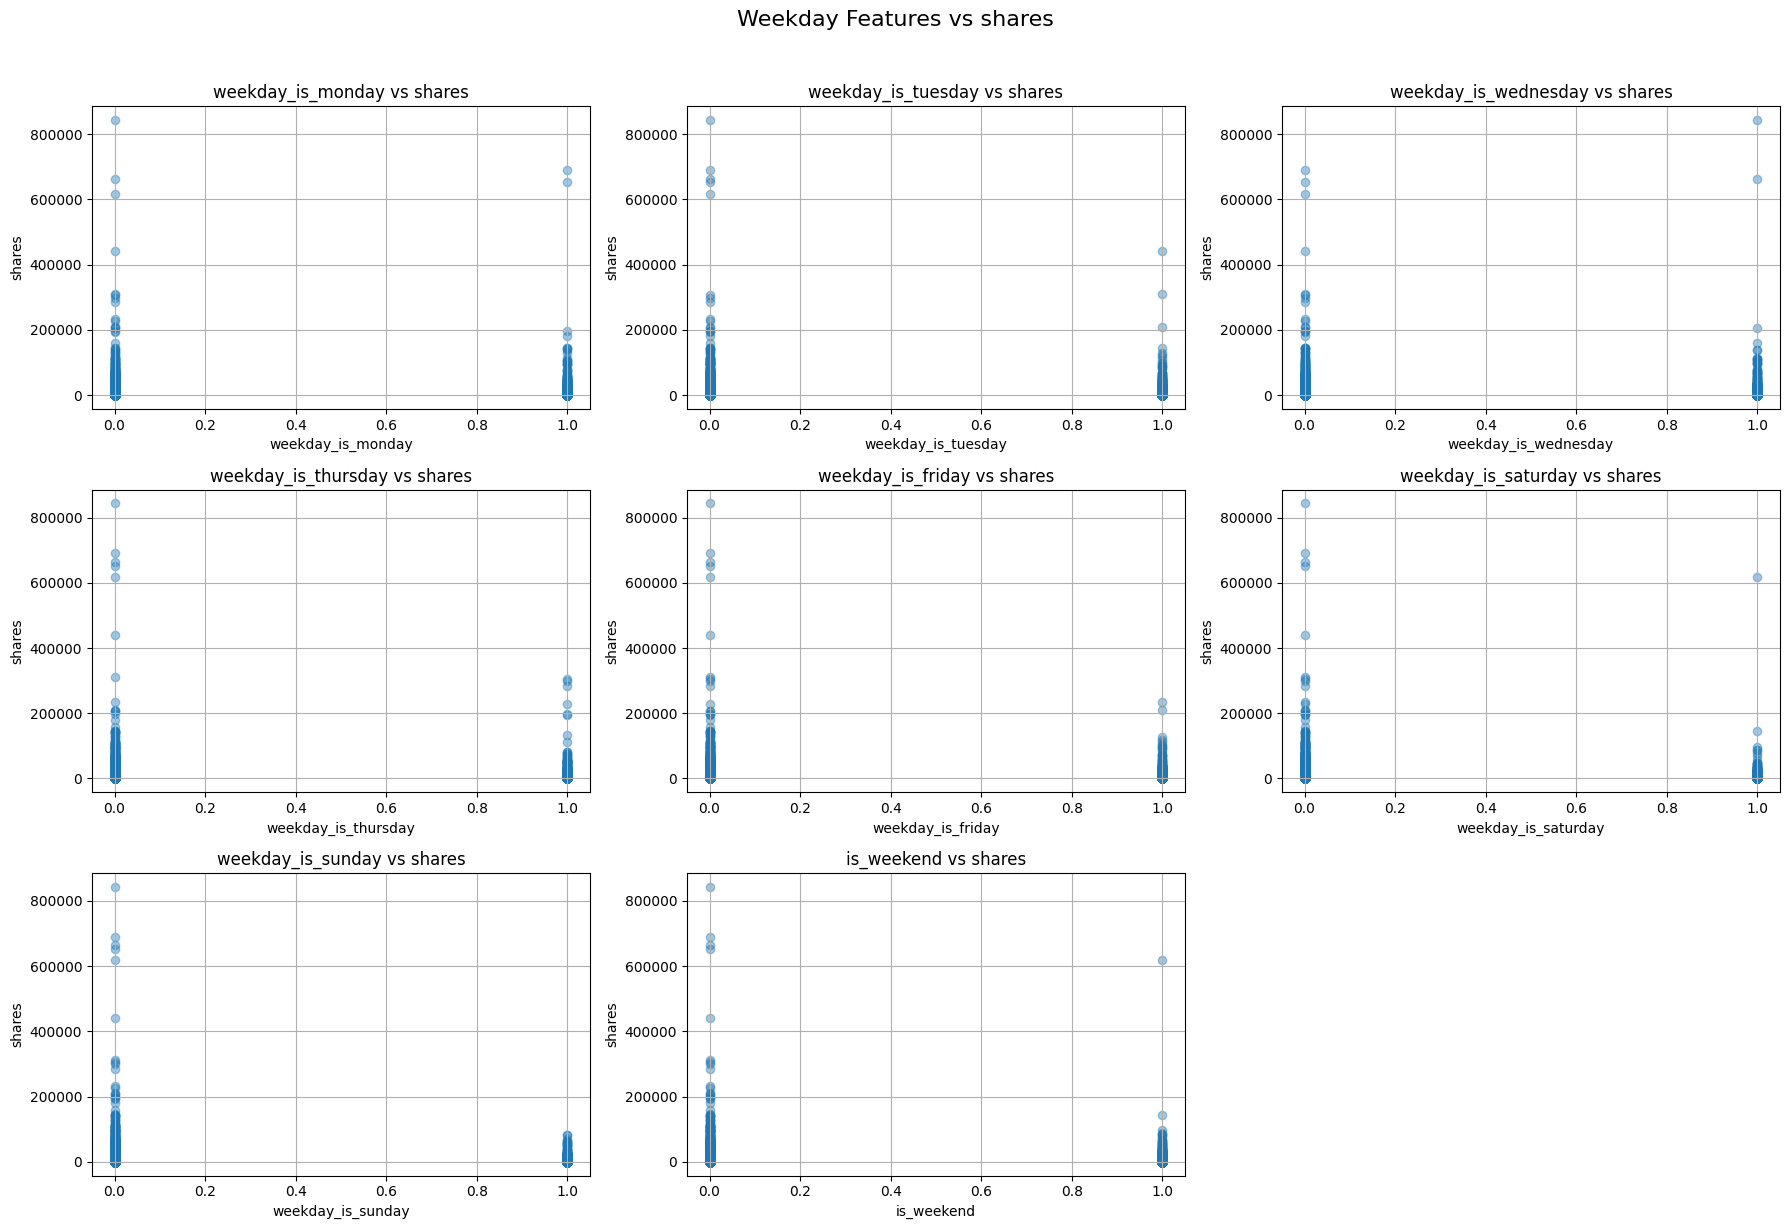

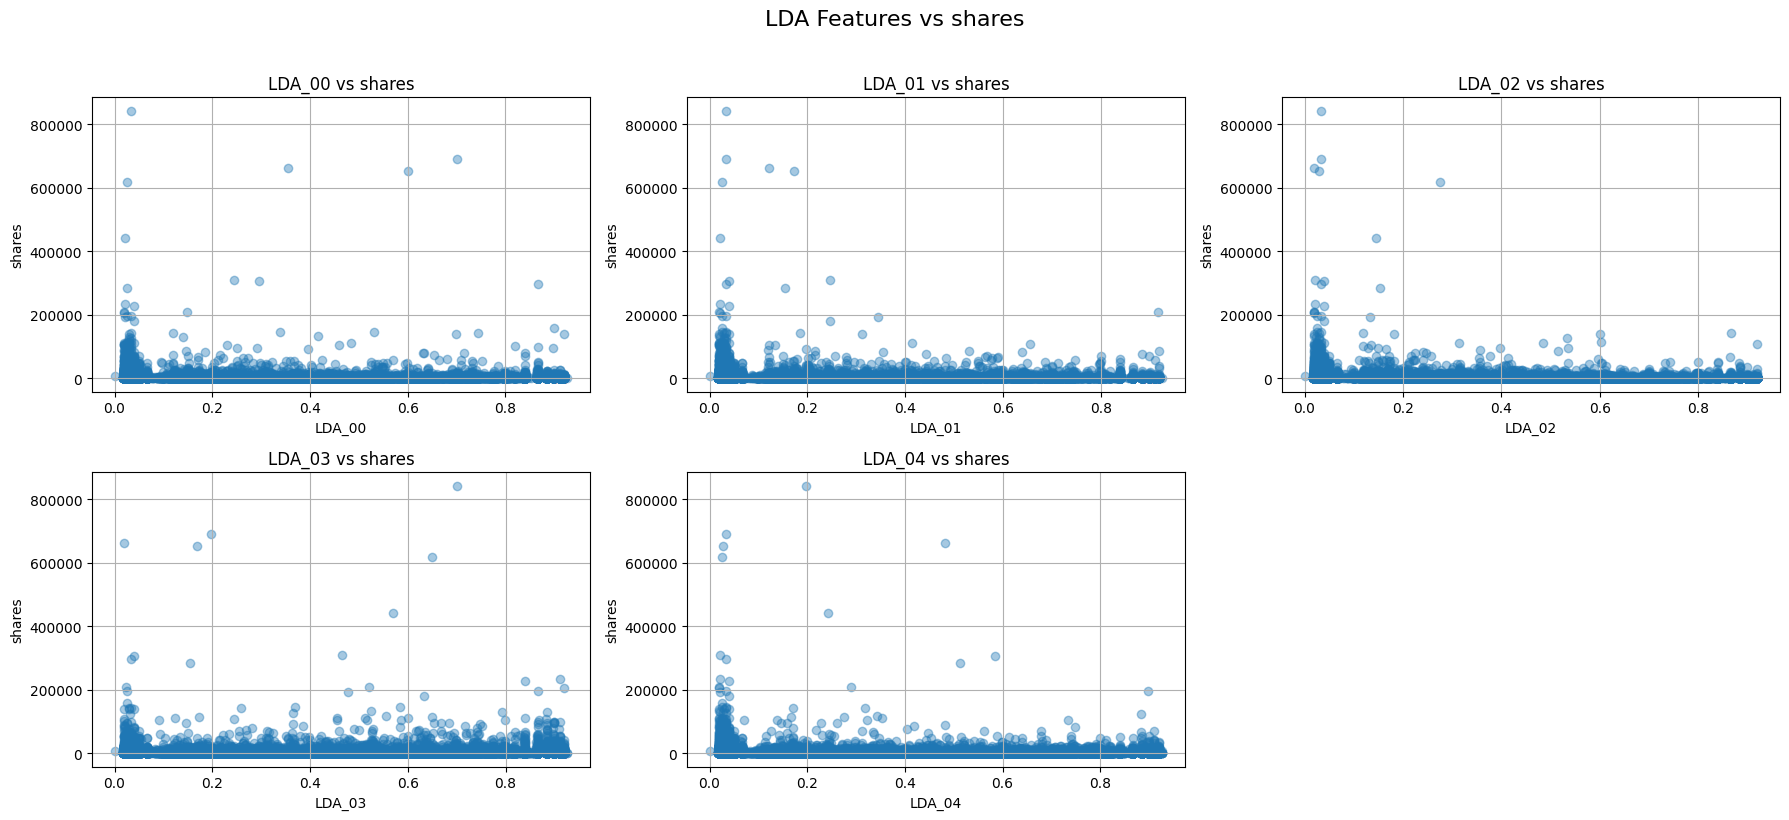

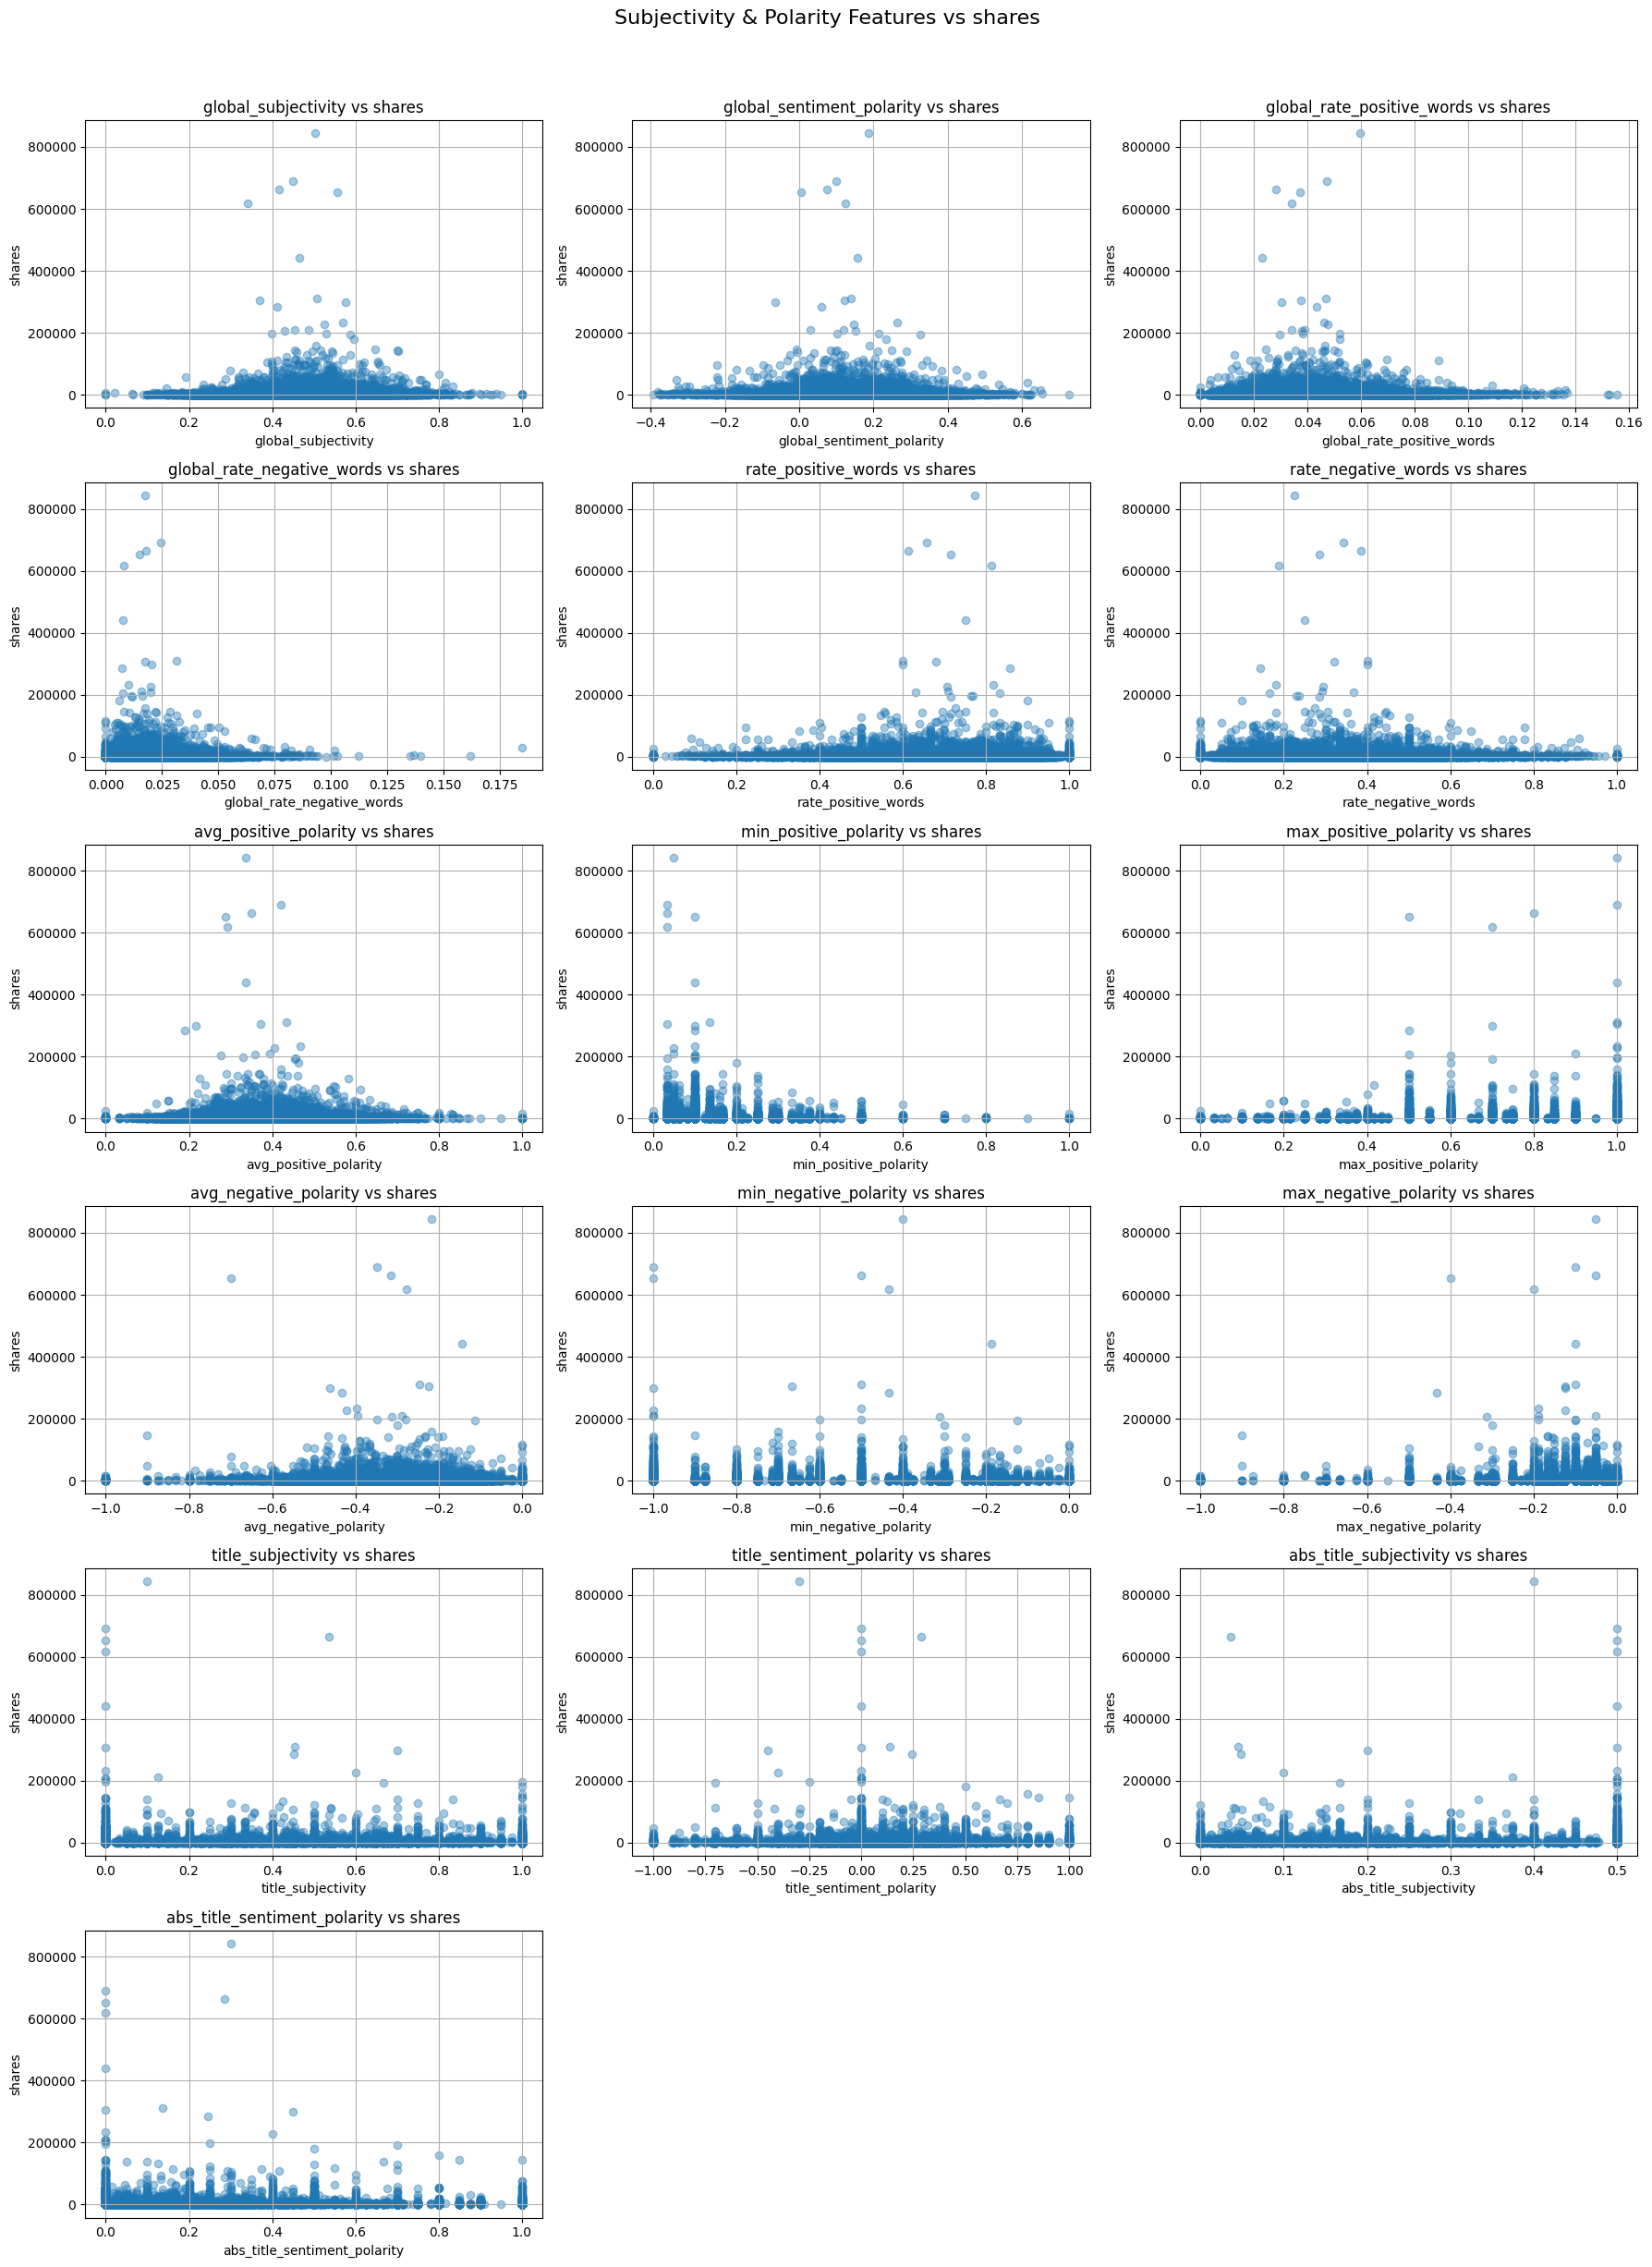

In [213]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_group(features, group_name):
    n = len(features)
    cols = 3
    rows = (n + cols - 1) // cols
    plt.figure(figsize=(6 * cols, 4 * rows))
    
    for i, feature in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        plt.scatter(data[feature], data['shares'], alpha=0.4)
        plt.xlabel(feature)
        plt.ylabel('shares')
        plt.title(f'{feature} vs shares')
        plt.grid(True)

    plt.suptitle(f'{group_name} Features vs shares', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


# === Plot each group ===
plot_feature_group(textual_features, "Textual Features")

plot_feature_group(multimedia_features, "Multimedia")
plot_feature_group(keyword_features, "Keyword")
plot_feature_group(content_type_features, "Content Type")
plot_feature_group(self_reference_features, "Self-reference")
plot_feature_group(weekday_features, "Weekday")
plot_feature_group(lda_features, "LDA")
plot_feature_group(subjectivity_polarity_features, "Subjectivity & Polarity")


In [214]:
mean_shares, median_shares = data['shares'].mean(),data['shares'].median()
print(f'Mean article shares = {mean_shares}')
print(f'Median article share = {median_shares}')


Mean article shares = 3355.3603983048642
Median article share = 1400.0


In [215]:
# Create a new target variable just for eda
median_shares = data['shares'].median()
data['is_popular'] = data['shares'].apply(lambda x: 0 if x <median_shares else 1)

array([[<Axes: title={'center': 'is_popular'}>]], dtype=object)

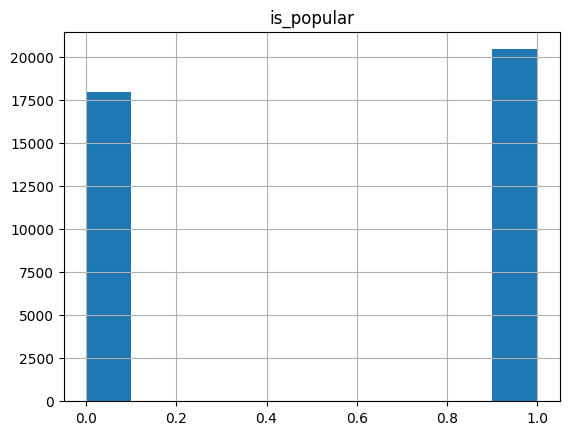

In [216]:
data.hist(column='is_popular')

### Data analysis based on content type

In [217]:
# content type columns
content_type=data[content_type_features]



In [218]:
data['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

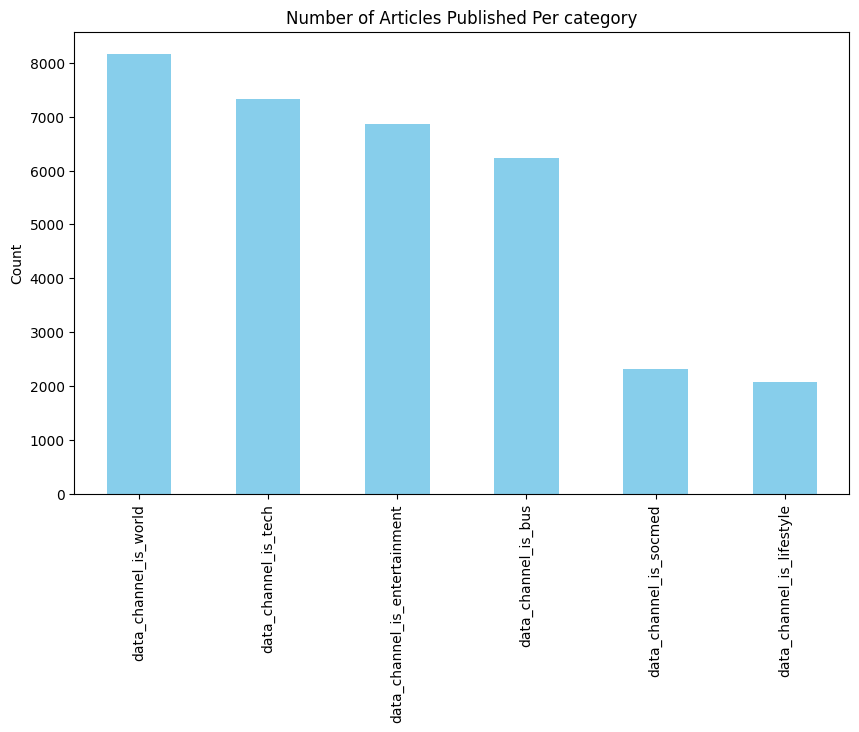

In [219]:
weekday_counts = data[content_type_features].sum().sort_values(ascending=False)
weekday_counts.plot(kind='bar', title='Number of Articles Published Per category', figsize=(10, 6), color='skyblue')
plt.ylabel("Count")
plt.show()

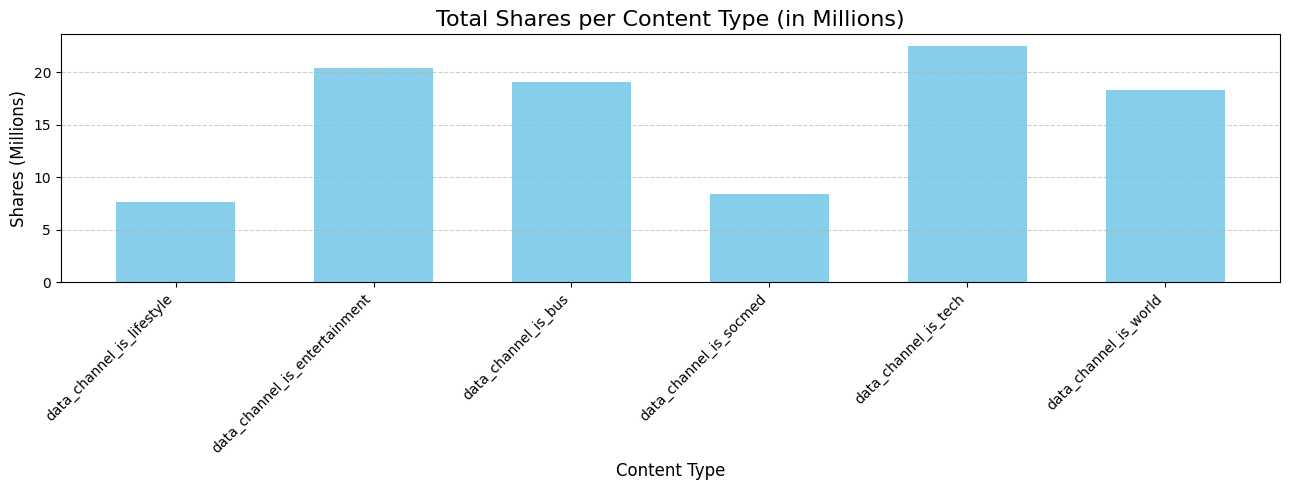

In [220]:

shares_by_content_type = []
for col in content_type_features:
    total_shares = data[data[col] == 1]['shares'].sum()
    shares_by_content_type.append(total_shares)
shares_by_content_type_million = [x / 1e6 for x in shares_by_content_type]


plt.figure(figsize=(13, 5))
plt.bar(np.arange(len(content_type_features)), shares_by_content_type_million, color='skyblue', width=0.6)

plt.xticks(np.arange(len(content_type_features)), content_type_features, rotation=45, ha='right')
plt.title("Total Shares per Content Type (in Millions)", fontsize=16)
plt.xlabel("Content Type", fontsize=12)
plt.ylabel("Shares (Millions)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



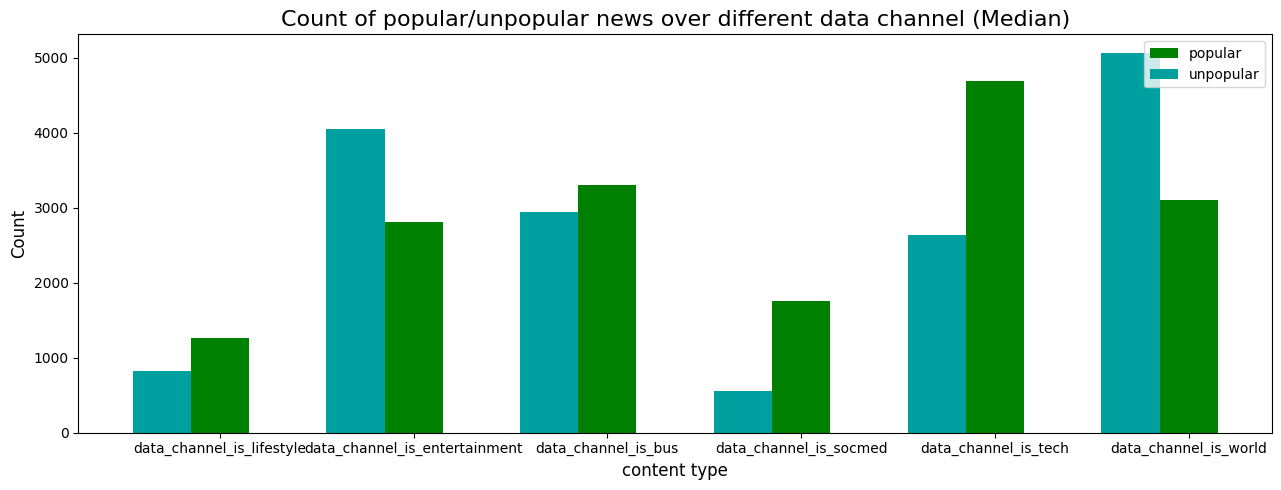

In [221]:

Unpop3 = data[data['shares'] < median_shares]
Pop3 = data[data['shares'] >= median_shares]

Unpop_day3 = Unpop3[content_type_features].sum().values
Pop_day3 = Pop3[content_type_features].sum().values

fig = plt.figure(figsize=(13, 5))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize=16)
plt.bar(np.arange(len(content_type_features)), Pop_day3, width=0.3, align="center", color='g', label="popular")
plt.bar(np.arange(len(content_type_features)) - 0.3, Unpop_day3, width=0.3, align="center", color='#00A0A0', label="unpopular")
plt.xticks(np.arange(len(content_type_features)), content_type_features)
plt.ylabel("Count", fontsize=12)
plt.xlabel("content type", fontsize=12)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

data_channel_is_world, tech, and entertainment had the highest number of total articles.

These three topics likely had more content being produced or scraped in general.


### Data analysis based on Date

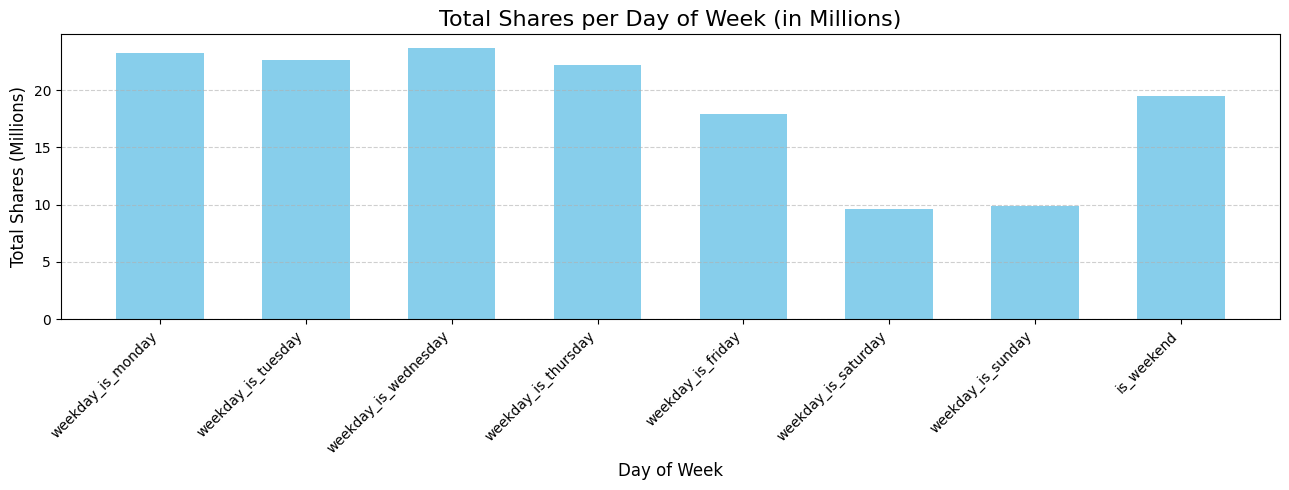

In [222]:

columns_day = weekday_features

# Compute total shares per weekday feature and convert to millions
shares_by_day_million = [
    data[data[col] == 1]['shares'].sum() / 1e6 for col in columns_day
]

# Plot
plt.figure(figsize=(13, 5))
plt.bar(np.arange(len(columns_day)), shares_by_day_million, color='skyblue', width=0.6)

plt.xticks(np.arange(len(columns_day)), columns_day, rotation=45, ha='right')
plt.title("Total Shares per Day of Week (in Millions)", fontsize=16)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Total Shares (Millions)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("total_shares_by_day.pdf")
plt.show()



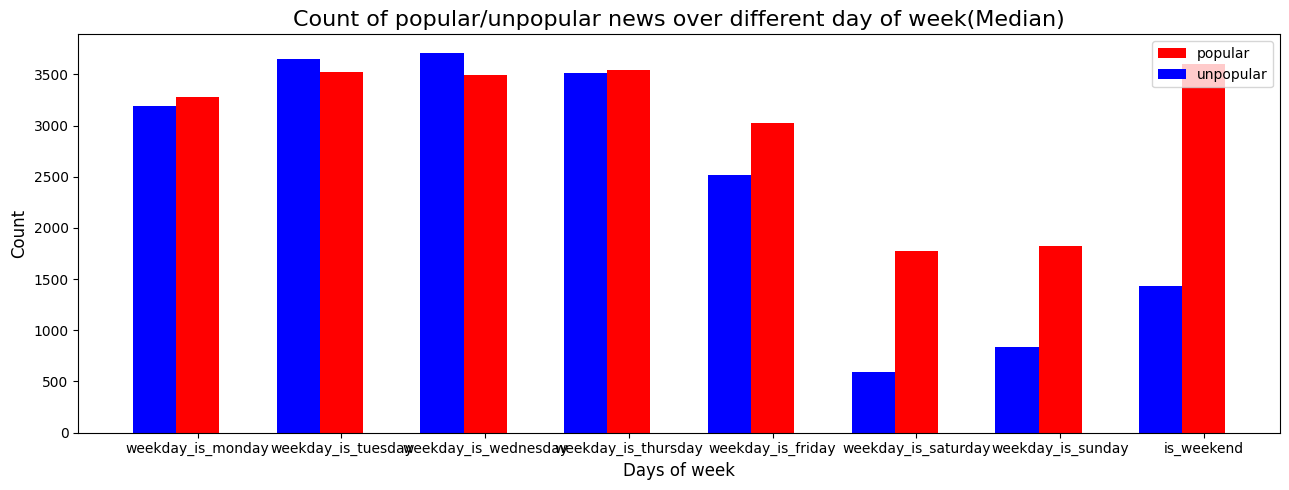

In [223]:

columns_day = weekday_features

unpop = data[data['shares'] < median_shares]
pop = data[data['shares'] >= median_shares]

unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize=(13, 5))
pl.title("Count of popular/unpopular news over different day of week(Median)", fontsize=16)
pl.bar(np.arange(len(columns_day)), pop_day, width=0.3, align="center", color='r', label="popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width=0.3, align="center", color='b', label="unpopular")
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Count", fontsize=12)
pl.xlabel("Days of week", fontsize=12)
pl.legend(loc='upper right')
pl.tight_layout()
pl.savefig("days.pdf")
pl.show()


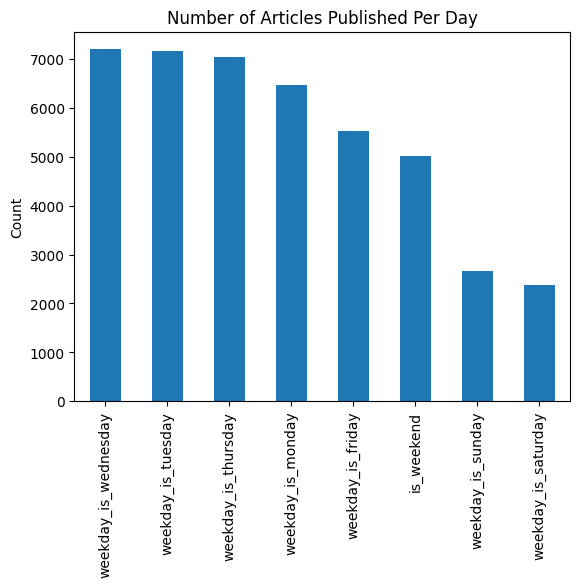

In [224]:

weekday_counts = data[weekday_features].sum().sort_values(ascending=False)
weekday_counts.plot(kind='bar', title='Number of Articles Published Per Day')
plt.ylabel("Count")
plt.show()


- Wednesday is the top day with number of articles shared
- Saturday is the least day with min number of articles shared

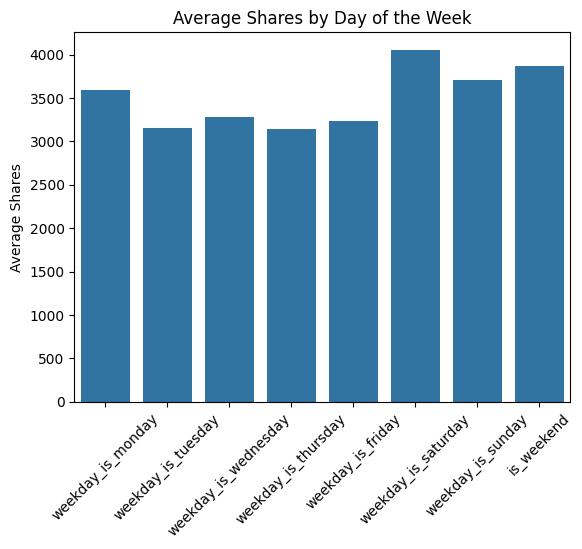

In [225]:
avg_shares_by_day = {
    day: data[data[day] == 1]['shares'].mean() for day in weekday_features
}

sns.barplot(x=list(avg_shares_by_day.keys()), y=list(avg_shares_by_day.values()))
plt.xticks(rotation=45)
plt.title("Average Shares by Day of the Week")
plt.ylabel("Average Shares")
plt.show()


- The most shared articles in average is on Friday

### Data Analysis based on LDA

C:\Users\ACER\AppData\Local\Temp\ipykernel_4116\1563437355.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




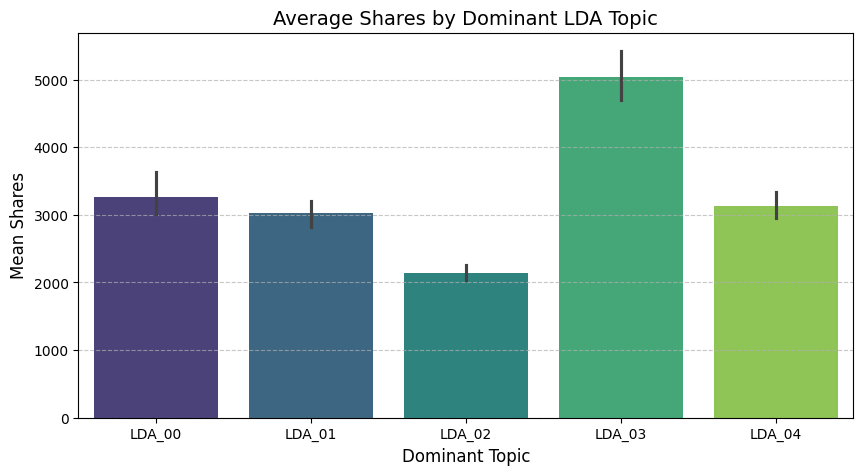

In [226]:
plt.figure(figsize=(10, 5))

# Compute mean shares per dominant topic (without adding a column)
sns.barplot(
    x=data[lda_features].idxmax(axis=1),
    y=data['shares'],
    order=lda_features,  # maintains topic order
    palette="viridis"
)

plt.title("Average Shares by Dominant LDA Topic", fontsize=14)
plt.xlabel("Dominant Topic", fontsize=12)
plt.ylabel("Mean Shares", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The 3rd topic is the most shared

## Handling Target Variable

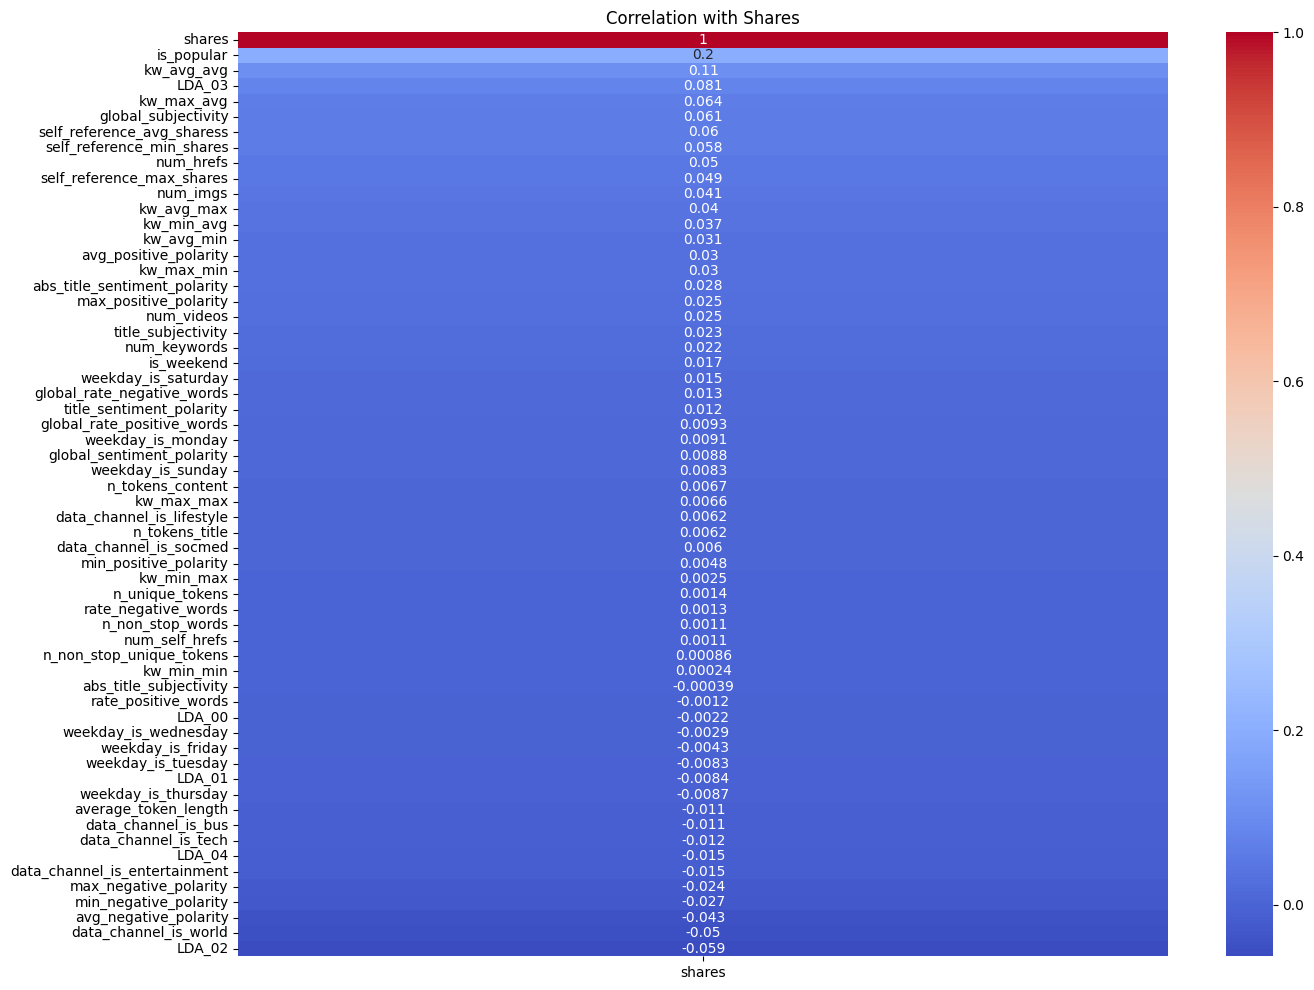

In [227]:
# Correlation matrix for key variables
correlation_matrix = data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix[['shares']].sort_values(by='shares', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Shares')
plt.show()

**Analysis of Feature Correlations with Shares**

Looking at the correlation heatmap you've provided, I can analyze how various features correlate with the target variable (shares). This analysis will help us understand which features are most predictive of article popularity.



**Top Positively Correlated Features**
1. **global_subjectivity** (0.13): Articles with more subjective language tend to get more shares. This suggests that opinionated content may engage readers more than purely factual reporting.

2. **is_weekend** (0.12): Articles published on weekends receive more shares. This could be because readers have more leisure time on weekends or because weekend content is tailored differently.

3. **LDA_03** (0.12): This latent Dirichlet allocation topic has a positive correlation, indicating that certain topics are more likely to be shared.

4. **kw_min_avg** (0.11): The minimum average shares of an article's keywords correlates positively with shares, suggesting that using consistently popular keywords helps.

5. **num_hrefs** (0.10): Articles with more external links tend to get more shares. This might indicate that well-referenced content is valued by readers.

**Top Negatively Correlated Features**
1. **LDA_02** (-0.16) and **data_channel_is_world** (-0.16): These have the strongest negative correlations, suggesting that world news topics or specific content types are less likely to be shared.

2. **data_channel_is_entertainment** (-0.085): Interestingly, entertainment articles have a negative correlation with shares.

3. **n_non_stop_unique_tokens** (-0.058): Articles with more unique non-stop words (likely more complex or specialized vocabulary) get fewer shares.

4. **LDA_01** (-0.053): This topic is less likely to generate shares.

5. **avg_negative_polarity** (-0.047): Articles with more intensely negative language get fewer shares.

### Weekday Patterns:
- **Weekend days** (Saturday: 0.084, Sunday: 0.082) have positive correlations
- **Weekdays** (Tuesday: -0.033, Wednesday: -0.038, Thursday: -0.031, Monday: -0.011) have negative correlations
- This reinforces that weekend content tends to be more shareable

### Content Characteristics:
- **Self-references** (self_reference_avg_sharess: 0.085, self_reference_min_shares: 0.085): Articles referencing other popular Mashable content tend to get more shares.
- **Keyword metrics** show positive correlations, suggesting that strategic keyword selection influences sharing behavior.
- **Subjectivity and positive sentiment** correlate positively with shares (global_subjectivity: 0.13, avg_positive_polarity: 0.067)
- **Negative sentiment** correlates negatively with shares (avg_negative_polarity: -0.047)

## Key Insights:

1. **Content tone matters**: Subjective, positive content gets more shares than negative or purely objective content.

2. **Timing is important**: Weekend publishing leads to more shares than weekday publishing.

3. **Topic influence**: Certain topics (represented by LDA features) strongly influence sharing behavior, both positively and negatively.

4. **Internal referencing works**: Articles that reference other popular Mashable content tend to receive more shares.

5. **Low correlation magnitudes**: Even the strongest correlations are relatively weak (max 0.13), indicating that predicting shares is complex and no single feature is highly predictive on its own.

## Recommendations for Feature Selection:

1. **Top features to keep**: global_subjectivity, is_weekend, LDA_03, kw_min_avg, num_hrefs, self-reference metrics

2. **Features to consider dropping**: Those with very low correlation values (|r| < 0.01)

3. **For dimensionality reduction**: Focus primarily on keeping features with stronger correlations (|r| > 0.05) and consider dropping weekday features in favor of a single weekend/weekday indicator.


### Distribution of target variable shares

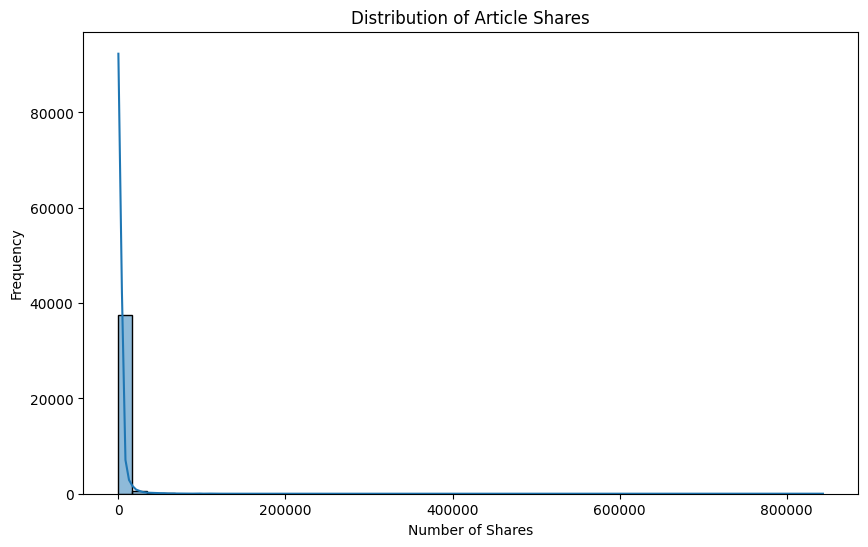

In [228]:
# Distribution of the target variable (shares)
plt.figure(figsize=(10, 6))
sns.histplot(data['shares'], bins=50, kde=True)
plt.title('Distribution of Article Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.show()

- we notice that the data is very skewed , so we apply log transformation

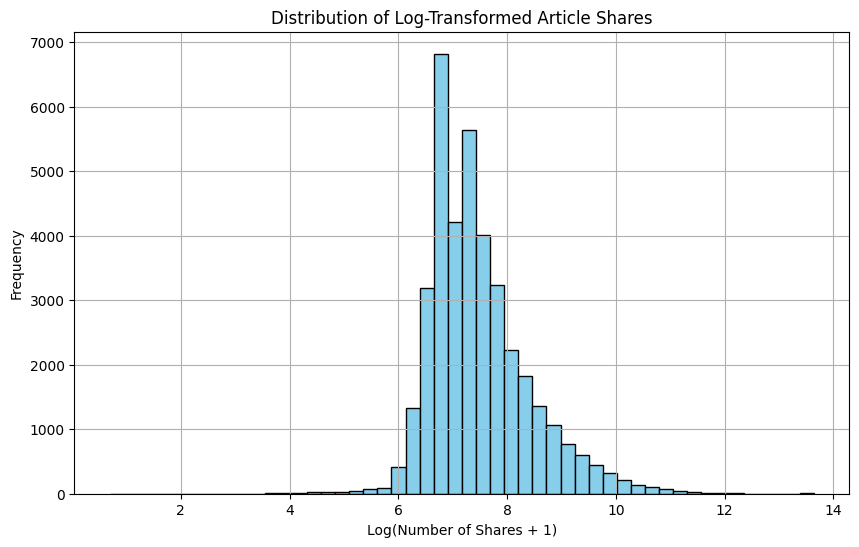

In [171]:
data['log_shares'] = np.log(data['shares'] + 1)

plt.figure(figsize=(10, 6))
plt.hist(data['log_shares'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Log-Transformed Article Shares')
plt.xlabel('Log(Number of Shares + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


- the target variable now is normalized .

## Checking Correlation for the features

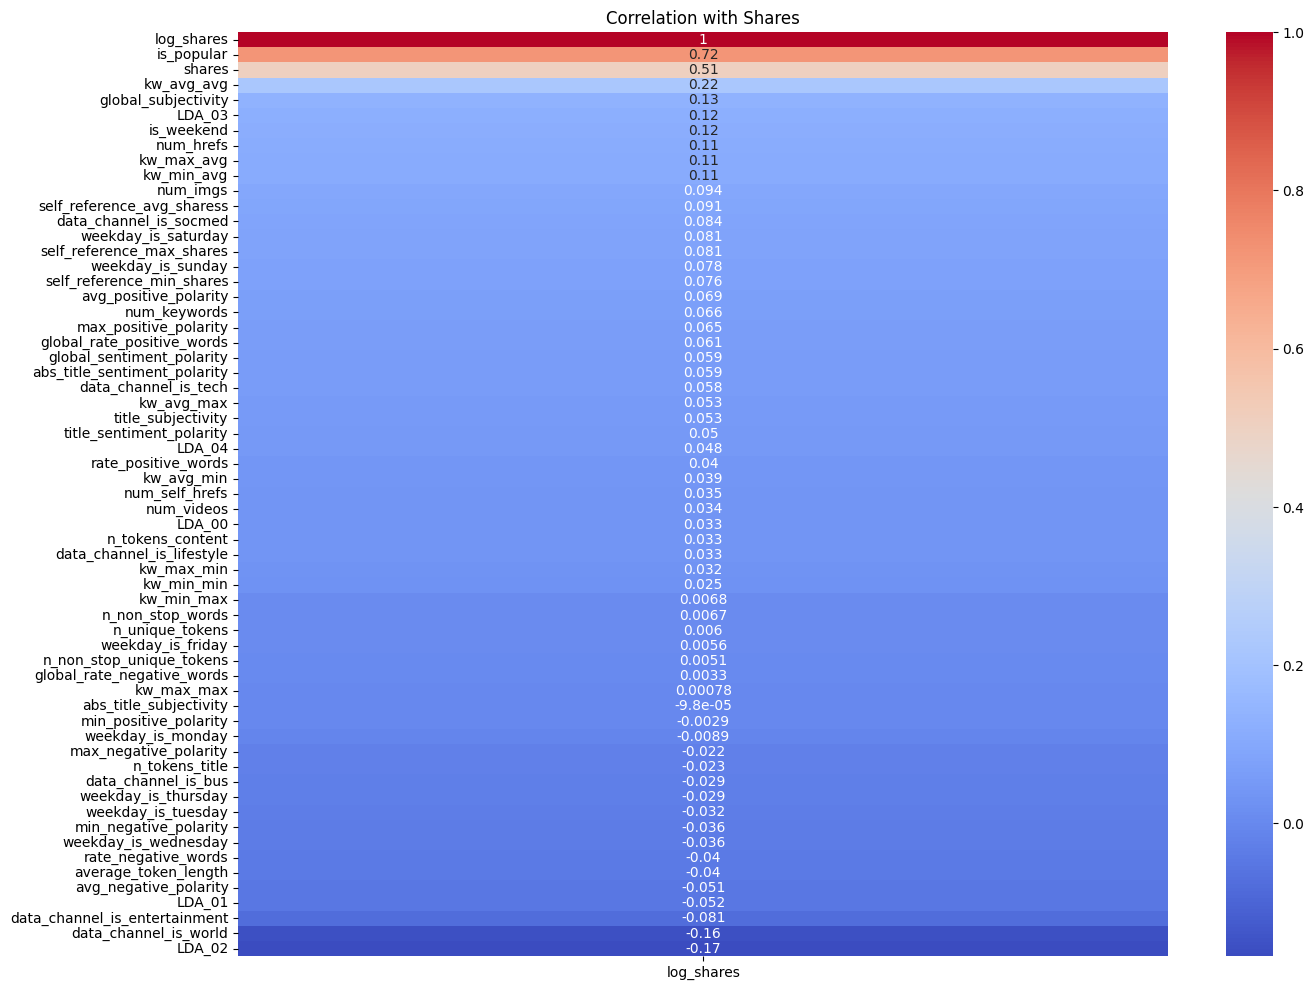

In [172]:
# Correlation matrix for key variables
correlation_matrix = data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix[['log_shares']].sort_values(by='log_shares', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Shares')
plt.show()

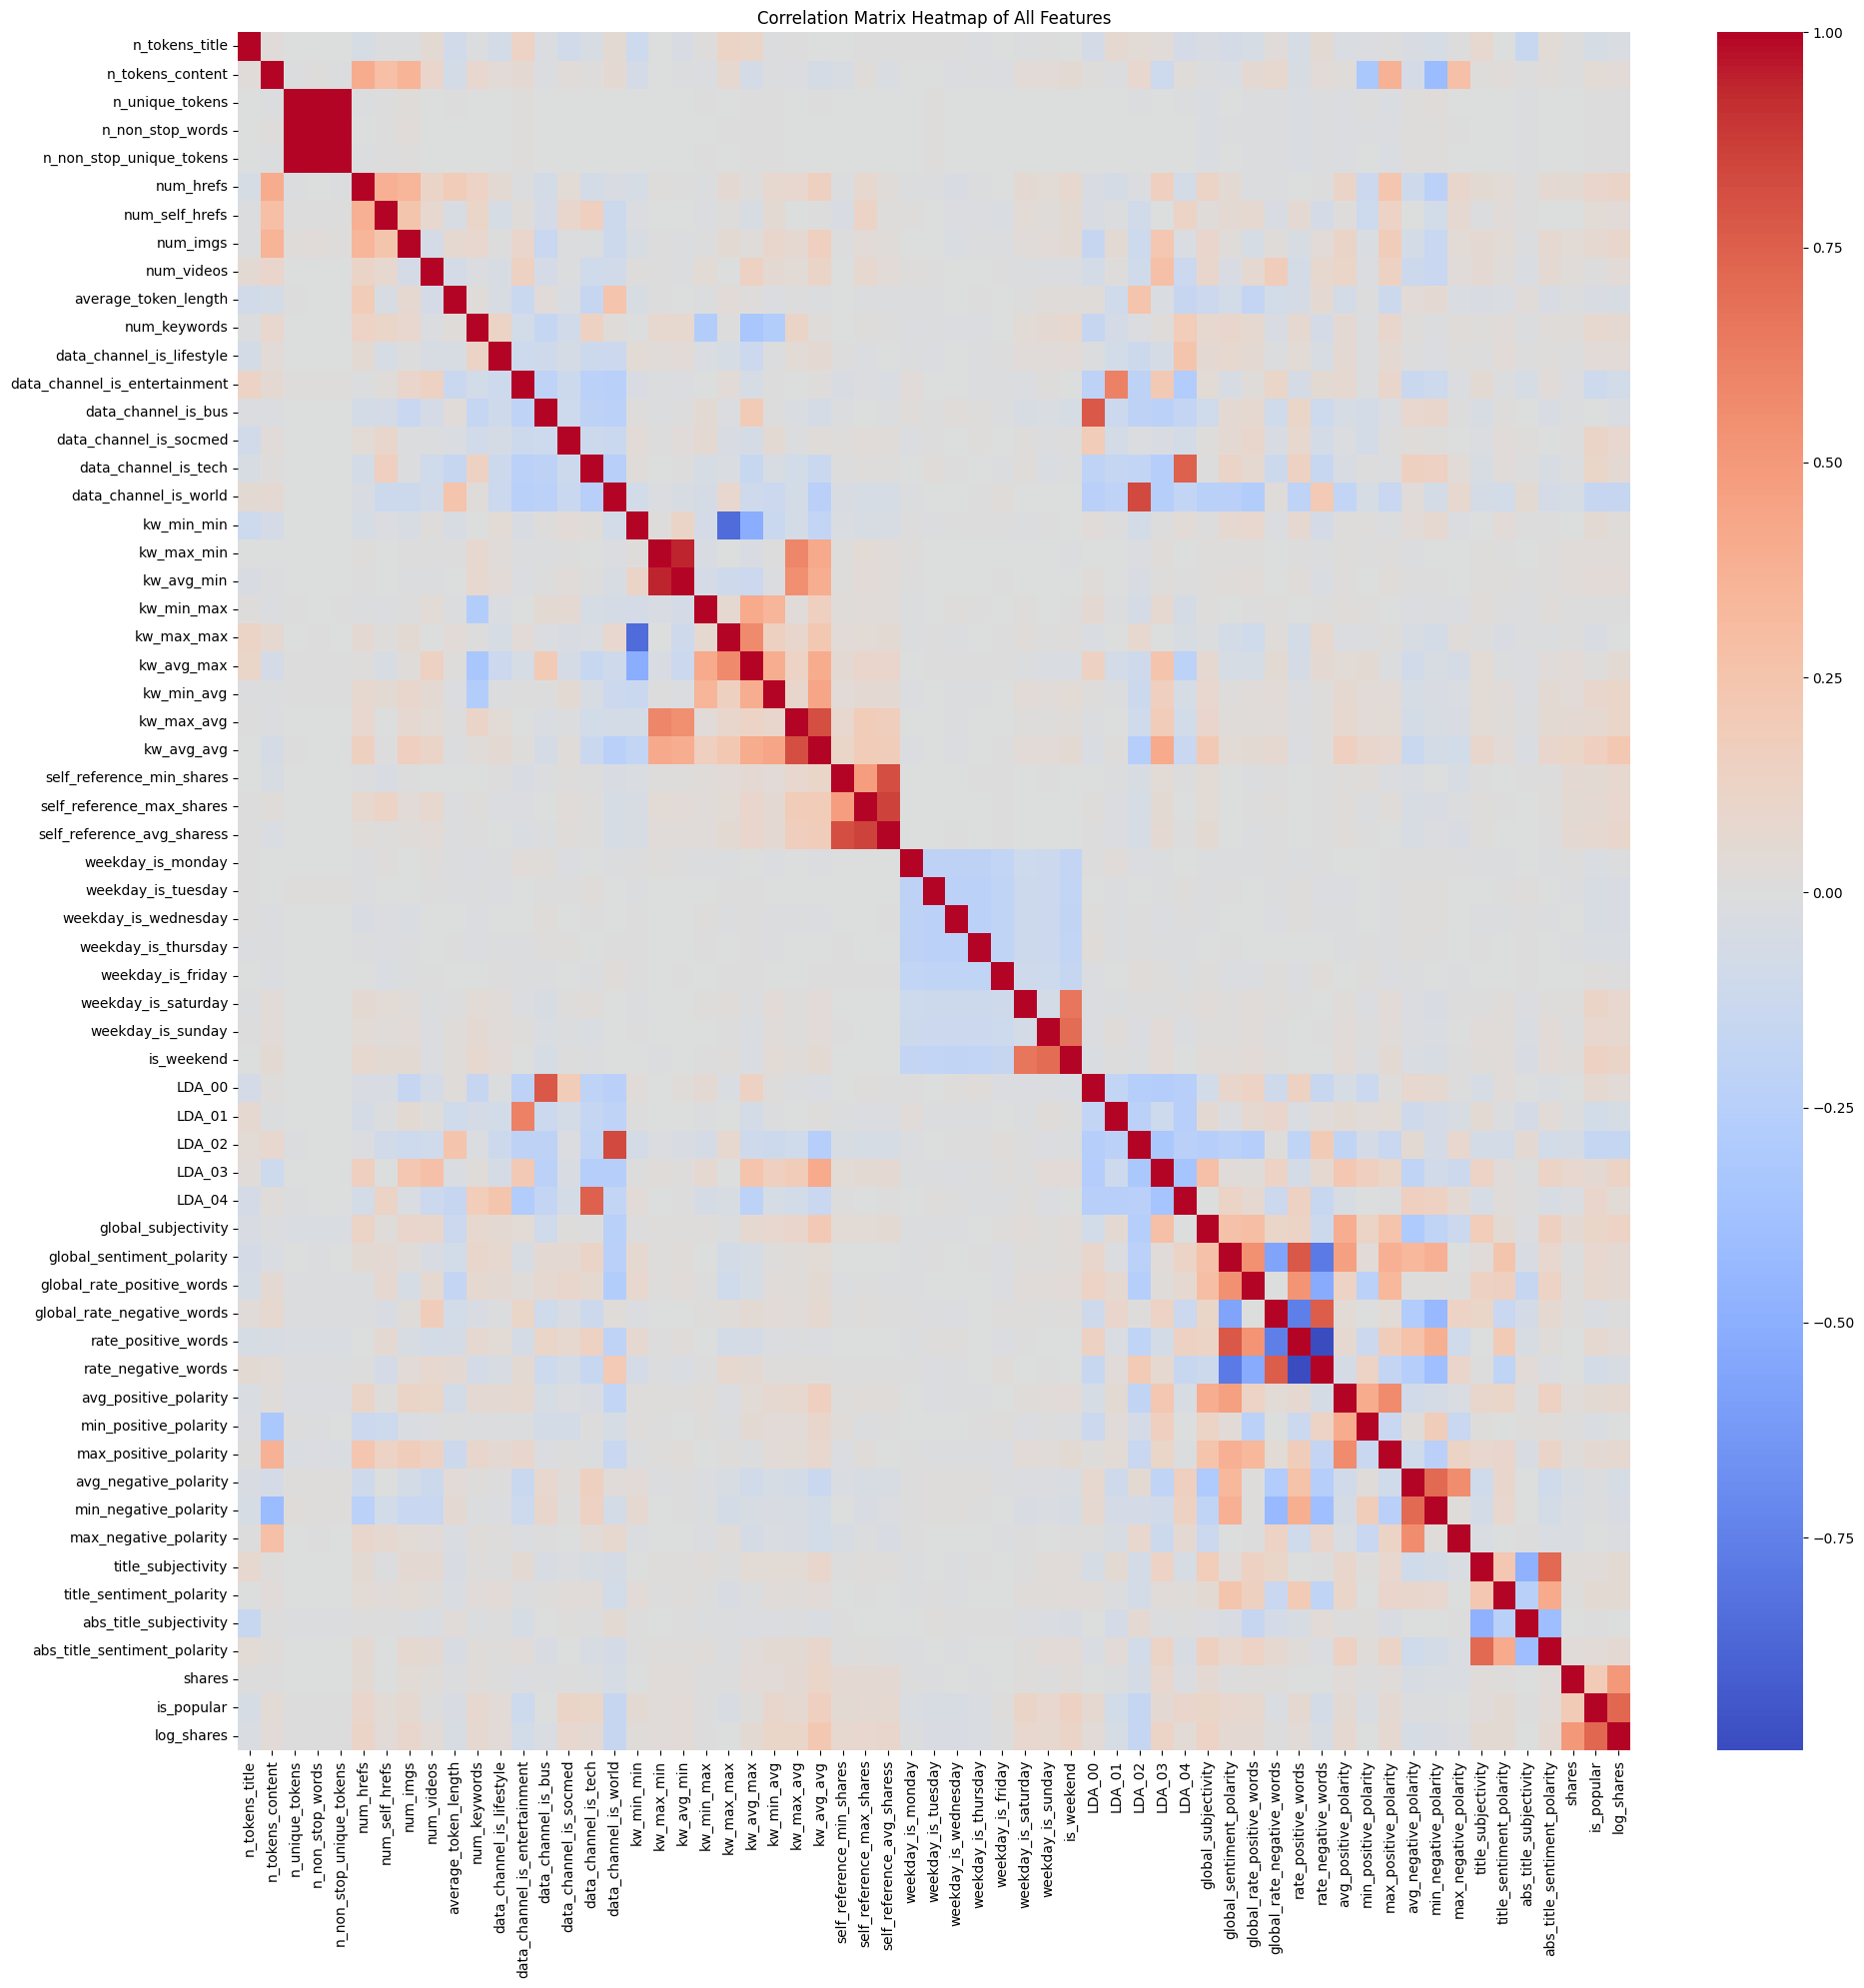

In [173]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap of All Features')
plt.tight_layout()
plt.show()


- we notice low correlation between the features in overall
- correlation between LDA and content type features
- correlation between reference features
- correlation between keyword avg avg and other keyword features

In [174]:
coolwarm_cmap = plt.colormaps['coolwarm']
coolwarm = [coolwarm_cmap(i/255) for i in range(256)]
coolwarm_colors = [f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, {a})" for r, g, b, a in coolwarm]

cor = data.corr().round(2)
mask = np.triu(np.ones_like(cor, dtype=bool))
cor = cor.mask(mask)

fig = px.imshow(
    cor,
    text_auto=True,
    aspect="auto",
    color_continuous_scale=coolwarm_colors,
    labels=dict(color="Correlation"),
    title='Correlation heatmap'
)

fig.update_layout(plot_bgcolor='#fbf5e7')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

1. **Textual Characteristics**:
   - Strong correlation between `n_tokens_title` and `n_tokens_content`
   - `n_unique_tokens` correlates with `n_non_stop_words` and `n_non_stop_unique_tokens`

2. **Multimedia Elements**:
   - `num_hrefs` and `num_self_hrefs` show moderate positive correlation
   - These also correlate with media elements like `num_imgs` and `num_videos`

3. **Keyword-related metrics** show correlation within their group

4. **Channel categories** (`data_channel_is_*`) show some negative correlations with each other, which makes sense as content typically belongs to one primary channel

5. **the `kw_*` features** :
   - Strong correlations within min/max/avg groupings
   - `kw_min_min`, `kw_max_min`, and `kw_avg_min` correlate with each other
   - Similar patterns for the max and avg groupings

6. **Weekday features** (`weekday_is_*`):
   - These show expected negative correlations with each other (a post can only be published on one day)
   - Strong correlation between `weekday_is_saturday`, `weekday_is_sunday`, and `is_weekend`

7. **Sentiment and polarity features**:
   - Strong correlation between `global_rate_positive_words`, `global_rate_negative_words`, and `global_sentiment_polarity`
   - `rate_positive_words` and `rate_negative_words` correlate strongly with their respective polarity metrics
   - The various polarity metrics (min/max/avg) show correlations within their type groups

8. **Title-related metrics**:
   - `title_subjectivity`, `title_sentiment_polarity`, and their absolute versions correlate with each other





**Recommendations for Dimensionality Reduction**

Based on this correlation analysis:

1. **Feature selection approach**:
   - Keep only one feature from each highly correlated group
   - For example, keep only `n_unique_tokens` and drop `n_non_stop_unique_tokens`
   - Keep only `self_reference_avg_sharess` and drop other self-reference metrics

2. **Features to consider dropping**:
   - From weekday indicators, consider using a single categorical feature instead of binary indicators
   - Similarly for data channels, consider using a single categorical feature

3. **Features to prioritize keeping**:
   - `self_reference_avg_sharess` (correlates with target)
   - `kw_max_avg` and `kw_avg_max` (correlate with target)
   - One representative from each feature group that shows distinct information

This approach will help reduce dimensionality while preserving the most important information in your dataset, which should lead to more efficient and potentially more accurate models.

### Correlation for LDA features

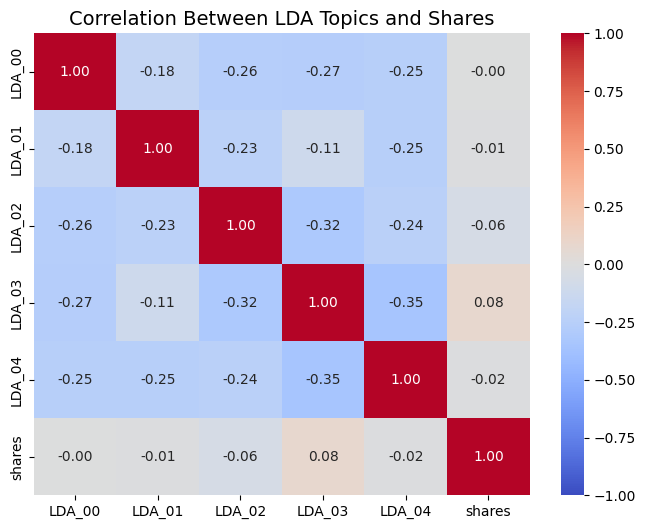

In [ ]:
lda_corr = data[lda_features + ['shares']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(
    lda_corr,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    fmt=".2f"
)
plt.title("Correlation Between LDA Topics and Shares", fontsize=14)
plt.show()

- No correlation between these features and target

as observed through the box plots and the dominance plots, the heatmap similariy shows that the LDA03 is the most correlated with the shares

### Correlation of Subjectivity features

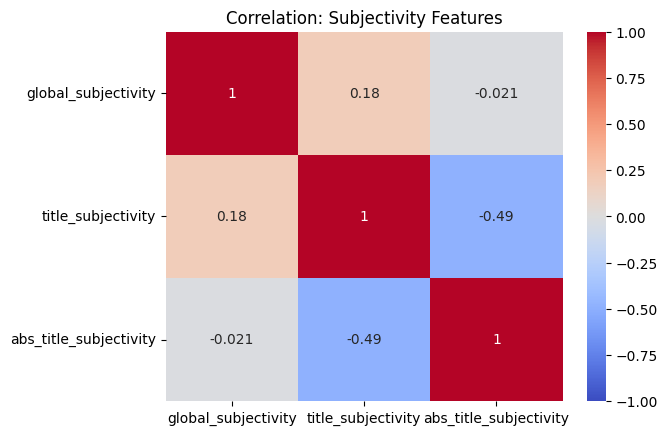

In [ ]:
subjectivity_cols = ['global_subjectivity', 'title_subjectivity', 'abs_title_subjectivity']
subjectivity_corr = data[subjectivity_cols].corr()
sns.heatmap(subjectivity_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation: Subjectivity Features")
plt.show()

### Correlation with target variable

### correlation in Multimedia




Now let's take a look at how the news are spread in different topics


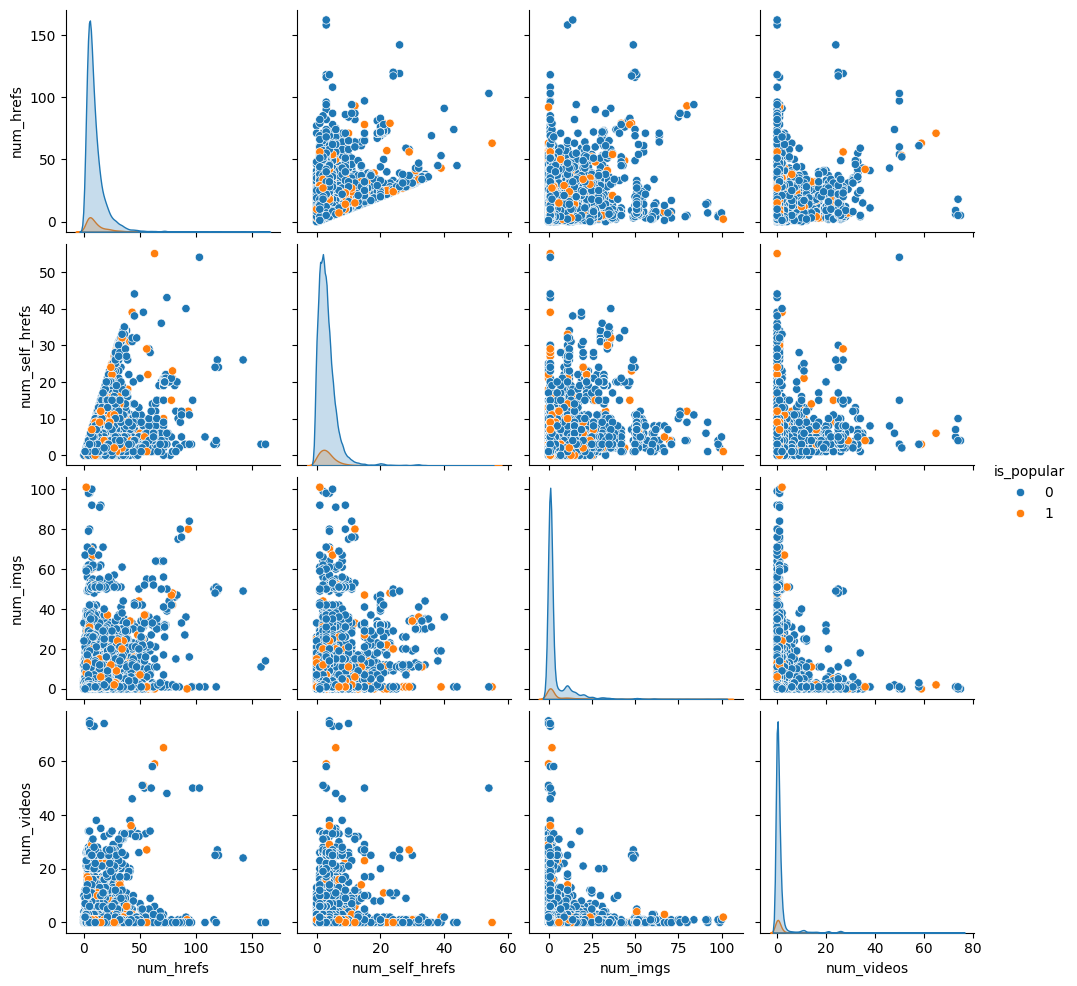

In [175]:
#Finding relationship
temp_data = data[data['shares'] <= median_shares]

# run a pairplot
sns.pairplot(temp_data, vars=multimedia_features, hue='is_popular', diag_kind='kde')


### Topic purity vs shares

In [176]:
# Calculate topic purity (max probability)
data['topic_purity'] = data[lda_features].max(axis=1)

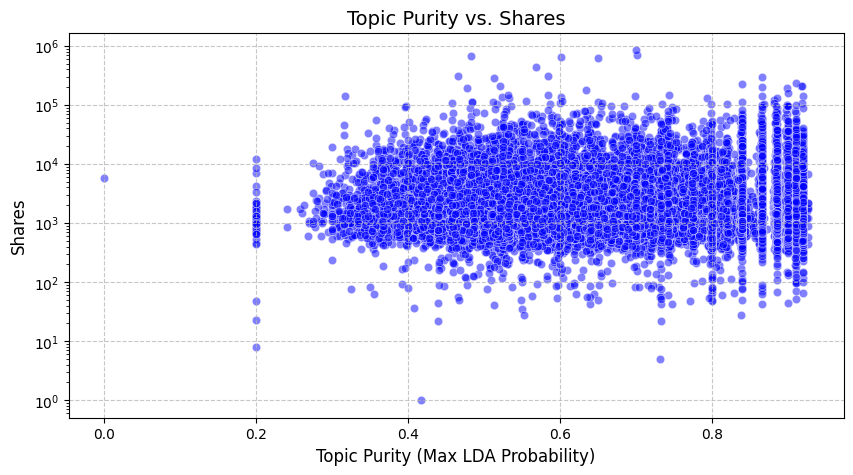

In [177]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='topic_purity',
    y='shares',
    data=data,
    alpha=0.5,
    color='blue'
)
plt.yscale('log')
plt.title("Topic Purity vs. Shares", fontsize=14)
plt.xlabel("Topic Purity (Max LDA Probability)", fontsize=12)
plt.ylabel("Shares", fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

Most articles cluster in lower share counts, regardless of purity.
High-purity articles don’t consistently get more shares than mixed-topic articles.

In [178]:
data.drop(['topic_purity'], axis=1, inplace=True)

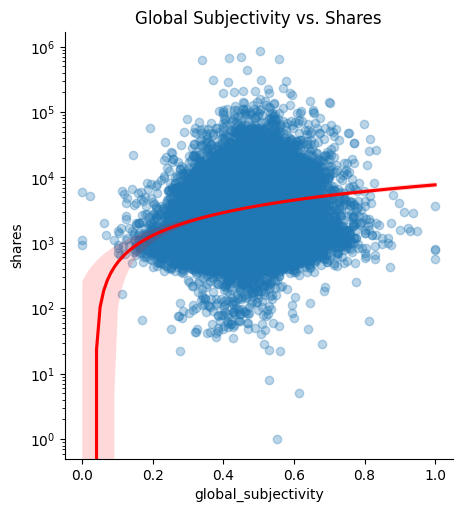

In [179]:
sns.lmplot(
    x='global_subjectivity',
    y='shares',
    data=data,
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.yscale('log')
plt.title("Global Subjectivity vs. Shares")
plt.show()

# Applying Statistics tests for correlation


H0: The number of images in an article has no significant effect on its popularity.

H1: The number of images in an article has a significant effect on its popularity.

Test: Pearson correlation coefficient


In [39]:

# scipy.stats.pearsonr(data['num_imgs'].values, data['shares'].values)
pg.corr(data['num_imgs'], data['shares'])


n         r         CI95%         p-val       BF10  power
pearson  38463  0.041294  [0.03, 0.05]  5.414206e-16  1.144e+12    1.0



The small r value shows there is only a small correlation between number of images in an article and its popularity.


H0: There is no significant difference in the mean popularity of articles that contain videos versus articles that do not contain videos.

H1: Articles that contain videos have a higher mean popularity than articles that do not contain videos.

Test: Two-sample t-test

In [40]:
pg.ttest(data['shares'].where(data['num_videos']>0), data['shares'].where(data['num_videos']==0))

T           dof alternative         p-val               CI95%  \
T-test  8.640366  16057.748018   two-sided  6.123726e-18  [1018.05, 1615.47]   

         cohen-d       BF10 power  
T-test  0.113819  1.852e+14   NaN


The small p-value can be interpereted as the fact that null hypothesis is wrong and alternative hypothesis might be correct.
So  There is a statistically significant difference in popularity between articles that include videos and those that don’t.


-----------------------------------------------------------------------------



H0: Distribution of data over number of words in title is normal.

H1: Distribution of data over number of words in title is not normal.

Test: Univariate normality test.


In [41]:
pg.normality(data['n_tokens_title'])

c:\Users\ACER\Documents\py_env\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38463.
  res = hypotest_fun_out(*samples, **kwds)


W          pval  normal
n_tokens_title  0.979516  9.432209e-57   False



The test shows distribution of data over number of words in title is not normal.


-----------------------------------------------------------------------------

H0: There is no significant difference in the mean popularity of articles published on weekdays versus articles published on weekends.

H1: Articles published on weekends have a different mean popularity than articles published on weekdays.

Test: Two-sample t-test


In [42]:
pg.ttest(data['shares'].where(data['is_weekend']==True), data['shares'].where(data['is_weekend']==False))

T          dof alternative     p-val             CI95%  \
T-test  3.586888  6913.125428   two-sided  0.000337  [269.15, 917.89]   

         cohen-d    BF10     power  
T-test  0.051234  10.543  0.923147



So we can conclude H1 hypothesis is correct.



-------------------------------------------------------------------------

H0: Articles with a more positive sentiment are more likely to be shared online.

H1: Positive sentiment has no effect on how likely the artile is to be shared online.

Test: One-sample t-test


In [43]:

pg.ttest(data['shares'].where(data['rate_positive_words']>data['rate_negative_words']), data['shares'])

T           dof alternative     p-val             CI95%  \
T-test  0.203024  71290.795933   two-sided  0.839117  [-153.8, 189.35]   

        cohen-d   BF10     power  
T-test  0.00151  0.009  0.054753

The p-value indicates that the null hypothesis is correct.

# Checking The distribution of all features

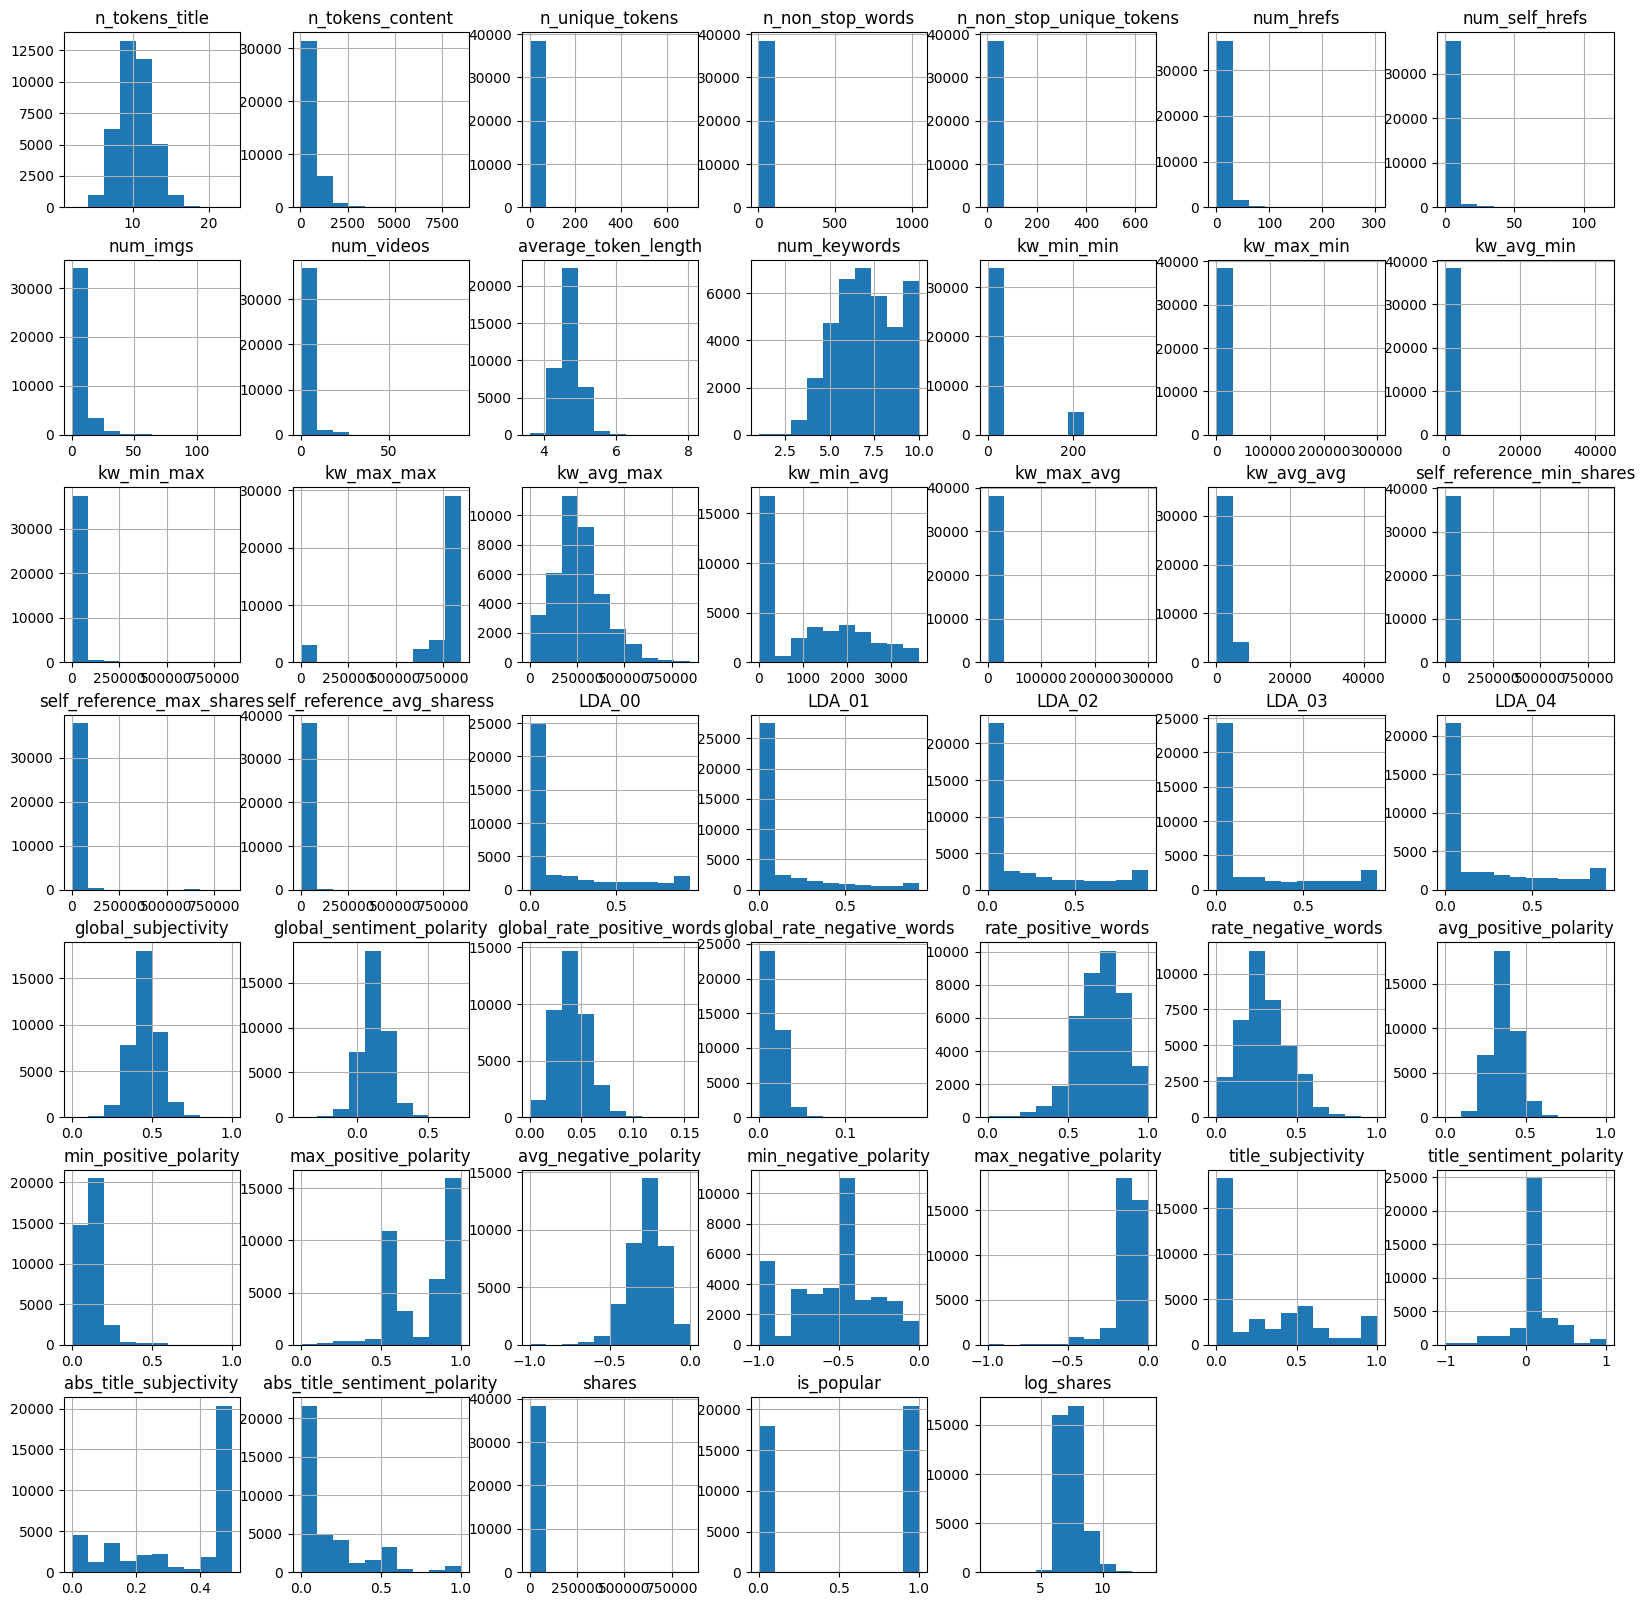

In [180]:
data.hist(figsize=(20,20))
plt.show()

- we notice that most of all data is skewed , which is a big problem, so we will try to handle it with transformations.

The column kw_min_max seems have 1 value , so let's check it .

In [123]:
print(data['kw_min_max'].unique())

[    0.   480.  1300. ... 41100. 62900.   883.]


No , it don't have 1 value

### Skewness Handling

In [181]:
data.skew()

n_tokens_title                    0.171154
n_tokens_content                  3.032061
n_unique_tokens                 195.878687
n_non_stop_words                196.119861
n_non_stop_unique_tokens        195.848307
                                   ...    
abs_title_subjectivity           -0.629014
abs_title_sentiment_polarity      1.712336
shares                           34.952836
is_popular                       -0.128444
log_shares                        1.028718
Length: 61, dtype: float64

- Most of data is skewed , so we apply Box-Cox Transformation or log transformation

- We check the negative values

In [47]:
# Check for negative values
negative_cols = [col for col in data.columns if (data[col].dtype in [np.float64, np.int64]) and (data[col] < 0).any()]
print("Columns with negative values:\n", negative_cols)

Columns with negative values:
 ['kw_min_min', 'kw_avg_min', 'kw_min_avg', 'global_sentiment_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_sentiment_polarity']


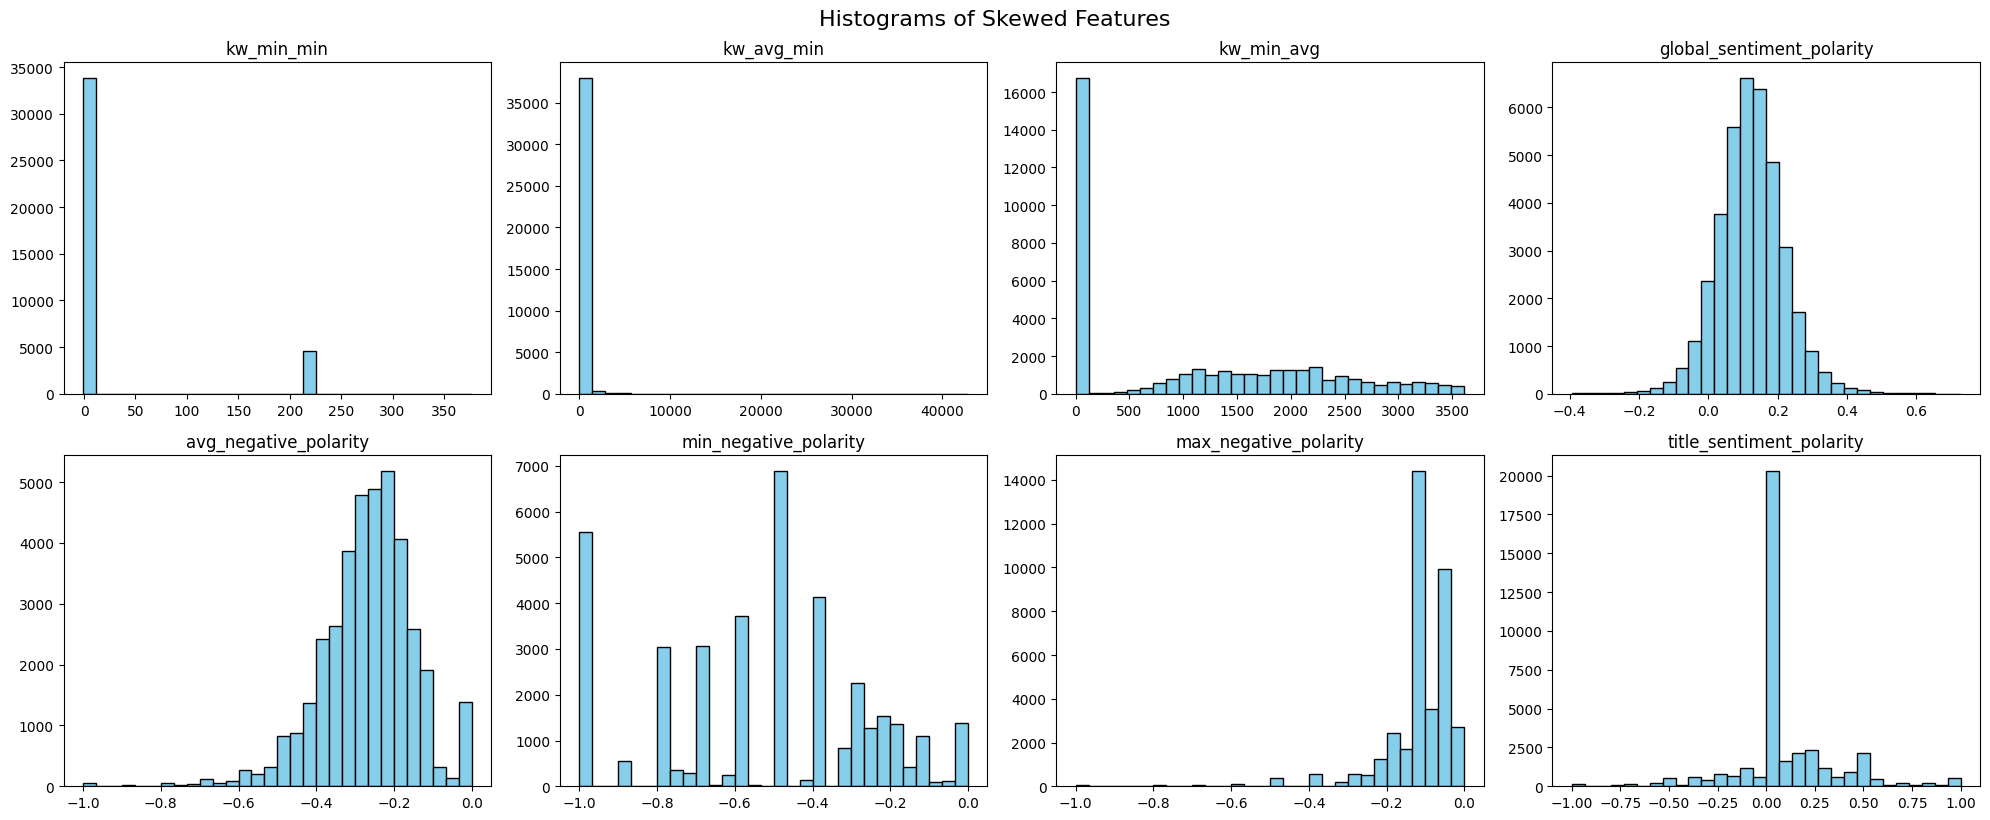

In [48]:


# Set up the grid
n_cols = 4
n_rows = (len(negative_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(negative_cols):
    if col in data.columns:
        plt.subplot(n_rows, n_cols, i + 1)
        plt.hist(data[col].dropna(), bins=30, color='skyblue', edgecolor='black')
        plt.title(col)
        plt.tight_layout()

plt.suptitle("Histograms of Skewed Features", fontsize=16, y=1.02)
plt.show()

In [182]:
skewed_cols = ['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
               'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs',
               'num_imgs', 'num_videos', 'kw_max_min',
               'kw_min_max', 'kw_avg_max', 'kw_max_avg',
               'kw_avg_avg', 'self_reference_min_shares',
               'self_reference_max_shares', 'self_reference_avg_sharess',
               'global_rate_positive_words', 'global_rate_negative_words',
               'rate_positive_words', 'rate_negative_words',
               'min_positive_polarity', 'abs_title_sentiment_polarity', 'kw_max_max','LDA_00', 'LDA_01', 'LDA_04', 'LDA_03', 'LDA_02', 'max_positive_polarity',
  'abs_title_subjectivity']

*** Plot histogram before transformation for positive features only ***

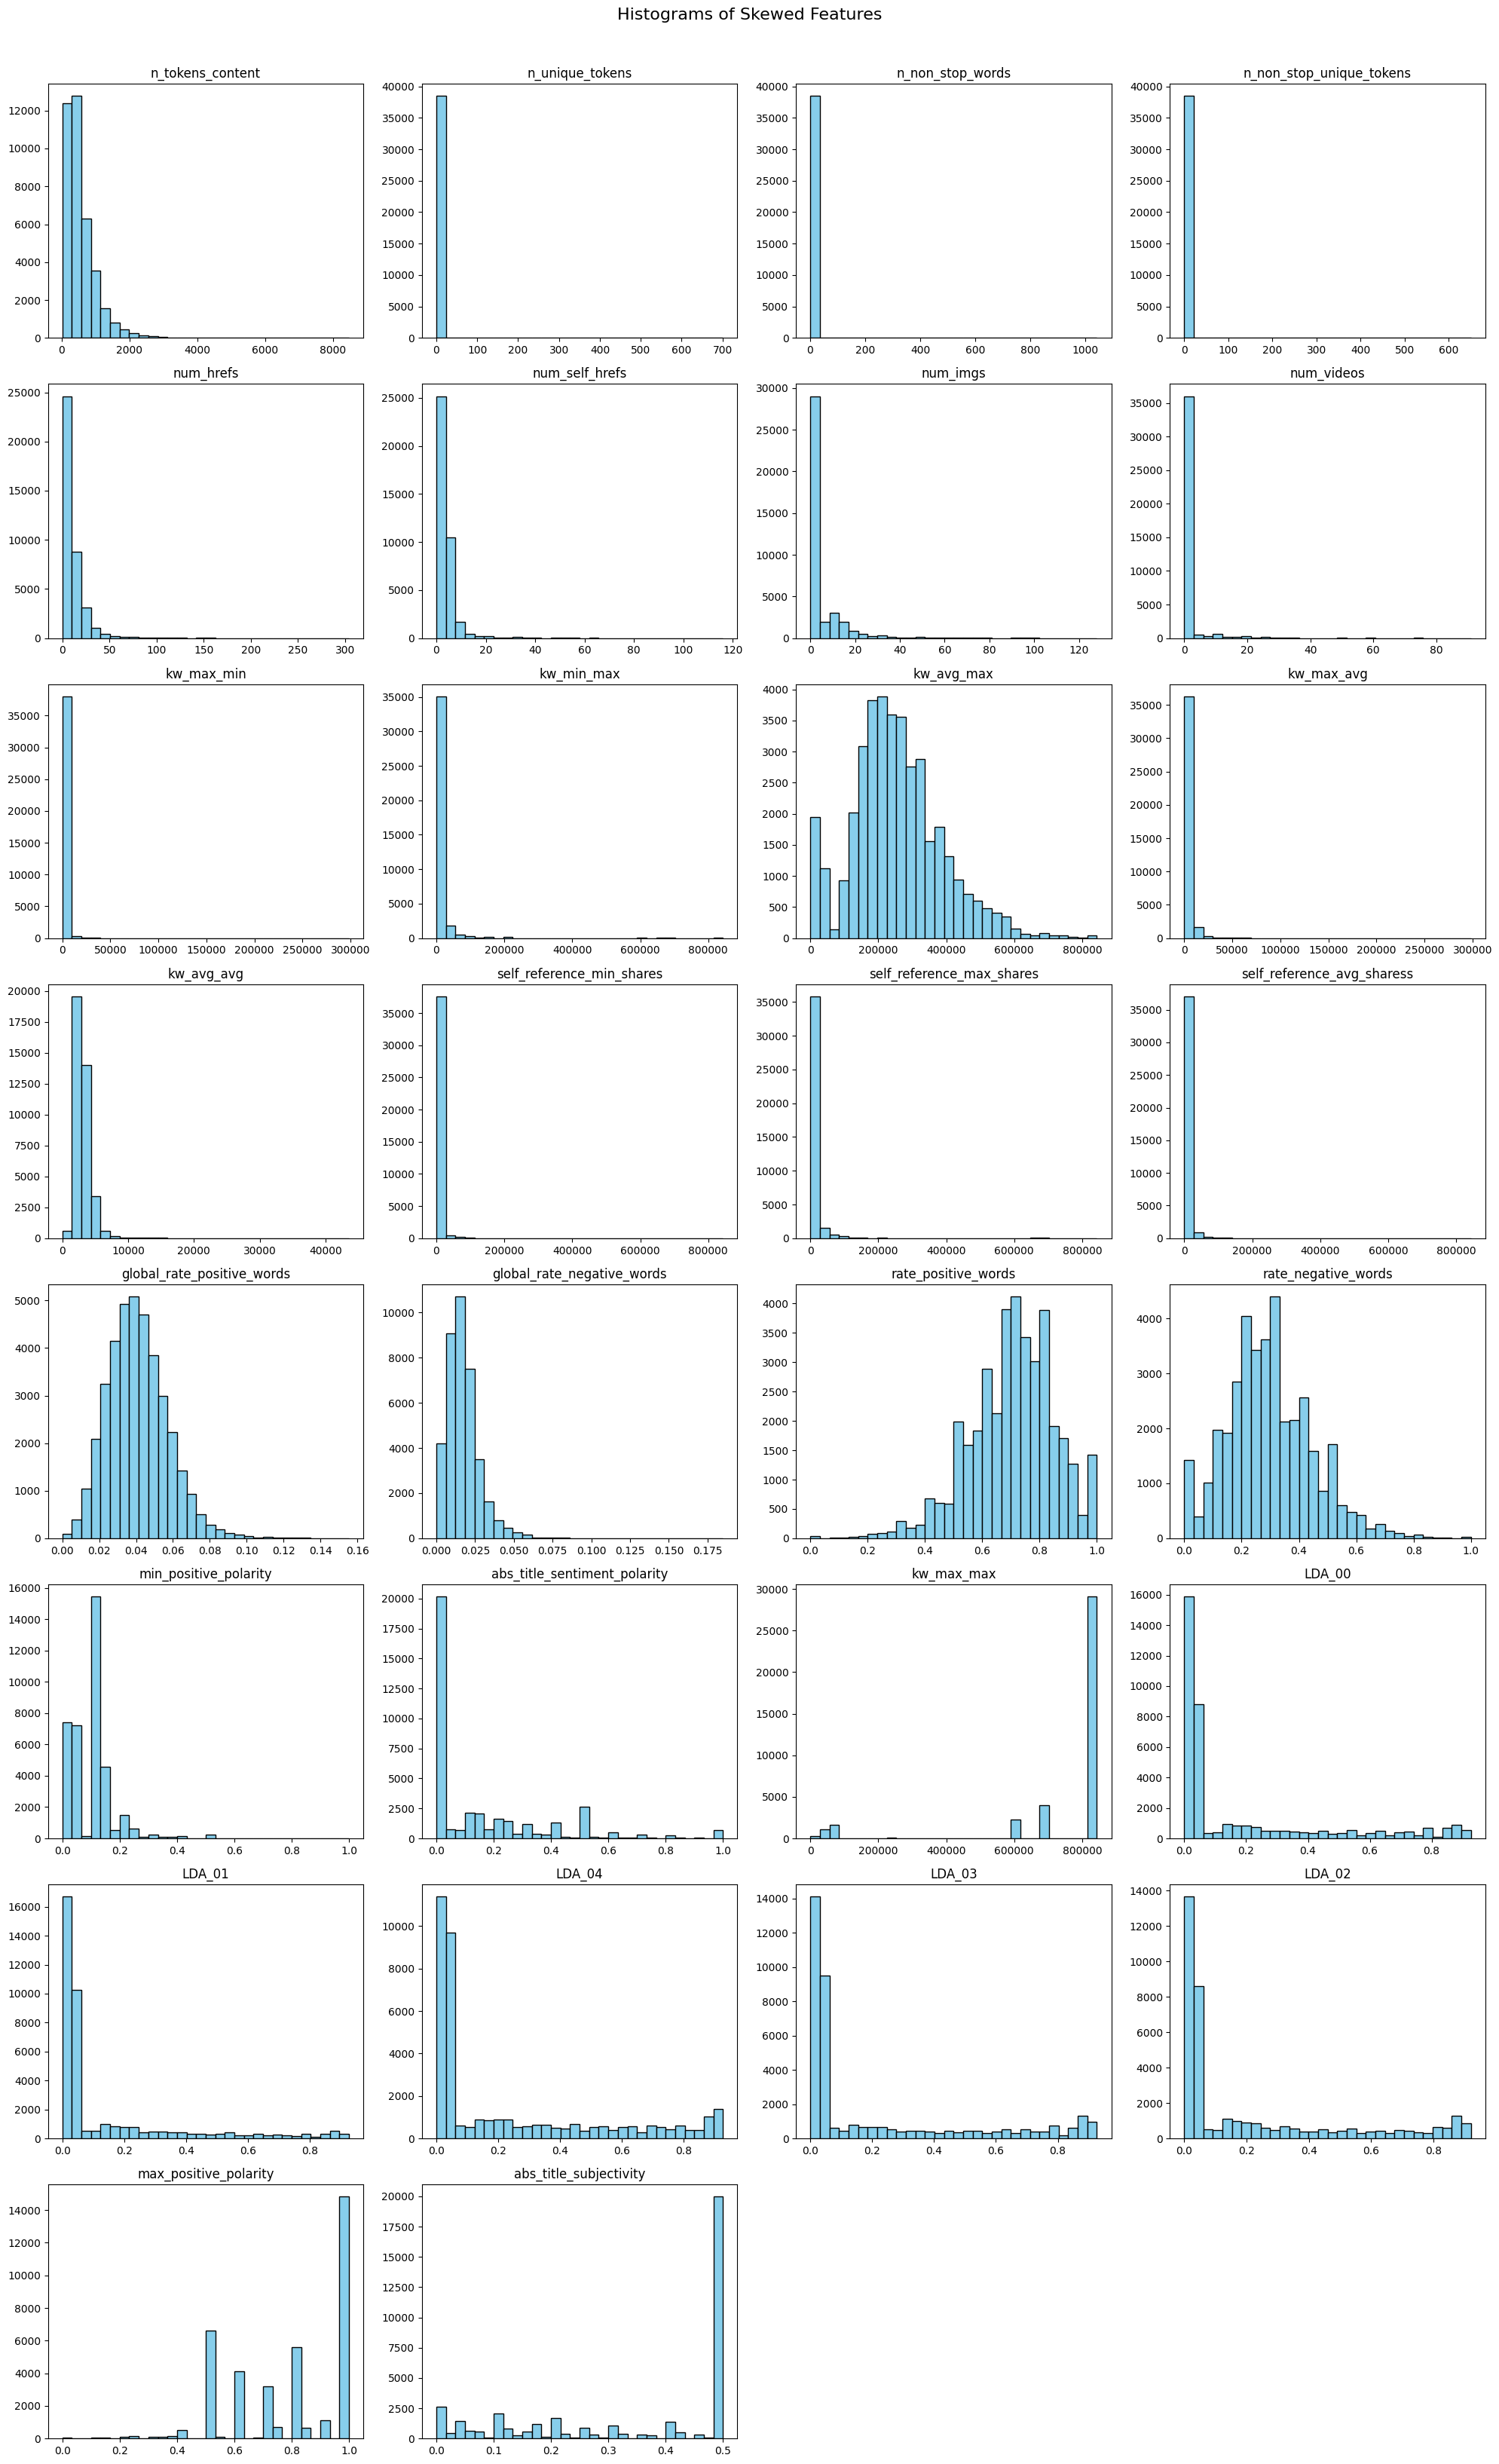

In [183]:

# Set up the grid
n_cols = 4
n_rows = (len(skewed_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(skewed_cols):
    if col in data.columns:
        plt.subplot(n_rows, n_cols, i + 1)
        plt.hist(data[col].dropna(), bins=30, color='skyblue', edgecolor='black')
        plt.title(col)
        plt.tight_layout()

plt.suptitle("Histograms of Skewed Features", fontsize=16, y=1.02)
plt.show()


In [184]:
#handle skeweness using log1p
for col in skewed_cols:
    data[col] = np.log1p(data[col])


- After Transformation

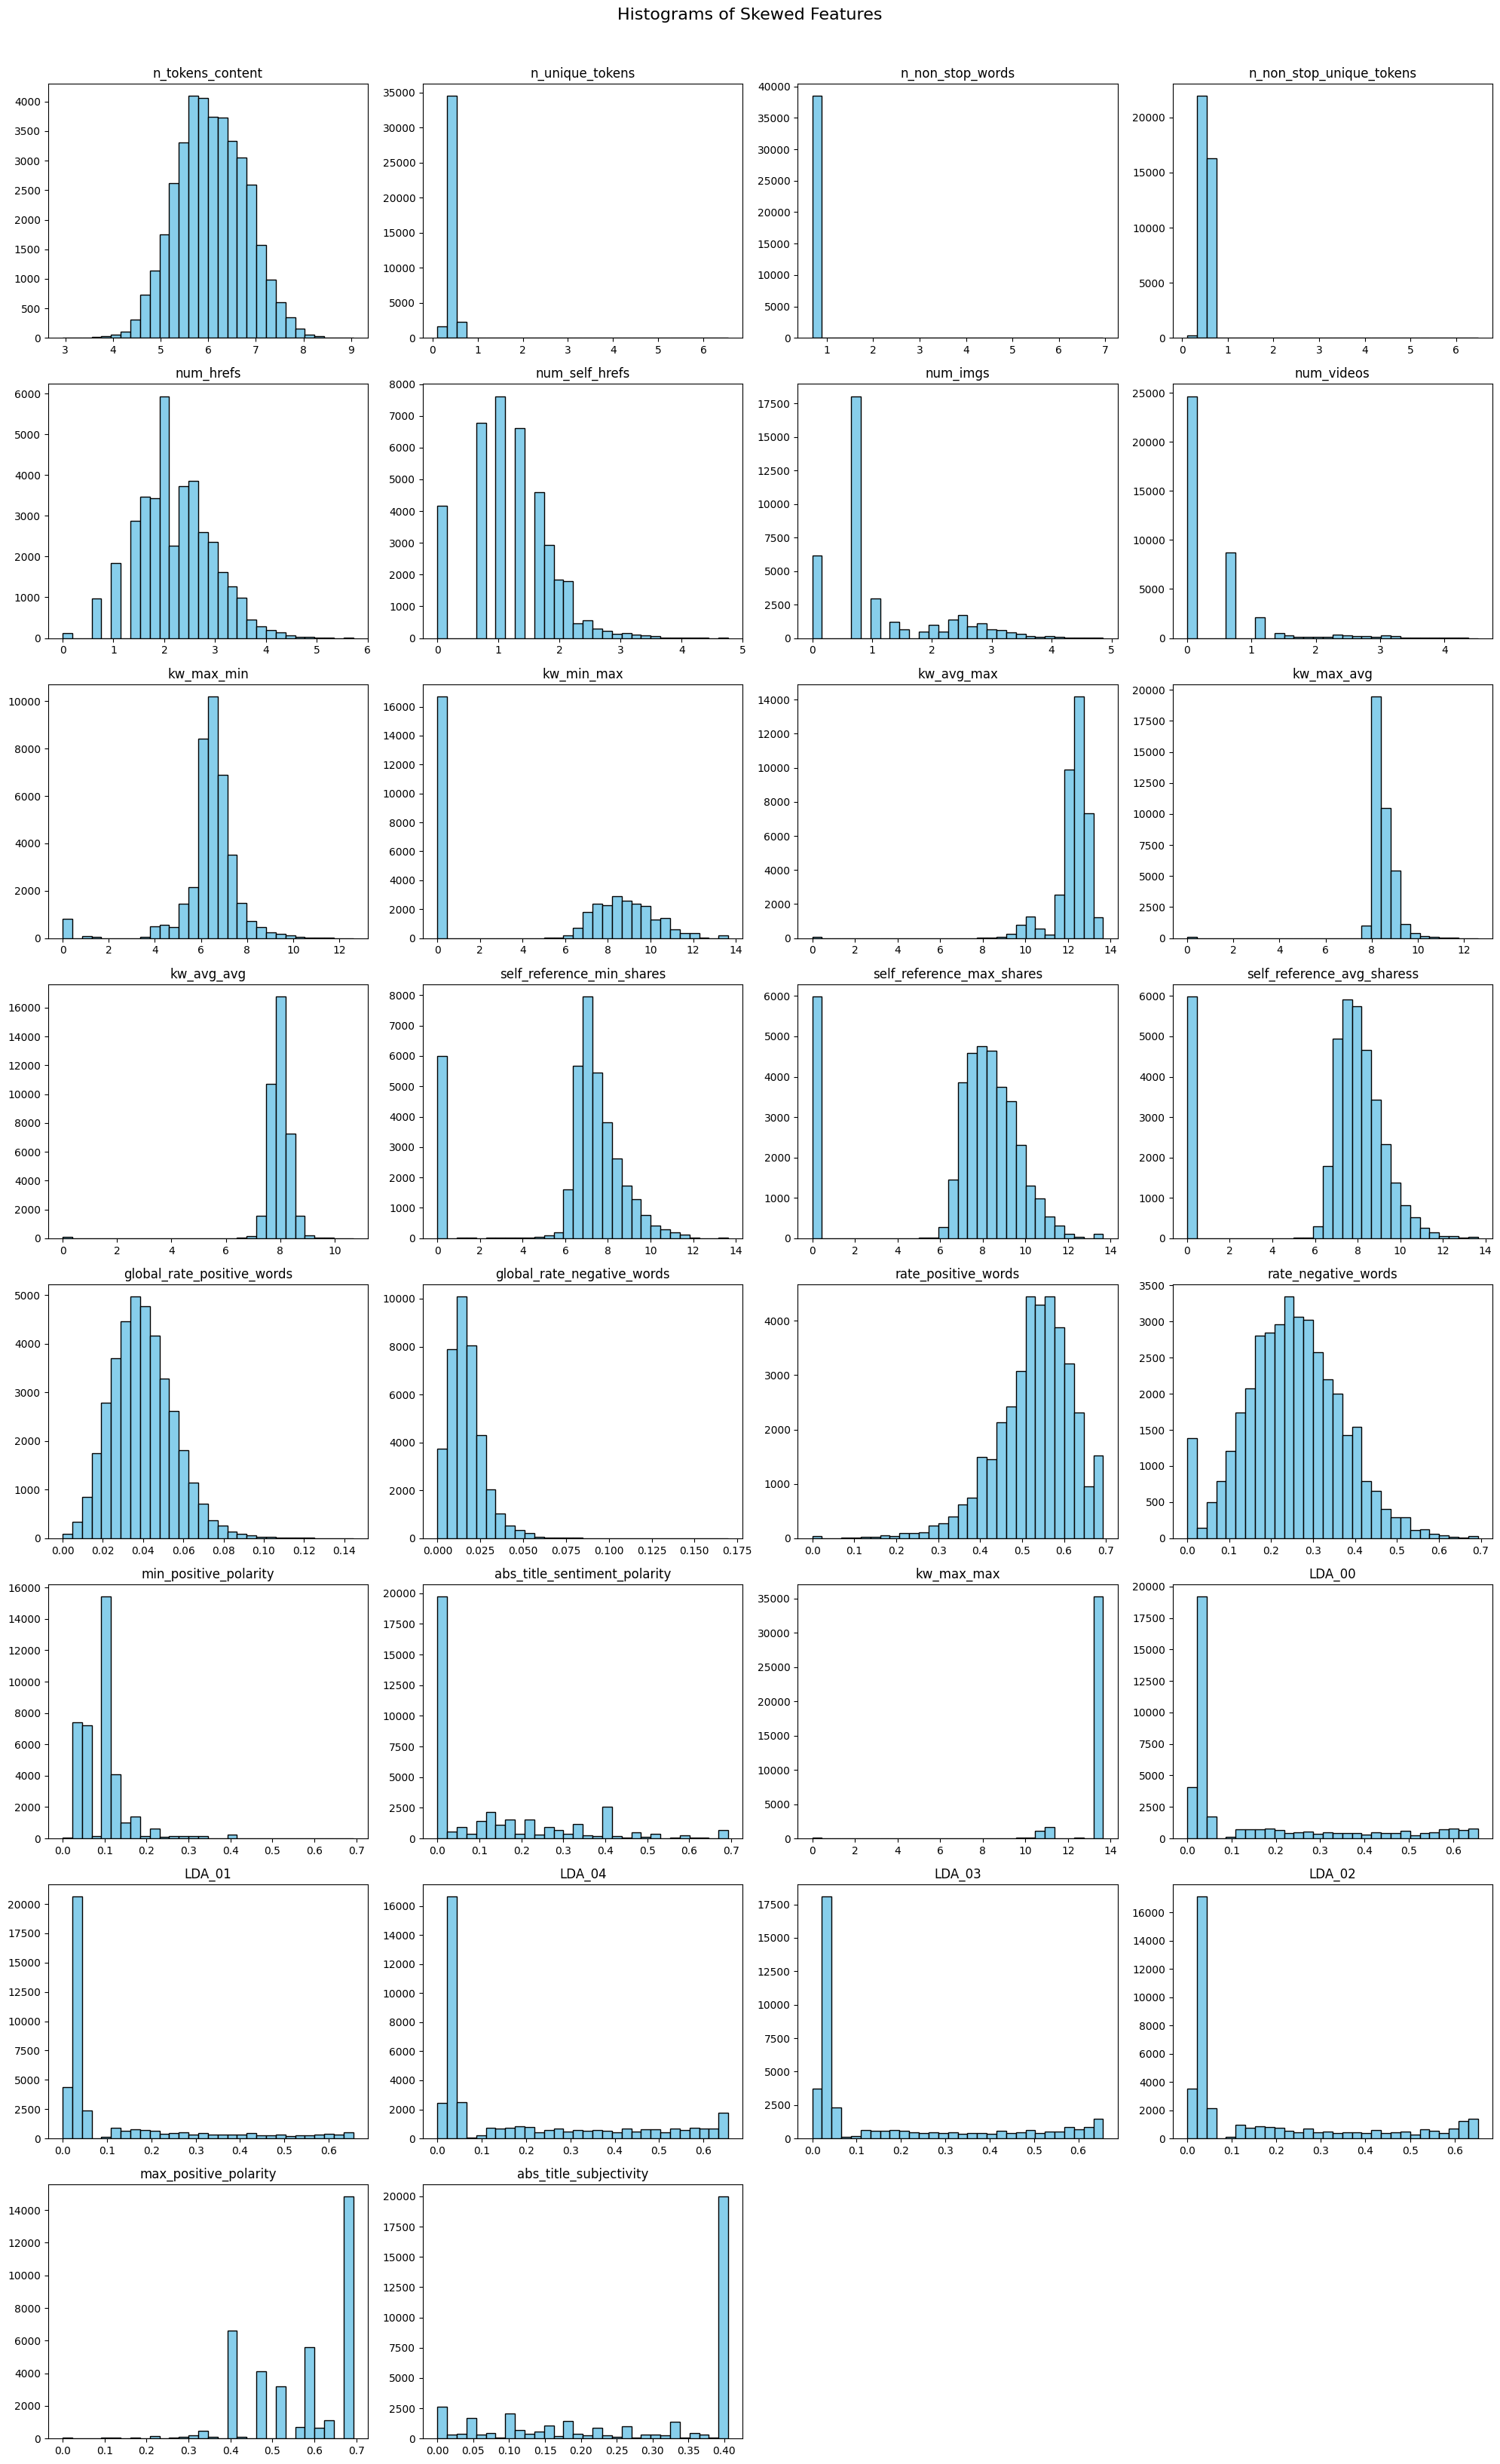

In [185]:
# Set up the grid
n_cols = 4
n_rows = (len(skewed_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(skewed_cols):
    if col in data.columns:
        plt.subplot(n_rows, n_cols, i + 1)
        plt.hist(data[col].dropna(), bins=30, color='skyblue', edgecolor='black')
        plt.title(col)
        plt.tight_layout()

plt.suptitle("Histograms of Skewed Features", fontsize=16, y=1.02)
plt.show()

- we notice some improvements in skeweness after transformation but I think it is not significant.

# Normalization of the data

In [53]:
def process_and_plot_group(feature_list, group_name, normalize=True):
    print(f"\nProcessing {group_name} features...")

    # 1. Plot histograms BEFORE normalization
    plt.figure(figsize=(16, 8))
    for i, feature in enumerate(feature_list):
        plt.subplot((len(feature_list) + 2) // 3, 3, i + 1)
        sns.histplot(data[feature], kde=True)
        plt.title(f'{feature} (Original)')
    plt.suptitle(f'{group_name} Features Before Normalization', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # 2. Normalize features
    if normalize:
        scaler = StandardScaler()
        for feature in feature_list:
            data[feature] = data[feature].fillna(data[feature].mean())  # handle NaNs
            data[feature] = scaler.fit_transform(data[feature].values.reshape(-1, 1))

        # 3. Plot histograms AFTER normalization
        plt.figure(figsize=(16, 8))
        for i, feature in enumerate(feature_list):
            plt.subplot((len(feature_list) + 2) // 3, 3, i + 1)
            sns.histplot(data[feature], kde=True)
            plt.title(f'{feature} (Normalized)')
        plt.suptitle(f'{group_name} Features After Normalization', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


In [54]:
# # Apply to normalization to each feature category
# process_and_plot_group(textual_features, "Textual")
# process_and_plot_group(multimedia_features, "Multimedia")
# process_and_plot_group(keyword_features, "Keyword")
# process_and_plot_group(self_reference_features, "Self-reference")
# process_and_plot_group(lda_features, "LDA Topics")
# process_and_plot_group(subjectivity_polarity_features, "Subjectivity & Polarity")


# PCA

In [55]:


class PCAAnalyzer:
    def __init__(self, data: pd.DataFrame):
        self.original_data = data
        self.data = data.copy()
        self.scaler = StandardScaler()
        self.pca_model = None
        self.feature_type = ""
        self.feature_list = []
        self.data_pca_ready = None
        self.X_scaled = None
        self.pca_result = None
        self.loadings = None
        self.optimal_components = None

    def apply_pca(self, feature_list, feature_type='textual', show_plot=True):
        """
        Apply PCA to selected features and append components to the dataset.

        Parameters:
        - feature_list: List of features to apply PCA on.
        - feature_type: String label for the type of features.
        - show_plot: Boolean, whether to show the explained variance plot.
        """
        self.feature_type = feature_type
        self.feature_list = feature_list

        # Step 1: Handle missing values
        self.data_pca_ready = self.data[feature_list].fillna(self.data[feature_list].mean())

        # Step 2: Standardize
        self.X_scaled = self.scaler.fit_transform(self.data_pca_ready)

        # Step 3: Full PCA
        self.pca_model = PCA()
        self.pca_result = self.pca_model.fit_transform(self.X_scaled)
        explained_variance = np.cumsum(self.pca_model.explained_variance_ratio_)

        # Step 4: Elbow method
        knee = KneeLocator(
            range(1, len(explained_variance) + 1),
            explained_variance,
            curve='convex',
            direction='increasing'
        )
        self.optimal_components = knee.knee or len(feature_list)
        print(f"📌 [{feature_type.upper()}] Optimal components: {self.optimal_components}")

        if show_plot:
            plt.figure(figsize=(10, 5))
            plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
            plt.axvline(self.optimal_components, color='red', linestyle='--', label=f'Elbow at {self.optimal_components}')
            plt.xlabel('Number of Principal Components')
            plt.ylabel('Cumulative Explained Variance')
            plt.title(f'PCA - {feature_type.capitalize()} Features')
            plt.legend()
            plt.grid(True)
            plt.show()

        # Step 5: Re-run PCA with optimal components
        self.pca_model = PCA(n_components=self.optimal_components)
        X_pca_opt = self.pca_model.fit_transform(self.X_scaled)

        # Step 6: Add PCA features to the original DataFrame
        pca_column_names = [f'{feature_type}_pca{i+1}' for i in range(self.optimal_components)]
        pca_df = pd.DataFrame(X_pca_opt, columns=pca_column_names, index=self.data.index)
        self.data = pd.concat([self.data, pca_df], axis=1)
        self.data.drop(columns=self.feature_list, inplace=True)
        # Step 7: Save loadings
        self.loadings = pd.DataFrame(
            self.pca_model.components_.T,
            columns=pca_column_names,
            index=self.data_pca_ready.columns
        )

        print(f"✅ PCA applied to {feature_type} features. New columns added: {pca_column_names}")
        return self.data

    def plot_feature_contributions(self, top_n_components=3, top_n_features=10):
        """
        Plot top contributing features to the top principal components.
        """
        if self.loadings is None:
            print("⚠️ PCA must be applied first.")
            return

        for pc in self.loadings.columns[:top_n_components]:
            top_features = self.loadings[pc].abs().sort_values(ascending=False).head(top_n_features)
            plt.figure(figsize=(10, 6))
            sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
            plt.title(f'Top {top_n_features} Feature Contributions to {pc} ({self.feature_type})')
            plt.xlabel('Absolute Contribution')
            plt.ylabel('Feature')
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    def calculate_vif(self):
        """
        Calculate VIF for the input features.
        """
        if self.data_pca_ready is None:
            print("⚠️ PCA must be applied first to define feature set.")
            return

        vif_data = pd.DataFrame()
        vif_data['feature'] = self.data_pca_ready.columns
        vif_data['VIF'] = [
            variance_inflation_factor(self.X_scaled, i)
            for i in range(self.X_scaled.shape[1])
        ]

        print("\n📊 Variance Inflation Factors (VIF):")
        print(vif_data.sort_values(by='VIF', ascending=False))
        return vif_data


### PCA For Textual Features

📌 [TEXTUAL] Optimal components: 6


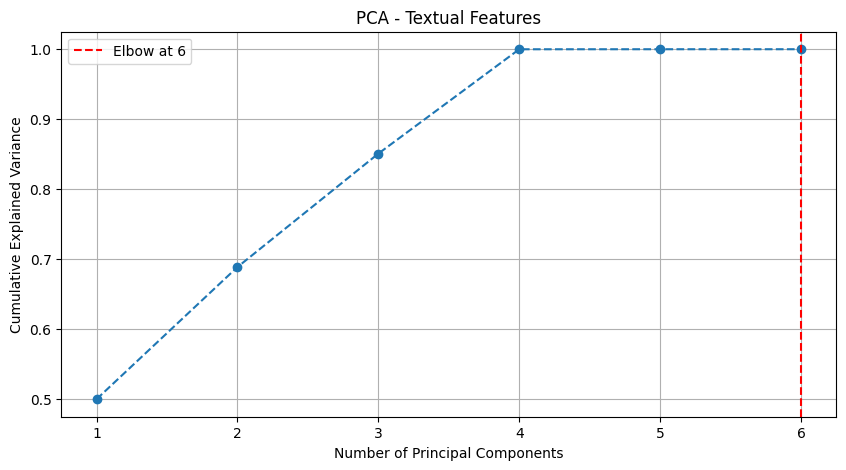

✅ PCA applied to textual features. New columns added: ['textual_pca1', 'textual_pca2', 'textual_pca3', 'textual_pca4', 'textual_pca5', 'textual_pca6']


C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




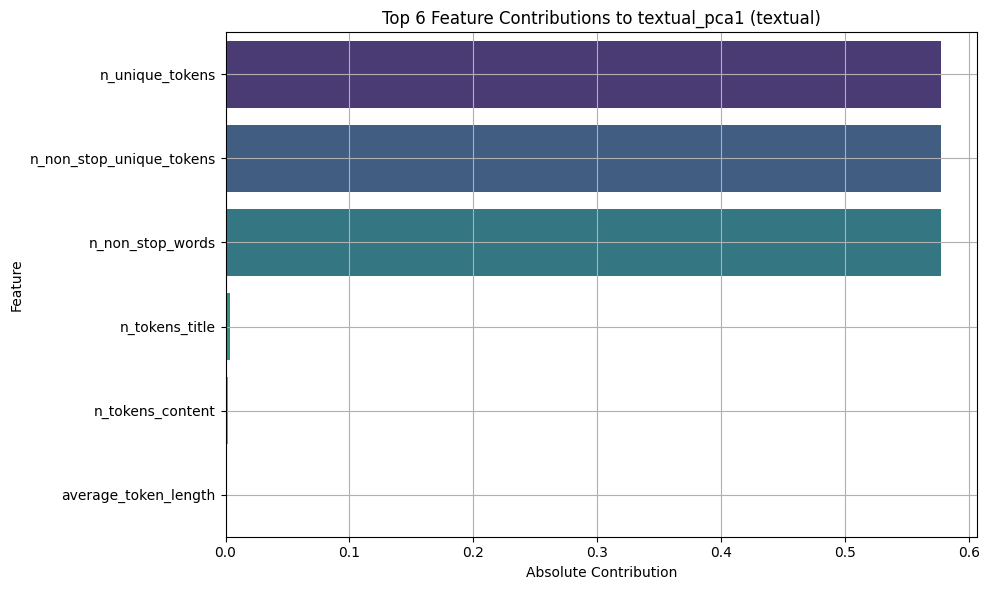

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




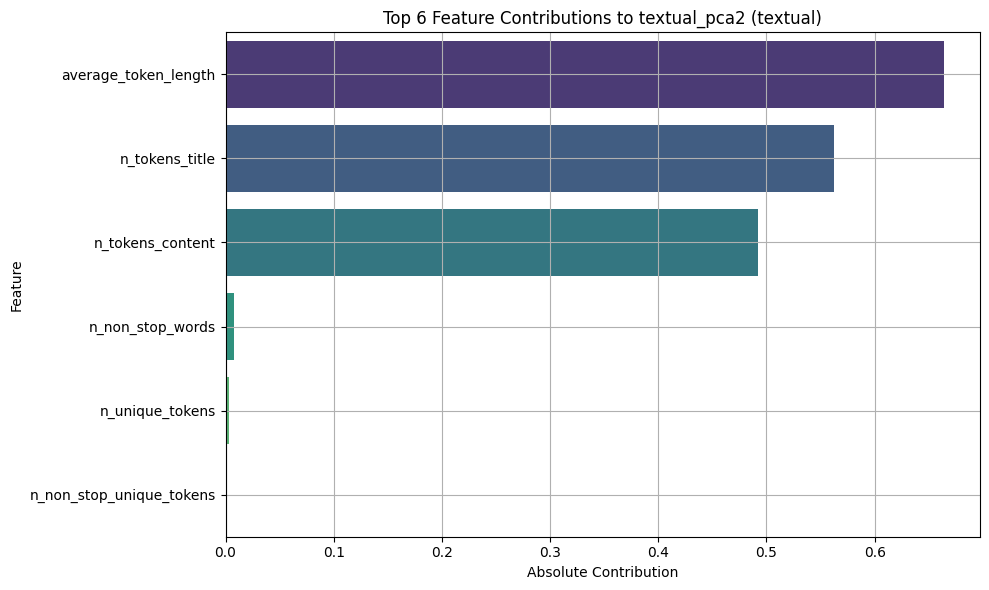

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




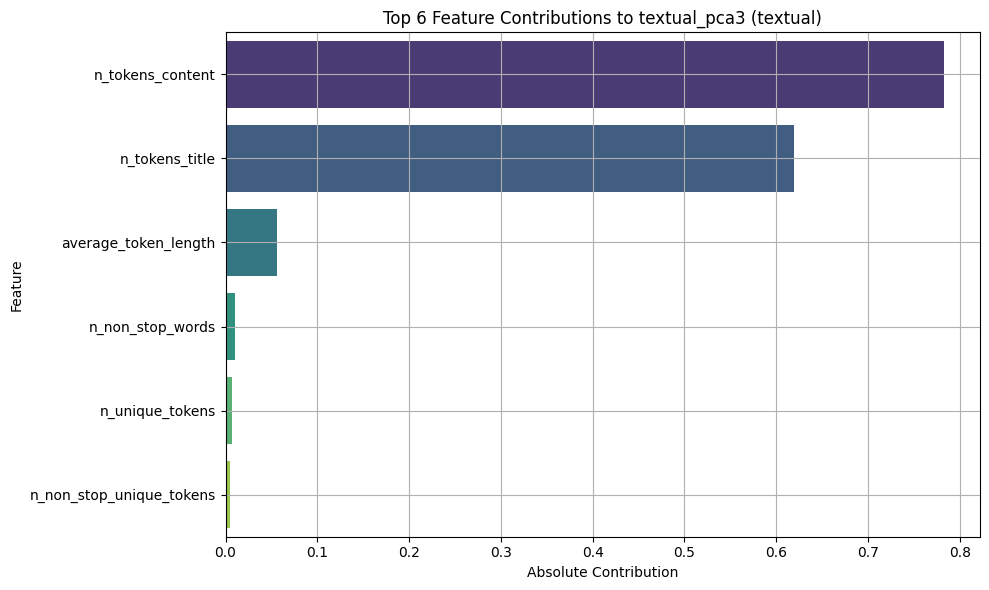

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




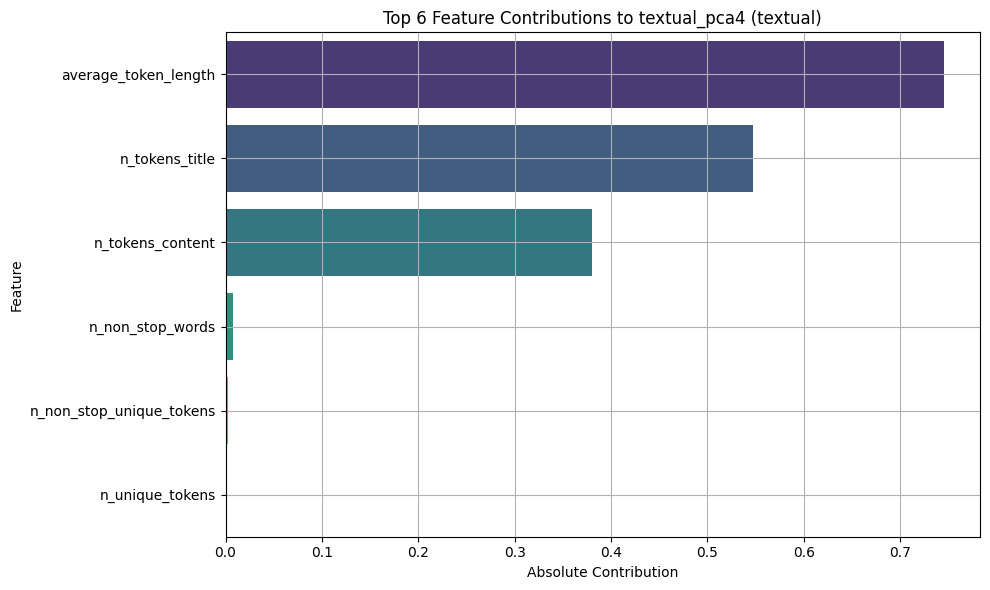

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




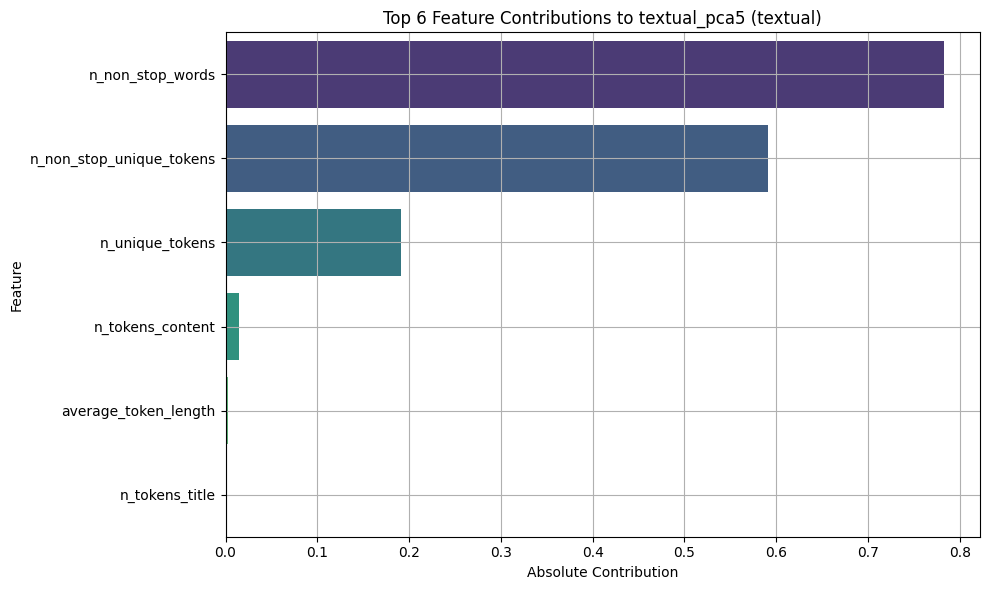

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




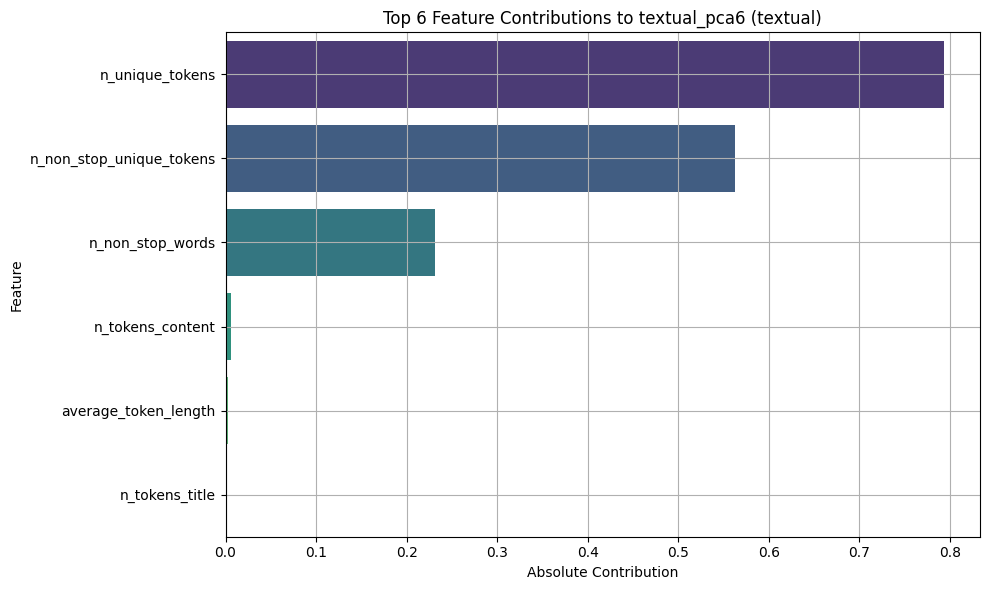


📊 Variance Inflation Factors (VIF):
                    feature          VIF
2           n_unique_tokens  9115.262448
4  n_non_stop_unique_tokens  5685.096277
3          n_non_stop_words  2801.985366
1          n_tokens_content     2.381982
5      average_token_length     1.104267
0            n_tokens_title     1.009133


In [273]:
# Initialize with your DataFrame
pca_tool = PCAAnalyzer(data)

# Apply PCA on one feature group
data = pca_tool.apply_pca(textual_features, feature_type='textual')

# Plot top contributing features
pca_tool.plot_feature_contributions(top_n_components=6, top_n_features=6)

# Get VIFs
vif_df = pca_tool.calculate_vif()


🔍 Interpretation
✅ PC1 — "Token Quantity & Diversity"

    Top features: n_unique_tokens, n_tokens_content, n_non_stop_unique_tokens, n_non_stop_words

    Meaning: This PC seems to capture how much text is present and how diverse it is. Documents with high values here probably have longer content with more unique words.

✅ PC2 — "Token Length & Title Focus"

    Top features: average_token_length, n_tokens_title

    Meaning: Likely represents documents where title and token length play a major role, maybe summarizing documents that rely heavily on keyword-rich titles or formal language.

✅ PC3 — "Title Emphasis vs. Content"

    Top features: n_tokens_title, average_token_length

    Meaning: Similar to PC2 but possibly distinguishes short vs. long title patterns, with less emphasis on content-related metrics.

✅ PC4 — "Stopword Filtering & Density"

    Top features: n_non_stop_words, n_non_stop_unique_tokens

    Meaning: This component may highlight how much semantic density the content has—documents that rely less on stopwords and more on meaningful terms.

✅ PC5 — "Content Length Dominance"

    Top features: n_tokens_content, n_non_stop_words

    Meaning: Strong indicator of document length and depth, with more words and non-stopwords.

✅ PC6 — "Lexical Variety"

    Top features: n_unique_tokens, n_non_stop_unique_tokens

    Meaning: Represents vocabulary richness—documents with a wide variety of unique, meaningful words.

👉 Observation:

    n_non_stop_unique_tokens appears in nearly all PCs — this might be highly redundant with n_unique_tokens, especially in your case.

    n_tokens_content and n_non_stop_words both relate to content size.

    average_token_length and n_tokens_title dominate PC2 & PC3 — may capture a different pattern than the others (e.g., style vs. substance).

1. **For Modeling:**
    - Use PCA components (PC1–PC6) instead of raw features to avoid multicollinearity.
    - If using raw features, remove `n_unique_tokens` (highest VIF) or combine it with `n_non_stop_unique_tokens`.


✅ Recommendation

Keep a minimal but strong set of features:

    ✅ Keep:

        n_tokens_title

        average_token_length

        n_non_stop_words

    ❌ Drop (redundant based on VIF and overlapping PCA contribution):

        n_unique_tokens

        n_tokens_content

        n_non_stop_unique_tokens

This keeps one representative feature for each aspect:

    Title complexity (n_tokens_title)

    Lexical richness (average_token_length)

    Text content representation (n_non_stop_words)

In [274]:
data = data.drop(columns=['n_unique_tokens'])  # Highest VIF (16.68)
data = data.drop(columns=['n_tokens_content'])  # Highest VIF (16.68)
data = data.drop(columns=['n_non_stop_unique_tokens'])  # Highest VIF (16.68)

KeyError: "['n_unique_tokens'] not found in axis"

### PCA For multimedia features

📌 [MULTIMEDIA] Optimal components: 4


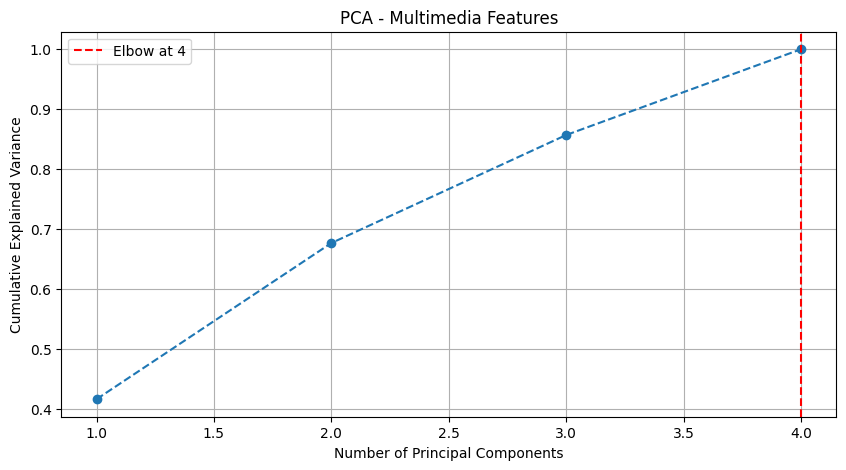

✅ PCA applied to multimedia features. New columns added: ['multimedia_pca1', 'multimedia_pca2', 'multimedia_pca3', 'multimedia_pca4']


C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




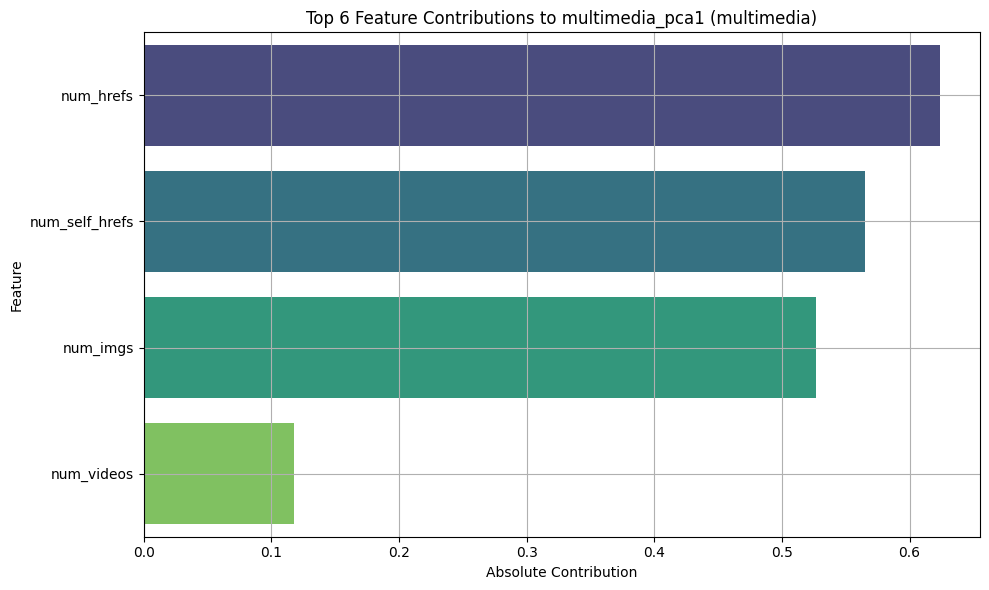

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




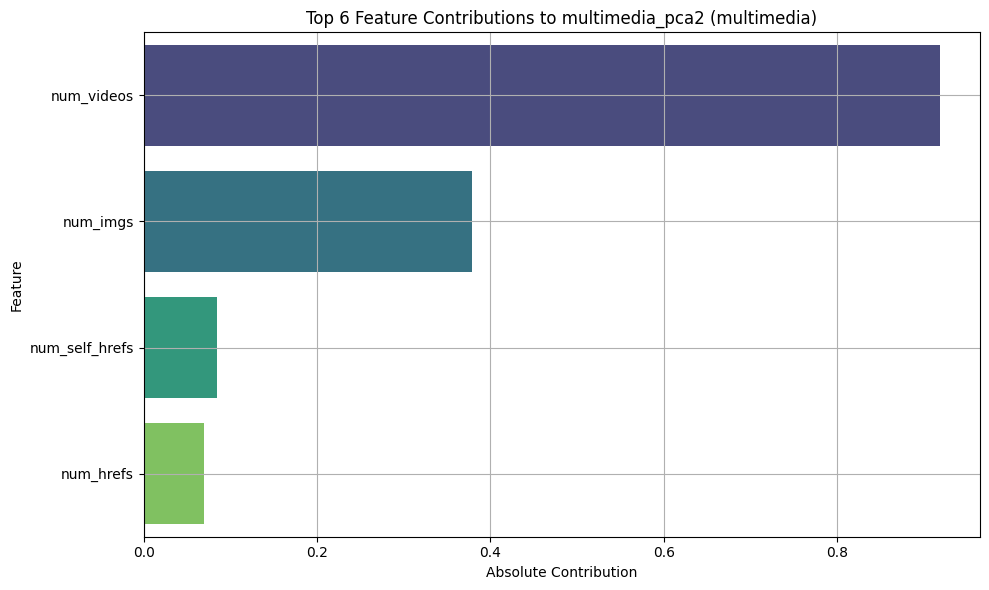

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




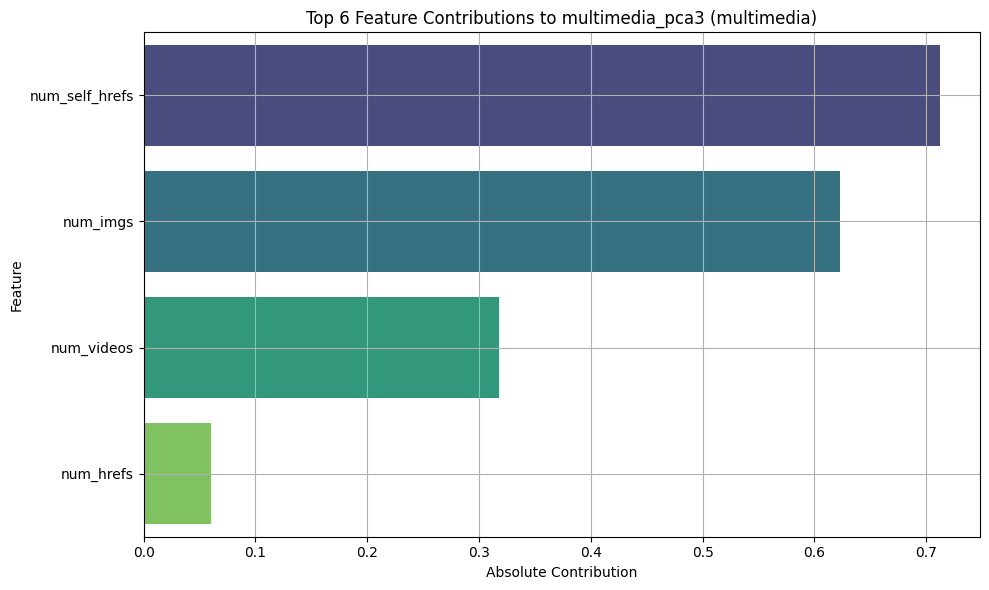

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




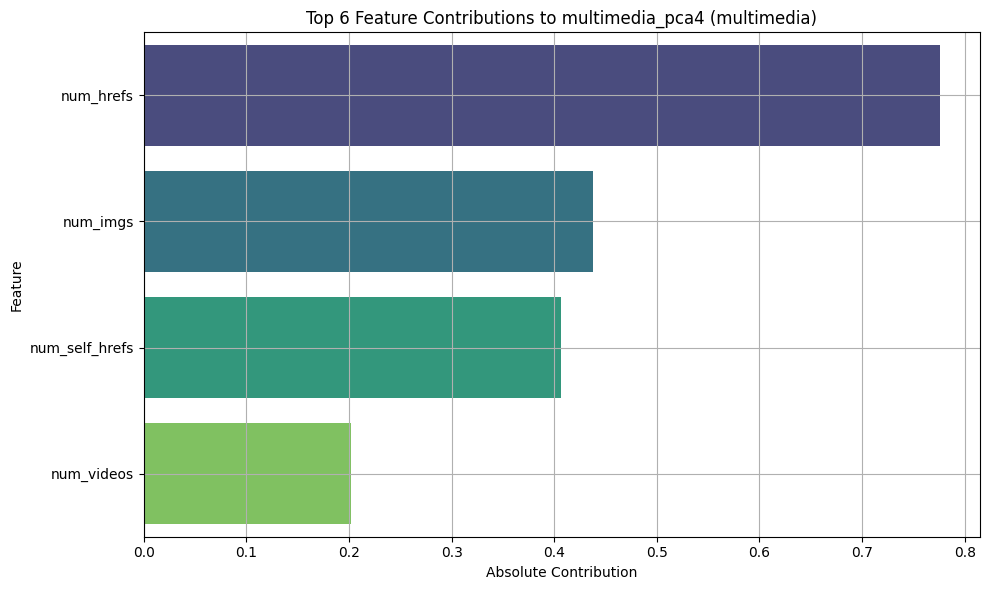


📊 Variance Inflation Factors (VIF):
          feature       VIF
0       num_hrefs  1.295130
1  num_self_hrefs  1.191829
2        num_imgs  1.176177
3      num_videos  1.028966


In [275]:
# Initialize with your DataFrame
pca_tool = PCAAnalyzer(data)

# Apply PCA on one feature group
data = pca_tool.apply_pca(multimedia_features, feature_type='multimedia')

# Plot top contributing features
pca_tool.plot_feature_contributions(top_n_components=6, top_n_features=6)

# Get VIFs
vif_df = pca_tool.calculate_vif()


### PCA for Keyword features

📌 [KEYWORD] Optimal components: 9


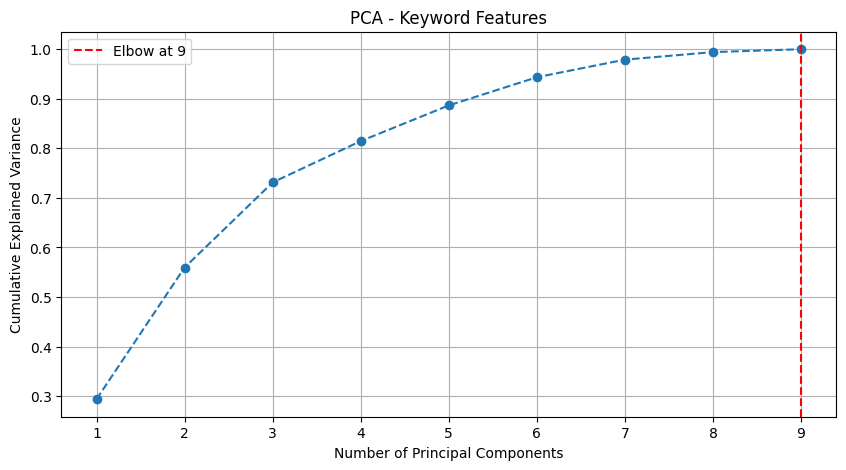

✅ PCA applied to keyword features. New columns added: ['keyword_pca1', 'keyword_pca2', 'keyword_pca3', 'keyword_pca4', 'keyword_pca5', 'keyword_pca6', 'keyword_pca7', 'keyword_pca8', 'keyword_pca9']


C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




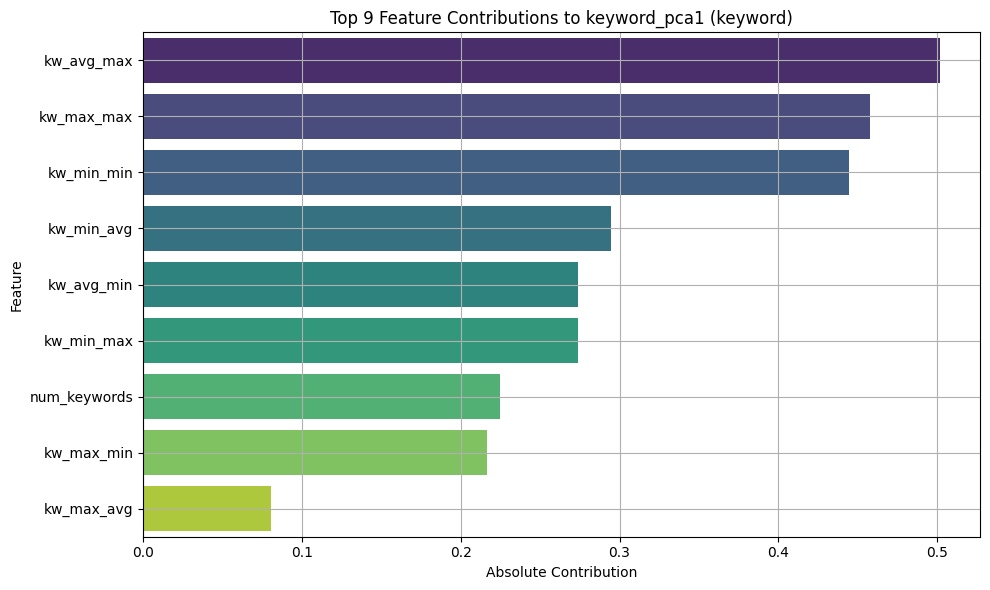

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




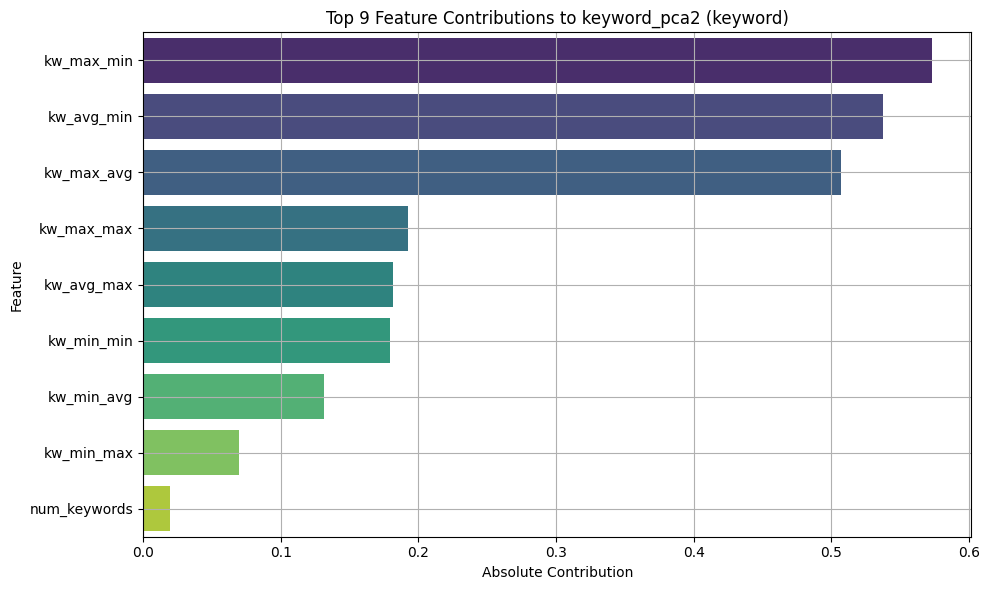

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




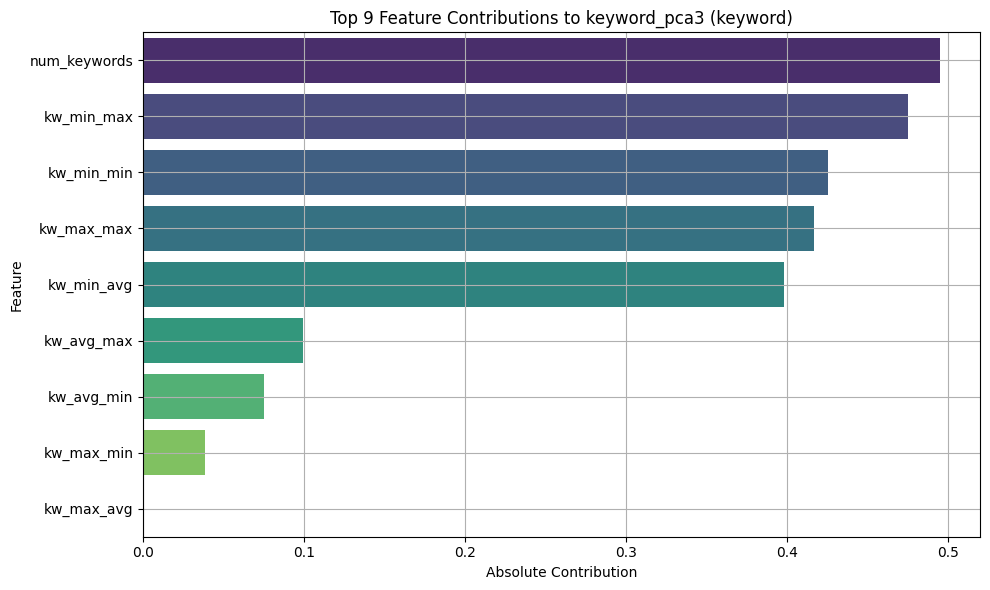

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




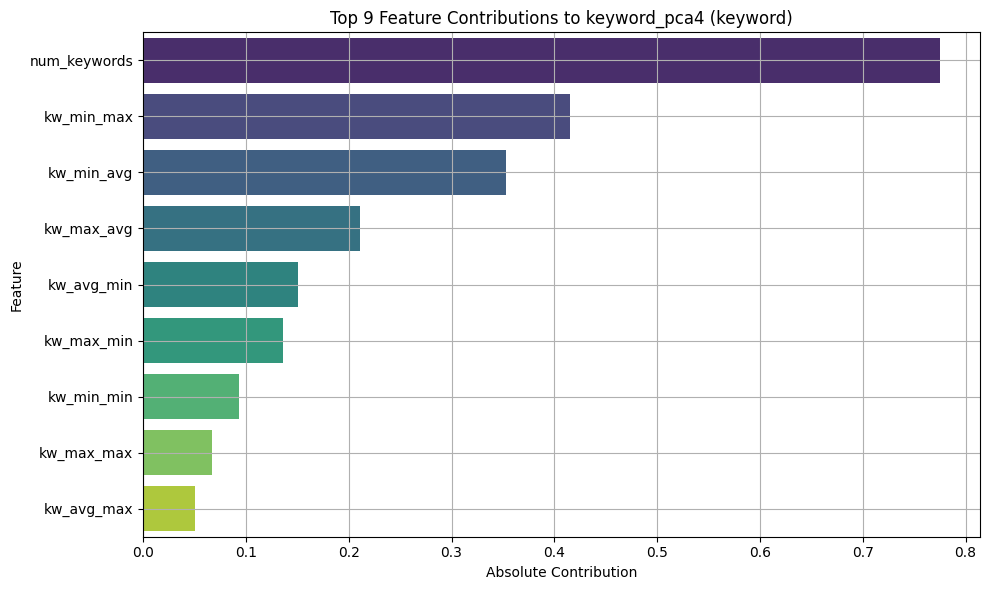

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




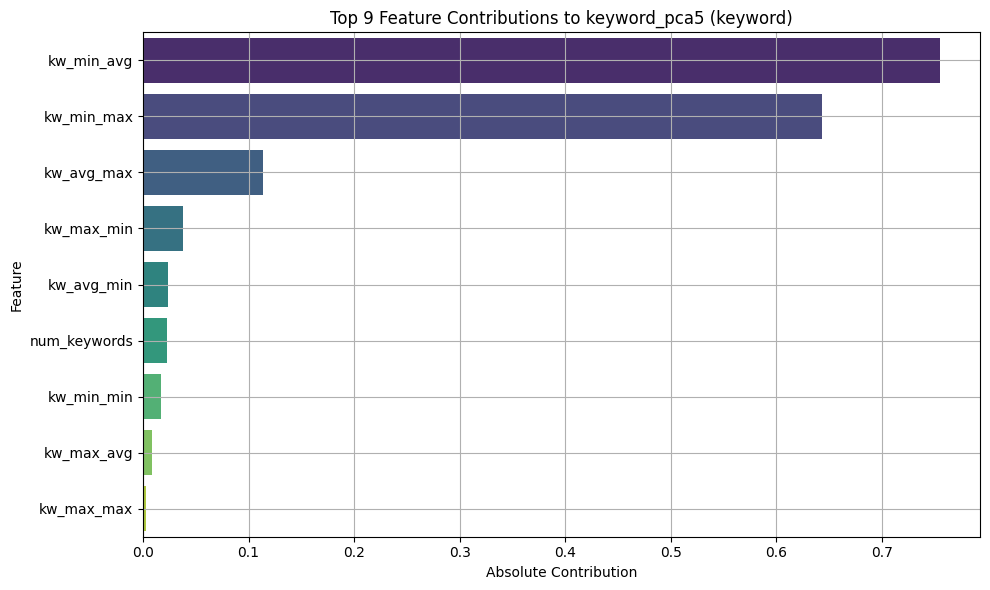

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




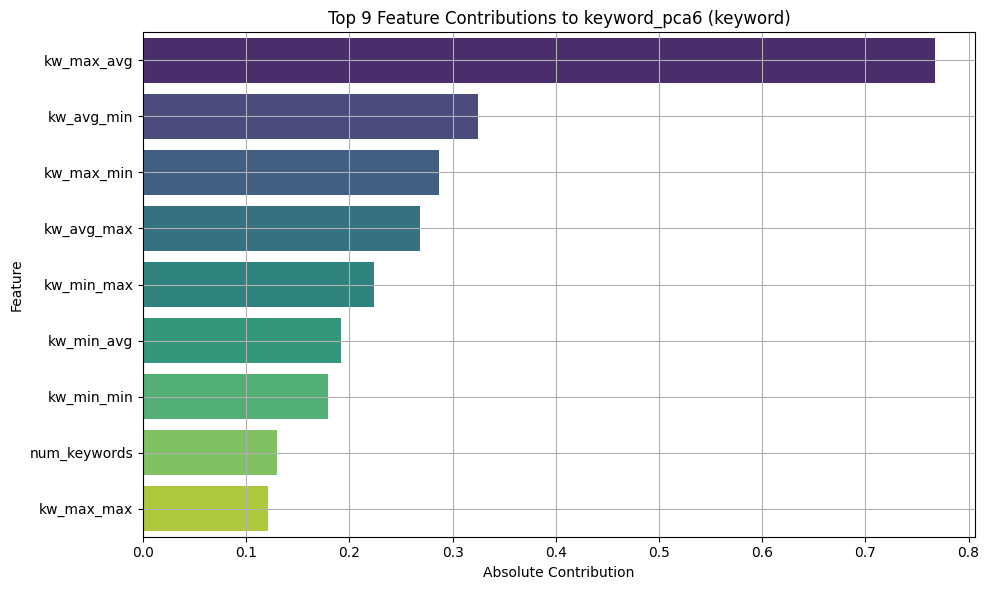

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




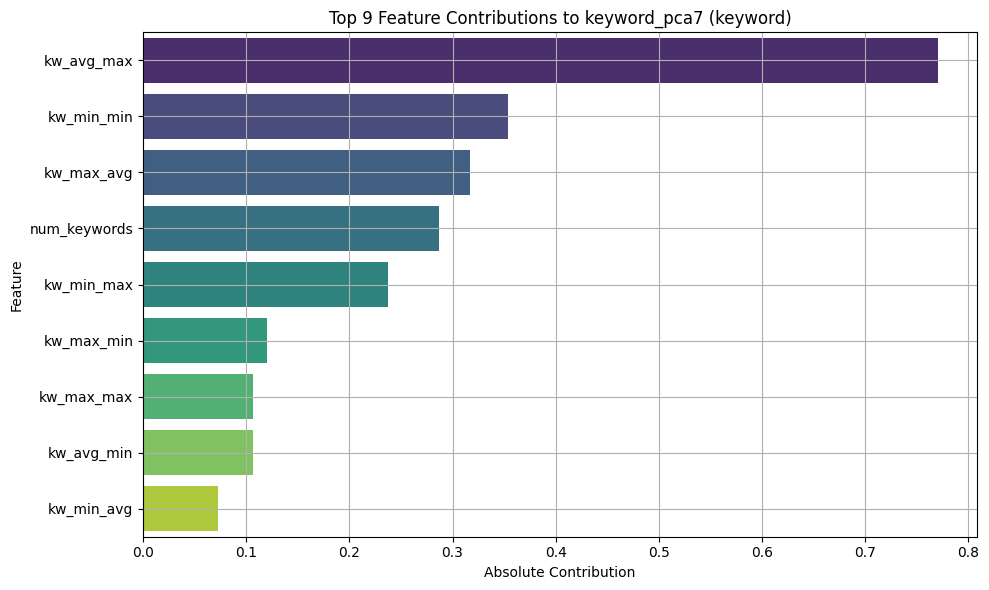

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




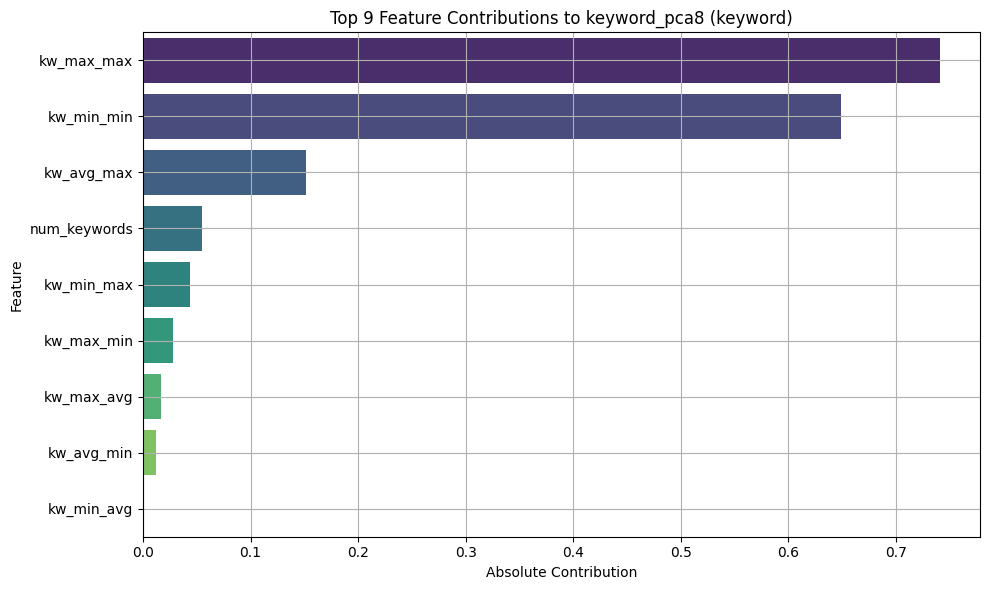

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




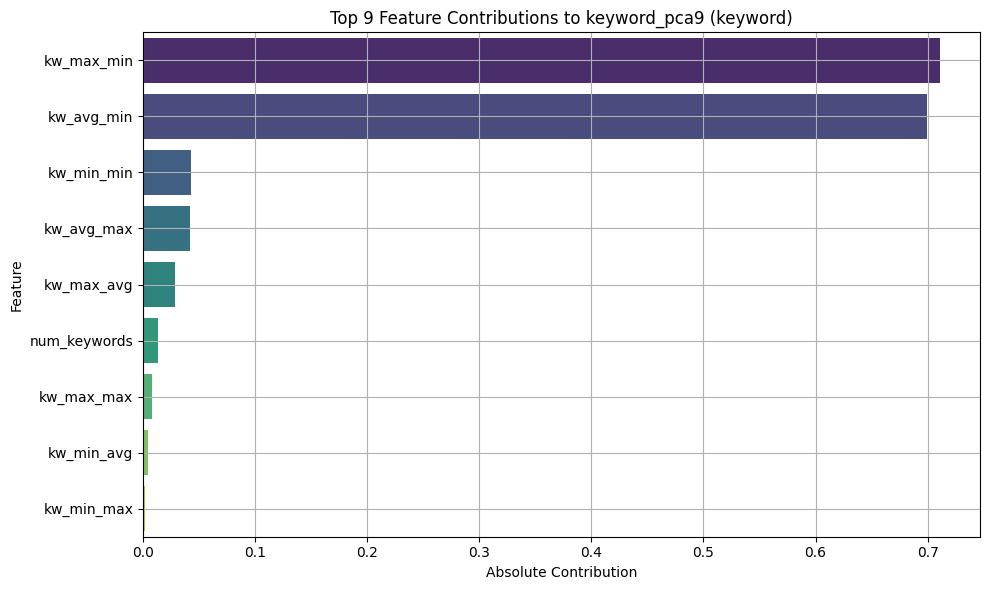


📊 Variance Inflation Factors (VIF):
        feature        VIF
2    kw_max_min  10.029658
3    kw_avg_min   9.754158
5    kw_max_max   4.300424
1    kw_min_min   3.790090
6    kw_avg_max   2.336673
8    kw_max_avg   1.655130
4    kw_min_max   1.332848
0  num_keywords   1.295915
7    kw_min_avg   1.278009


In [276]:
# Initialize with your DataFrame
pca_tool = PCAAnalyzer(data)

# Apply PCA on one feature group
data = pca_tool.apply_pca(keyword_features, feature_type='keyword')

# Plot top contributing features
pca_tool.plot_feature_contributions(top_n_components=9, top_n_features=9)

# Get VIFs
vif_df = pca_tool.calculate_vif()


### PCA For Content type


📌 [COTENT_TYPE] Optimal components: 6


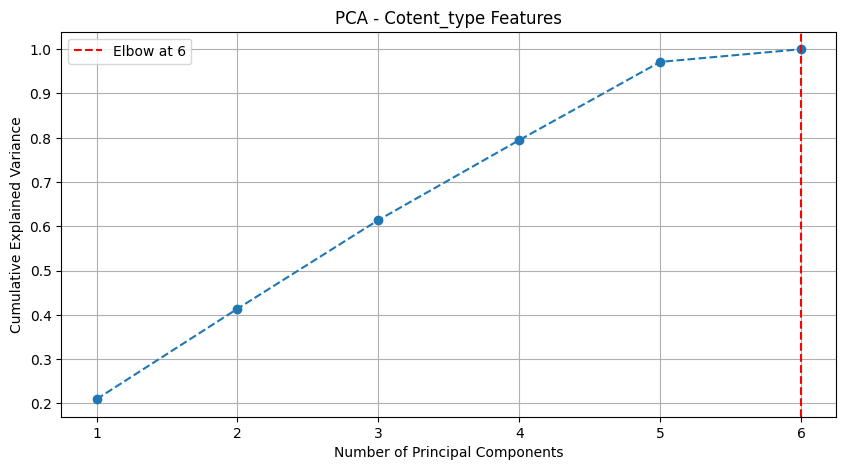

✅ PCA applied to cotent_type features. New columns added: ['cotent_type_pca1', 'cotent_type_pca2', 'cotent_type_pca3', 'cotent_type_pca4', 'cotent_type_pca5', 'cotent_type_pca6']


C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




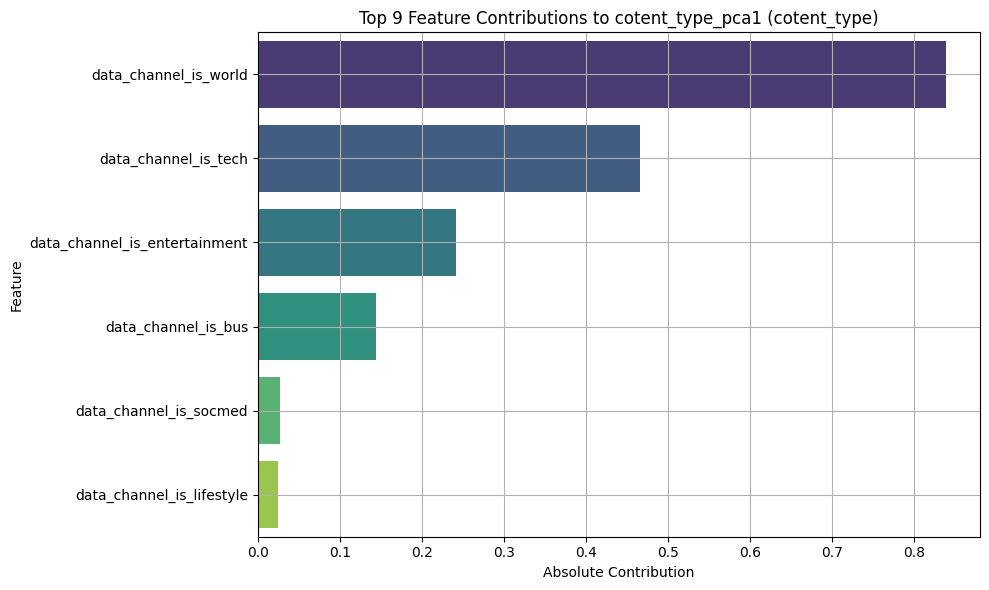

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




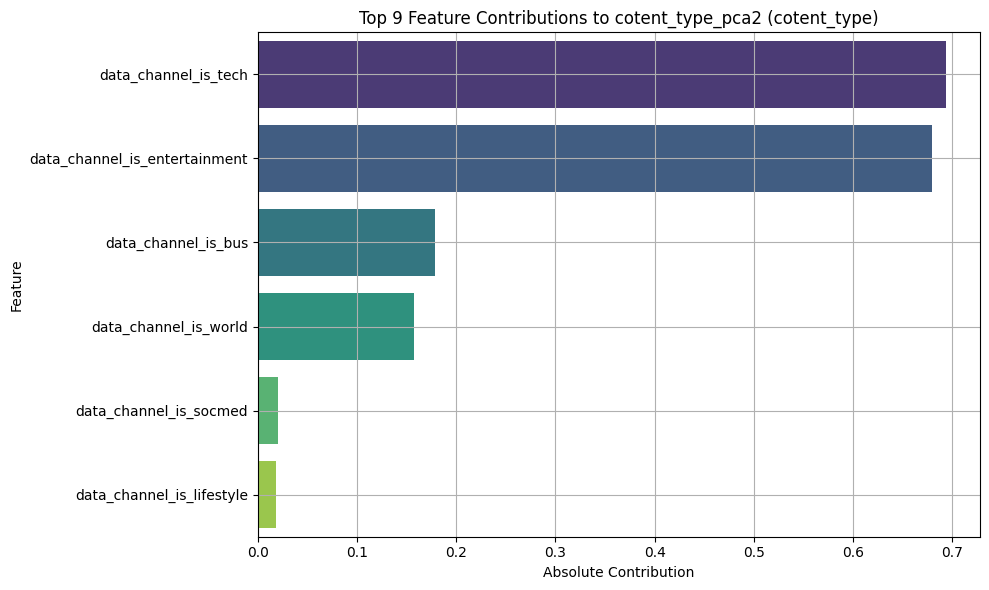

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




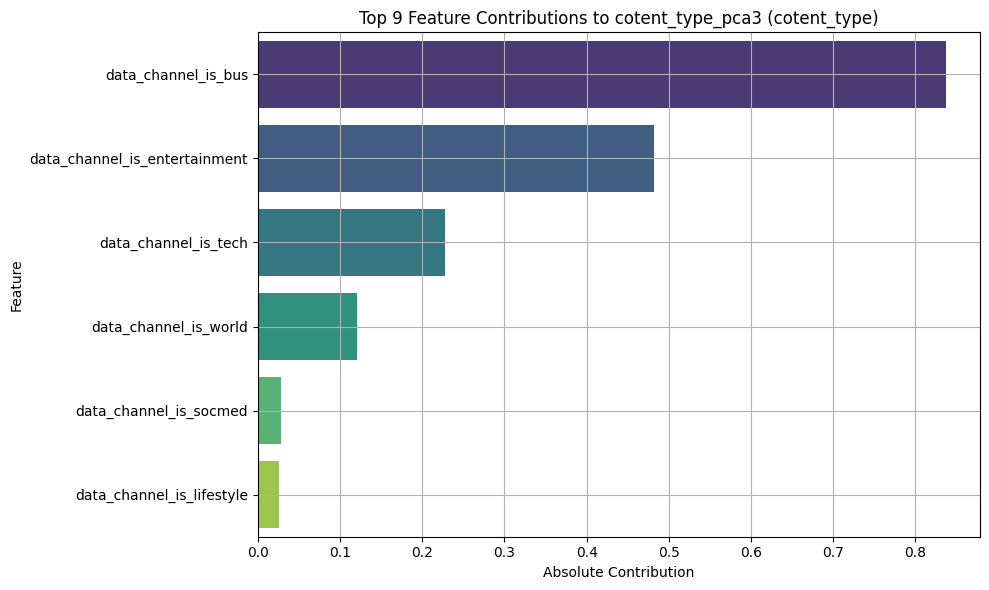

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




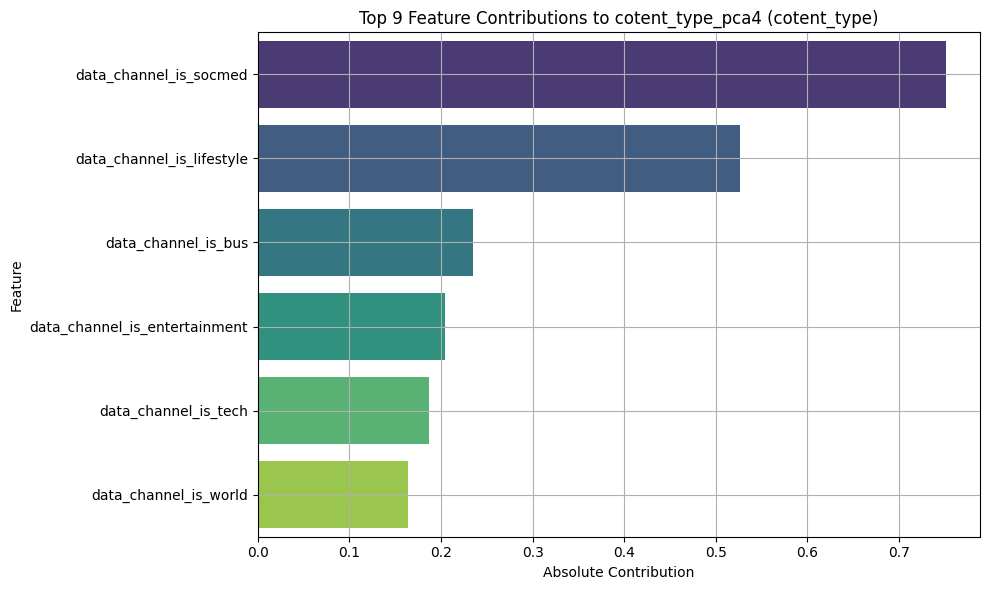

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




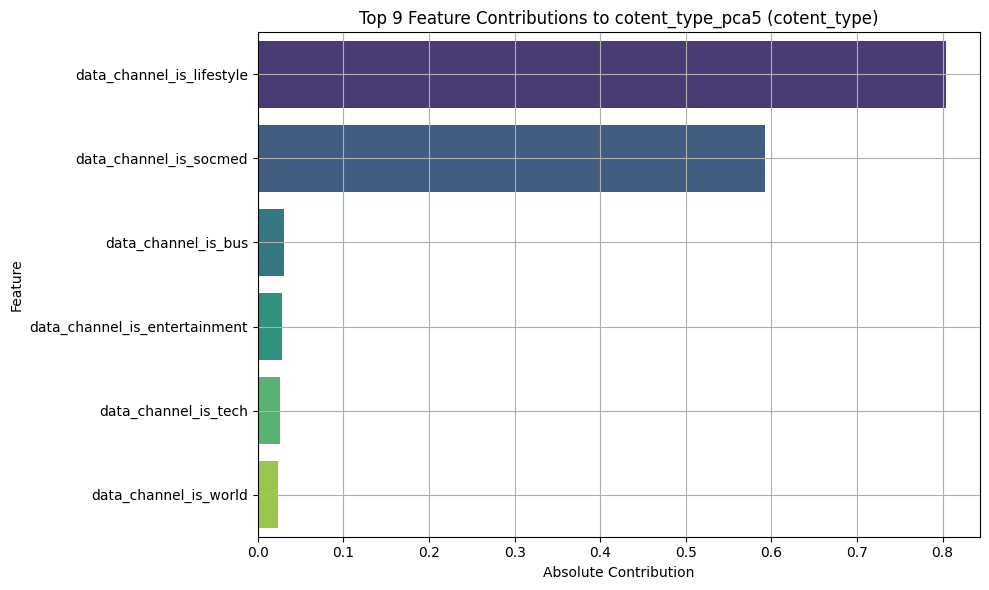

C:\Users\ACER\AppData\Local\Temp\ipykernel_2408\2126755417.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




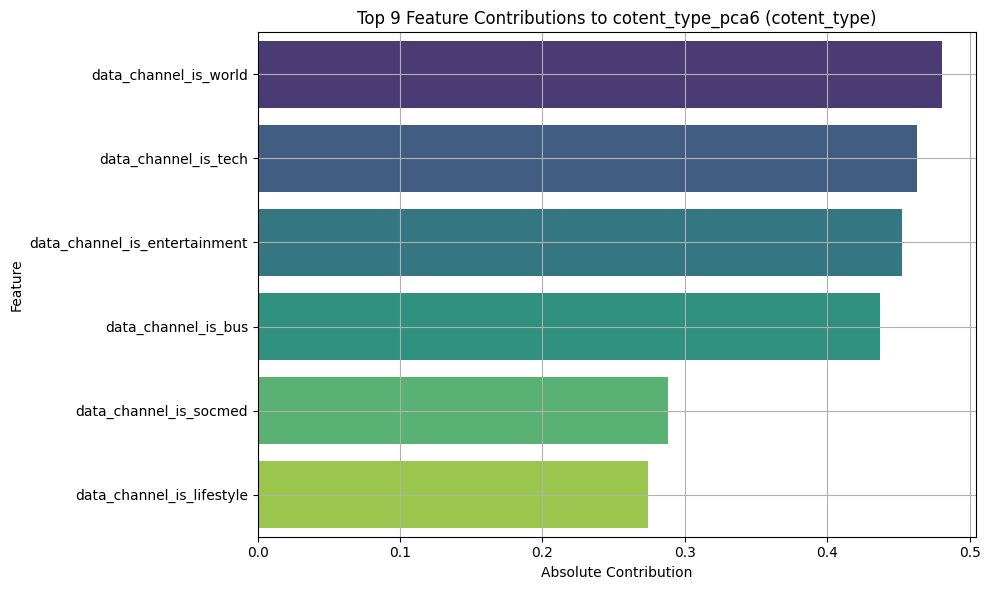


📊 Variance Inflation Factors (VIF):
                         feature       VIF
5          data_channel_is_world  1.959274
4           data_channel_is_tech  1.889507
1  data_channel_is_entertainment  1.847779
2            data_channel_is_bus  1.789323
3         data_channel_is_socmed  1.335499
0      data_channel_is_lifestyle  1.303830


In [277]:
# Initialize with your DataFrame
pca_tool = PCAAnalyzer(data)

# Apply PCA on one feature group
data = pca_tool.apply_pca(content_type_features, feature_type='cotent_type')

# Plot top contributing features
pca_tool.plot_feature_contributions(top_n_components=9, top_n_features=9)

# Get VIFs
vif_df = pca_tool.calculate_vif()


In [278]:
data.describe()

kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
count  38463.000000               38463.000000               38463.000000   
mean    3103.427793                4121.536513               10646.369414   
std     1301.238777               20026.792850               41612.149801   
min        0.000000                   0.000000                   0.000000   
25%     2373.807082                 703.000000                1200.000000   
50%     2850.846753                1200.000000                3000.000000   
75%     3550.518235                2700.000000                8200.000000   
max    43567.659946              843300.000000              843300.000000   

       self_reference_avg_sharess        LDA_00        LDA_01        LDA_02  \
count                38463.000000  38463.000000  38463.000000  38463.000000   
mean                  6598.260636      0.188134      0.141680      0.217177   
std                  24553.836601      0.265547      0.220360      0.282238   
min                      0.000000      0.000000      0.000000      0.000000   
25%                   1100.000000      0.025060      0.025012      0.028572   
50%                   2300.000000      0.033423      0.033345      0.040008   
75%                   5301.535714      0.251934      0.150692      0.335022   
max                 843300.000000      0.926994      0.925947      0.919999   

             LDA_03        LDA_04  global_subjectivity  \
count  38463.000000  38463.000000         38463.000000   
mean       0.214291      0.238692             0.456984   
std        0.288938      0.291382             0.088386   
min        0.000000      0.000000             0.000000   
25%        0.025622      0.028575             0.402457   
50%        0.040000      0.050000             0.456566   
75%        0.340502      0.414587             0.510305   
max        0.926534      0.927191             1.000000   

       global_sentiment_polarity  global_rate_positive_words  \
count               38463.000000                38463.000000   
mean                    0.122973                    0.040842   
std                     0.096091                    0.016229   
min                    -0.393750                    0.000000   
25%                     0.064394                    0.029463   
50%                     0.122517                    0.039604   
75%                     0.179916                    0.050725   
max                     0.727841                    0.155488   

       global_rate_negative_words  rate_positive_words  rate_negative_words  \
count                38463.000000         38463.000000         38463.000000   
mean                     0.017122             0.703096             0.296774   
std                      0.010588             0.150208             0.150032   
min                      0.000000             0.000000             0.000000   
25%                      0.010177             0.612903             0.200000   
50%                      0.015674             0.714286             0.285714   
75%                      0.021987             0.800000             0.387097   
max                      0.184932             1.000000             1.000000   

       avg_positive_polarity  min_positive_polarity  max_positive_polarity  \
count           38463.000000           38463.000000           38463.000000   
mean                0.364689               0.098376               0.779963   
std                 0.085455               0.070382               0.212509   
min                 0.000000               0.000000               0.000000   
25%                 0.311880               0.050000               0.600000   
50%                 0.361872               0.100000               0.800000   
75%                 0.413254               0.100000               1.000000   
max                 1.000000               1.000000               1.000000   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
count     

# Feature Engineering


This section creates new composite features from the original sentiment and polarity-related columns. The idea is to capture more nuanced aspects of the article's sentiment and title characteristics.

- Word-Level Sentiment Features:

sentiment_balance: Calculated as global_rate_positive_words - global_rate_negative_words. This feature represents the net sentiment of the article based on the proportion of positive versus negative words. A higher value indicates a more positive overall sentiment.

sentiment_intensity: Calculated as global_rate_positive_words + global_rate_negative_words. This feature measures the overall strength or prominence of sentiment (both positive and negative) within the article. A higher value suggests the article uses more emotionally charged language.

- Polarity Strength Features: These features attempt to capture the range and average intensity of positive and negative sentiment polarities.

pos_polarity_strength: Calculated as (max_positive_polarity - min_positive_polarity) * avg_positive_polarity. This feature combines the range of positive sentiment scores with the average positive sentiment score, potentially indicating how varied and strong the positive sentiment is.

neg_polarity_strength: Calculated as (max_negative_polarity - min_negative_polarity) * avg_negative_polarity. Similar to the positive version, this combines the range and average of negative sentiment scores.

- Title Impact Features: These features focus on the sentiment and subjectivity expressed specifically in the article's title.

title_impact: Calculated as abs_title_sentiment_polarity * title_subjectivity. This feature aims to capture the overall "strength" or potential impact of the title's emotional tone and how opinionated it is.

title_bias: Calculated as title_sentiment_polarity / (abs_title_sentiment_polarity + 1e-6). This feature attempts to represent the direction of the title's sentiment (positive or negative) relative to its absolute strength. The small value 1e-6 is added to the denominator to prevent division by zero in cases where the absolute polarity is 0.

In [229]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler



# --- Feature Extraction ---
# 1. Word-Level Sentiment Features
data['sentiment_balance'] = data['global_rate_positive_words'] - data['global_rate_negative_words']
data['sentiment_intensity'] = data['global_rate_positive_words'] + data['global_rate_negative_words']

# 2. Polarity Strength Features
data['pos_polarity_strength'] = (data['max_positive_polarity'] - data['min_positive_polarity']) * data['avg_positive_polarity']
data['neg_polarity_strength'] = (data['max_negative_polarity'] - data['min_negative_polarity']) * data['avg_negative_polarity']

# 3. Title Impact Features
data['title_impact'] = data['abs_title_sentiment_polarity'] * data['title_subjectivity']
data['title_bias'] = data['title_sentiment_polarity'] / (data['abs_title_sentiment_polarity'] + 1e-6)  # Avoid division by zero

# --- Drop Original Features (Optional) ---
sentiment_features = [
    'global_rate_positive_words', 'global_rate_negative_words',
    'rate_positive_words', 'rate_negative_words',
    'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity',
    'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity',
    'title_subjectivity', 'title_sentiment_polarity',
    'abs_title_subjectivity', 'abs_title_sentiment_polarity'
]
data = data.drop(columns=sentiment_features)  # Keep only composite features

# --- Standardize Extracted Features ---
composite_features = [
    'sentiment_balance', 'sentiment_intensity',
    'pos_polarity_strength', 'neg_polarity_strength',
    'title_impact', 'title_bias'
]
'''
scaler = StandardScaler()
data[composite_features] = scaler.fit_transform(data[composite_features])

# --- Add Target Variable (if not already present) ---
# Example: Binarize 'shares' (e.g., popular = 1 if shares > median, else 0)
median_shares = data['shares'].median()
data['is_popular'] = (data['shares'] > median_shares).astype(int)

# --- Save Processed Data ---
data.to_csv('processed_news_data.csv', index=False)
print("Feature extraction complete. Composite features saved!") '''

'\nscaler = StandardScaler()\ndata[composite_features] = scaler.fit_transform(data[composite_features])\n\n# --- Add Target Variable (if not already present) ---\n# Example: Binarize \'shares\' (e.g., popular = 1 if shares > median, else 0)\nmedian_shares = data[\'shares\'].median()\ndata[\'is_popular\'] = (data[\'shares\'] > median_shares).astype(int)\n\n# --- Save Processed Data ---\ndata.to_csv(\'processed_news_data.csv\', index=False)\nprint("Feature extraction complete. Composite features saved!") '

First let's split the data into train and test

In [269]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, mean_squared_error, r2_score,
                            classification_report, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

For classification we split the is_popular category and the is_not_popular based on the median

In [ ]:
drop_cols = [
                   
    'is_popular',
    'shares' 
]
# Final cleaned version of features and targets
X = data.drop(columns=drop_cols)  # remove leaks and targets
y_class = data['is_popular'] # classification label
y_reg = data['shares'] # regression label


In [271]:

# === First split: 60% train, 20% validation, 20% test ===
X_temp, X_test, y_temp_class, y_test_class = train_test_split(
    X,
    y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class  # Stratify using the classification target
)

# Split temp into train and validation (0.25 * 0.8 = 0.2 of original)
X_train, X_val, y_train_class, y_val_class = train_test_split(
    X_temp,
    y_temp_class,
    test_size=0.25,
    random_state=42,
    stratify=y_temp_class
)

# Get the indices from the original dataframe
train_indices = X_train.index
val_indices = X_val.index
test_indices = X_test.index

# Create regression targets (either raw 'shares' )
y_train_reg = data.loc[train_indices, 'shares']  # or 'shares' depending on your approach
y_val_reg = data.loc[val_indices, 'shares']
y_test_reg = data.loc[test_indices, 'shares']

In [ ]:


from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error as mae

import numpy as np

# Function to normalize features for models that require it
def normalize_features(X_train, X_val, X_test, models_need_scaling):
    """
    Normalize features for models that require scaling
    Returns the original and normalized datasets in a dictionary
    """
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    data_dict = {
        'original': (X_train, X_val, X_test),
        'scaled': (X_train_scaled, X_val_scaled, X_test_scaled)
    }
    
    return data_dict, scaler



def train_evaluate_regression_models(data_dict, y_train, y_val, y_test, regression_models, models_need_scaling):
    results = {}
   
    for model_name, model in regression_models.items():
        print(f"Training regression model: {model_name}...")
       
        if model_name in models_need_scaling:
            X_train, X_val, X_test = data_dict['scaled']
        else:
            X_train, X_val, X_test = data_dict['original']
       
        model.fit(X_train, y_train)
       
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)
       
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_rmse = np.sqrt(val_mse)
        val_mae = mean_absolute_error(y_val, y_val_pred)
        val_r2 = r2_score(y_val, y_val_pred)
       
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
       
        results[model_name] = {
            'model': model,
            'validation': {
                'mse': val_mse,
                'rmse': val_rmse,
                'mae': val_mae,
                'r2': val_r2,
                'predictions': y_val_pred
            },
            'test': {
                'mse': test_mse,
                'rmse': test_rmse,
                'mae': test_mae,
                'r2': test_r2,
                'predictions': y_test_pred
            }
        }

      
   
    return results


# Modeling Part

### Splitting the data into training , validation and testing sets 

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import (BayesianRidge, LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor)
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


In [316]:

# ===============================
#  1.  Splitting
# ===============================

drop_cols = ['is_popular', 'shares']
X = data.drop(columns=drop_cols)
y_class = data['is_popular'] # classification label
y_reg = data['shares'] # regression label

# First split
X_temp, X_test, y_temp_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, stratify=y_class, random_state=42
)

X_train, X_val, y_train_class, y_val_class = train_test_split(
    X_temp, y_temp_class, test_size=0.25, stratify=y_temp_class, random_state=42
)

# Get regression targets using indices
train_indices = X_train.index
val_indices = X_val.index
test_indices = X_test.index

y_train_reg = data.loc[train_indices, 'shares']
y_val_reg = data.loc[val_indices, 'shares']
y_test_reg = data.loc[test_indices, 'shares']


### Transformation and scaling

- since the data is very skewed and many outliers , we will handle this by using the  Yeo-Johnson trasformation on the features ( non binary features ) and on the target variable shares.

In [317]:

# ===============================
#  2. Yeo-Johnson Transform on Features
# ===============================

binary_cols = content_type_features + weekday_features
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.difference(binary_cols)

yeo_feature = PowerTransformer(method='yeo-johnson')

X_train_num = X_train[numerical_cols]
X_val_num = X_val[numerical_cols]
X_test_num = X_test[numerical_cols]

X_train_trans = yeo_feature.fit_transform(X_train_num)
X_val_trans = yeo_feature.transform(X_val_num)
X_test_trans = yeo_feature.transform(X_test_num)

X_train_final = X_train.copy()
X_val_final = X_val.copy()
X_test_final = X_test.copy()

X_train_final[numerical_cols] = X_train_trans
X_val_final[numerical_cols] = X_val_trans
X_test_final[numerical_cols] = X_test_trans

# ===============================
#  3. Yeo-Johnson Transform on Target
# ===============================

yeo_target = PowerTransformer(method='yeo-johnson')
y_train_trans = yeo_target.fit_transform(y_train_reg.values.reshape(-1, 1)).flatten()
y_val_trans = yeo_target.transform(y_val_reg.values.reshape(-1, 1)).flatten()
y_test_trans = yeo_target.transform(y_test_reg.values.reshape(-1, 1)).flatten()

# ===============================
#  4. Scaling for Selected Models
# ===============================

models_need_scaling = {"KNN", "SVM", "Neural Network", "Bayesian Ridge"}

def normalize_features(X_train, X_val, X_test):
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    return {'original': (X_train, X_val, X_test), 'scaled': (X_train_scaled, X_val_scaled, X_test_scaled)}, scaler

data_dict, scaler = normalize_features(X_train_final, X_val_final, X_test_final)


### Modeling

In [318]:

# ===============================
#  5. Model Definitions
# ===============================

regression_models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "Bayesian Ridge": BayesianRidge(),
    "SVM": SVR(),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000),
    "Linear Regression": LinearRegression()
}

# ===============================
#  6. Training & Evaluation
# ===============================

def train_evaluate_regression_models(data_dict, y_train, y_val, y_test, models, models_need_scaling, inverse_target):
    results = {}
    for name, model in models.items():
        print(f"🔧 Training model: {name}")
        if name in models_need_scaling:
            X_train, X_val, X_test = data_dict['scaled']
        else:
            X_train, X_val, X_test = data_dict['original']

        model.fit(X_train, y_train)
        val_pred = inverse_target.inverse_transform(model.predict(X_val).reshape(-1, 1)).flatten()
        test_pred = inverse_target.inverse_transform(model.predict(X_test).reshape(-1, 1)).flatten()
        y_val_true = inverse_target.inverse_transform(y_val.reshape(-1, 1)).flatten()
        y_test_true = inverse_target.inverse_transform(y_test.reshape(-1, 1)).flatten()

        results[name] = {
            'model': model,
            'validation': {
                'mse': mean_squared_error(y_val_true, val_pred),
                'rmse': np.sqrt(mean_squared_error(y_val_true, val_pred)),
                'mae': mean_absolute_error(y_val_true, val_pred),
                'r2': r2_score(y_val_true, val_pred),
                'predictions': val_pred
            },
            'test': {
                'mse': mean_squared_error(y_test_true, test_pred),
                'rmse': np.sqrt(mean_squared_error(y_test_true, test_pred)),
                'mae': mean_absolute_error(y_test_true, test_pred),
                'r2': r2_score(y_test_true, test_pred),
                'predictions': test_pred
            }
        }
    return results

regression_results = train_evaluate_regression_models(
    data_dict, y_train_trans, y_val_trans, y_test_trans,
    regression_models, models_need_scaling, yeo_target
)


🔧 Training model: Decision Tree
🔧 Training model: Random Forest
🔧 Training model: KNN
🔧 Training model: Bayesian Ridge
🔧 Training model: SVM
🔧 Training model: Neural Network
🔧 Training model: Linear Regression


### Visualization of the results

📊 Model Performance Summary:
                Model      Val MAE       Val MSE      Val RMSE    Val R²  \
4                SVM  2296.063727  1.655466e+08  12866.492847 -0.007967   
1      Random Forest  2310.966793  1.653308e+08  12858.102812 -0.006653   
3     Bayesian Ridge  2324.929938  1.657663e+08  12875.025591 -0.009305   
6  Linear Regression  2325.472865  1.657600e+08  12874.780530 -0.009266   
2                KNN  2396.894540  1.655150e+08  12865.264234 -0.007775   
5     Neural Network  2552.740843  1.670555e+08  12924.993426 -0.017154   
0      Decision Tree  4316.812297  4.575352e+08  21390.073158 -1.785804   

      Test MAE      Test MSE     Test RMSE   Test R²  
4  2321.157034  1.274784e+08  11290.633382 -0.007512  
1  2341.599854  1.274289e+08  11288.442182 -0.007121  
3  2358.192408  1.280922e+08  11317.783797 -0.012364  
6  2359.343353  1.281673e+08  11321.099977 -0.012957  
2  2421.319718  1.278625e+08  11307.629109 -0.010548  
5  2541.713041  1.271478e+08  11275.985

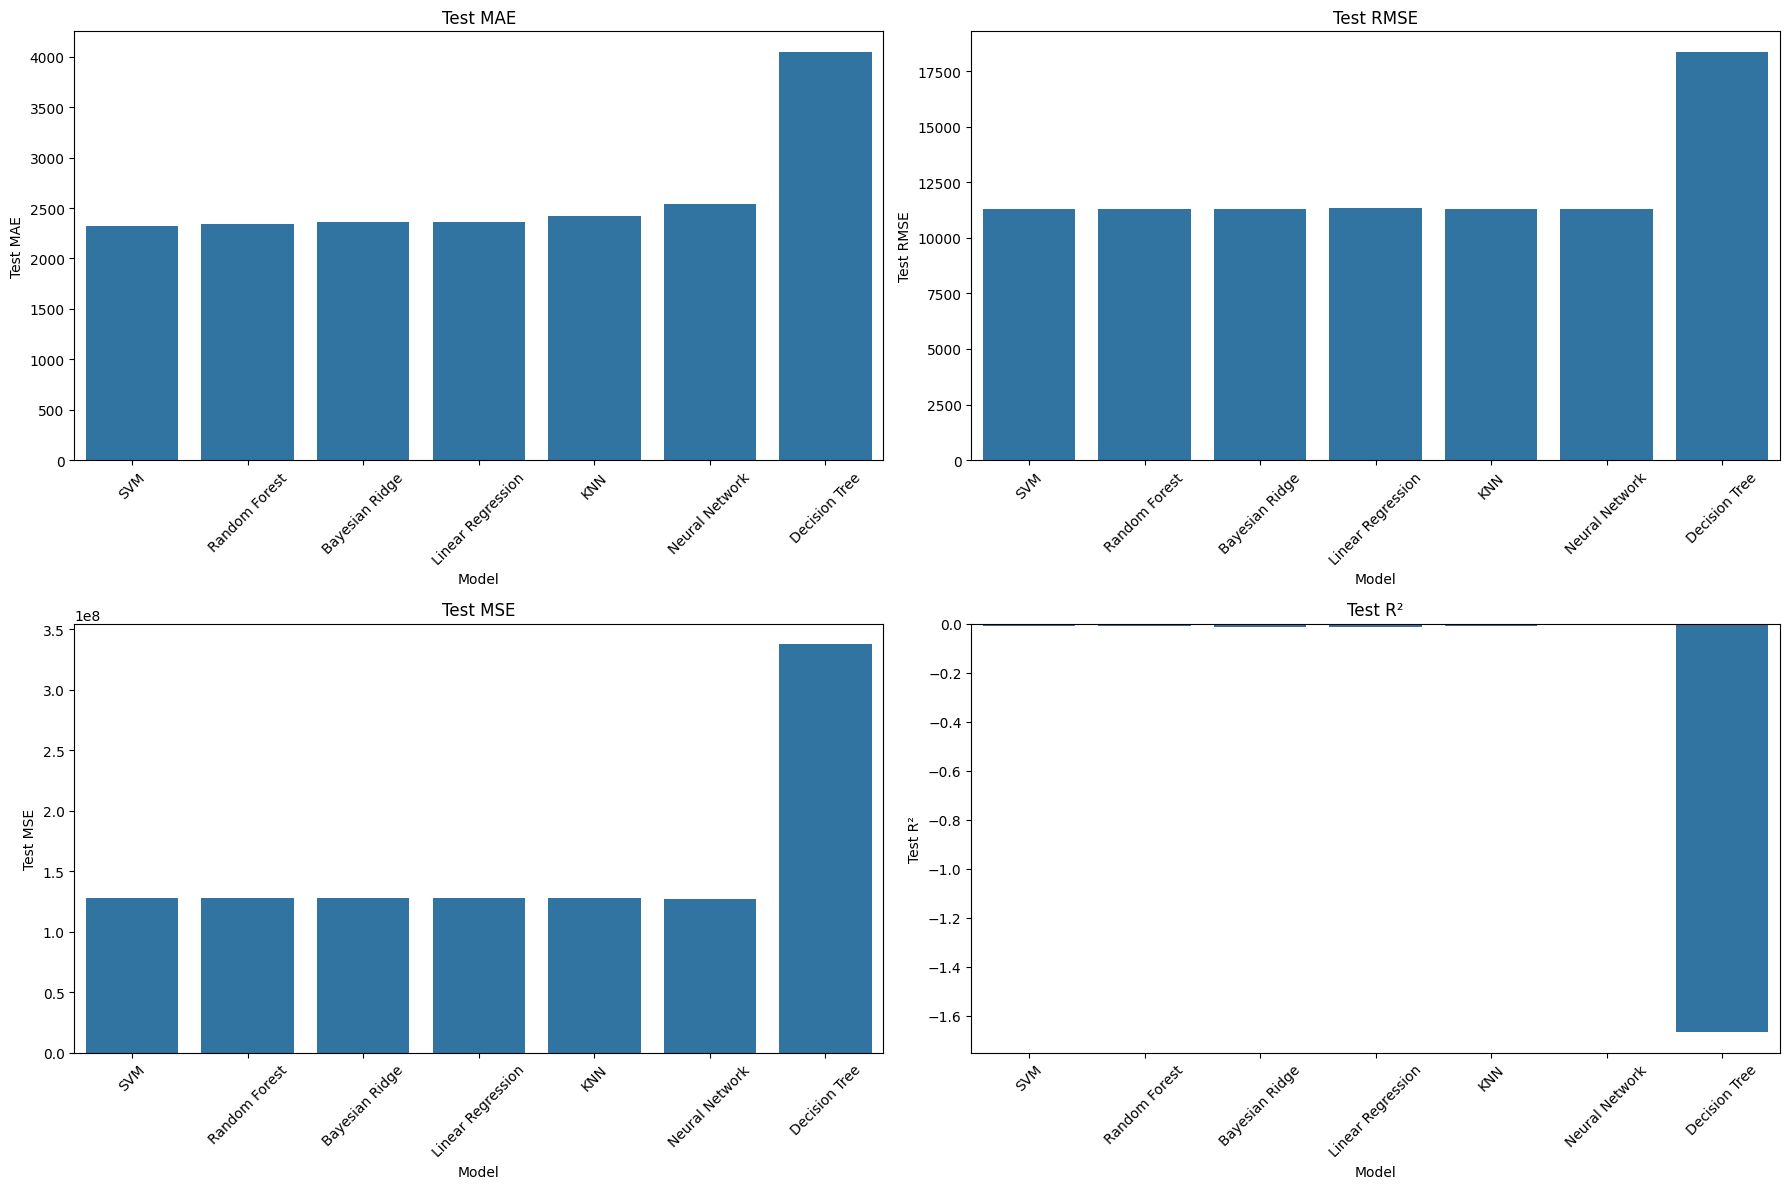

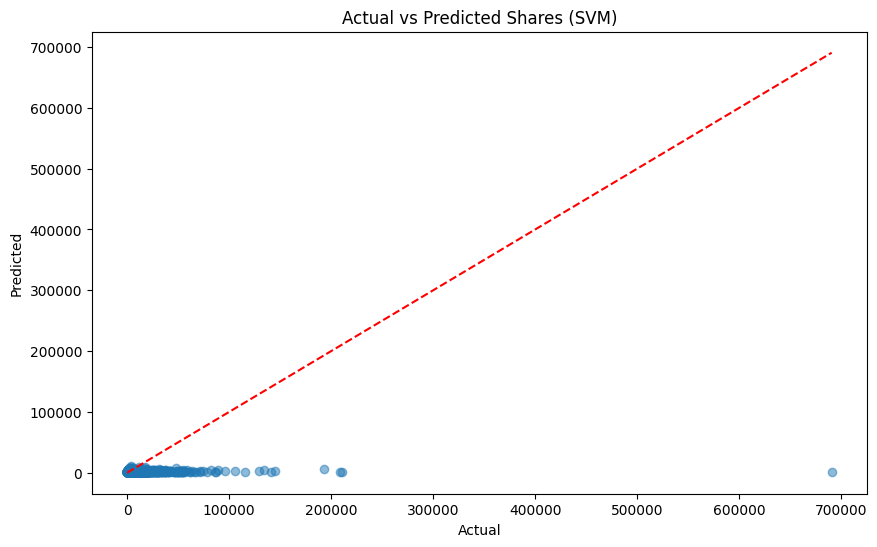

In [319]:

# ===============================
#  7. Visualization
# ===============================

def visualize_regression_results(results, y_val, y_test, y_val_true, y_test_true):
    summary = {
        'Model': [],
        'Val MAE': [], 'Val MSE': [], 'Val RMSE': [], 'Val R²': [],
        'Test MAE': [], 'Test MSE': [], 'Test RMSE': [], 'Test R²': []
    }

    for name, res in results.items():
        summary['Model'].append(name)
        for metric, symbol in zip(['mae', 'mse', 'rmse', 'r2'], ['MAE', 'MSE', 'RMSE', 'R²']):
            summary[f'Val {symbol}'].append(res['validation'][metric])
            summary[f'Test {symbol}'].append(res['test'][metric])

    df = pd.DataFrame(summary).sort_values(by='Test MAE')
    print("📊 Model Performance Summary:\n", df)

    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    sns.barplot(x='Model', y='Test MAE', data=df, ax=axes[0, 0])
    axes[0, 0].set_title('Test MAE')
    sns.barplot(x='Model', y='Test RMSE', data=df, ax=axes[0, 1])
    axes[0, 1].set_title('Test RMSE')
    sns.barplot(x='Model', y='Test MSE', data=df, ax=axes[1, 0])
    axes[1, 0].set_title('Test MSE')
    sns.barplot(x='Model', y='Test R²', data=df, ax=axes[1, 1])  #  fixed
    axes[1, 1].set_title('Test R²')

    for ax in axes.flatten(): ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

    best = df.iloc[0]['Model']
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_true, results[best]['test']['predictions'], alpha=0.5)
    plt.plot([y_test_true.min(), y_test_true.max()], [y_test_true.min(), y_test_true.max()], 'r--')
    plt.title(f'Actual vs Predicted Shares ({best})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    return df


regression_summary = visualize_regression_results(
    regression_results,
    y_val_trans, y_test_trans,
    yeo_target.inverse_transform(y_val_trans.reshape(-1, 1)).flatten(),
    yeo_target.inverse_transform(y_test_trans.reshape(-1, 1)).flatten()
)


Validation Performance:

- All models have MAE around 2300–2500, RMSE ~12,800, and R² around ~0 or less.

- Best validation MAE: SVM (2296).

- Worst model: Decision Tree — very high errors and R² < -1.7, indicating extreme overfitting or poor generalization.

Test Performance:

- MAE stays in the 2300–2500 range, RMSE around 11,300, and R² ~0 or even slightly negative.

- This means:  models are barely better than predicting the average of the target variable.

R square results :

- An R² below 0 means your models are performing worse than a baseline predictor that simply predicts the mean of the target every time.

- None of the models are doing a good job of explaining or predicting the target.

So the result is very bad even after handling outliers and skewness , the reasons for that : 

- Features may not have predictive power and this was noticed before in the correlation matrix.
- Problem might be inherently hard to predict using regression.




In [320]:
y_train_reg.describe()

count     23077.000000
mean       3349.276769
std       11260.594500
min           5.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      663600.000000
Name: shares, dtype: float64

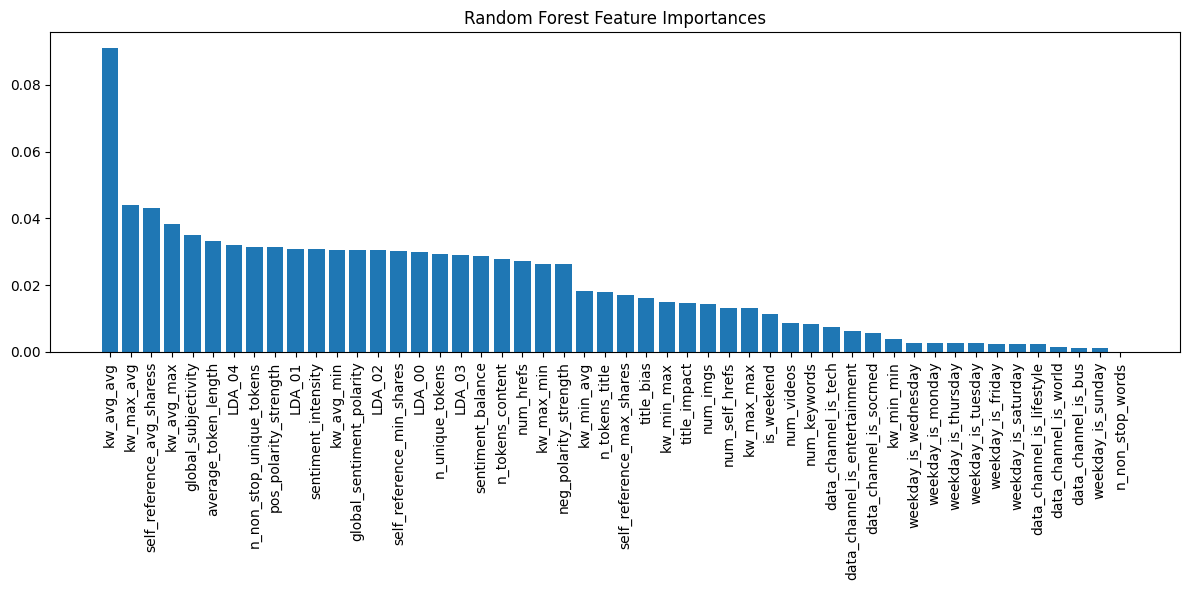

In [321]:

# === Step 3: Feature importance for Random Forest ===

def plot_rf_feature_importance(rf_model, feature_names):
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title("Random Forest Feature Importances")
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Get the trained Random Forest model from your results dictionary
rf_model = regression_results["Random Forest"]['model']

# Plot feature importance for Random Forest
plot_rf_feature_importance(rf_model, np.array(X_train_final.columns))


- Content quality and keyword richness are more important than when or where the article was published.

- Topic modeling (LDA) and sentiment still play an important role.

- Metadata (e.g., weekday, data channel) doesn't help the model much

### hyperparameter tuning

In [322]:
from sklearn.inspection import permutation_importance

# === Step 1: GridSearchCV for SVR on scaled training data ===

svr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf']
}

svr_grid = GridSearchCV(SVR(), svr_param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
X_train_scaled, X_val_scaled, X_test_scaled = data_dict['scaled']

print("🔎 Running GridSearchCV for SVR...")
svr_grid.fit(X_train_scaled, y_train_trans)

print(f"Best SVR Params: {svr_grid.best_params_}")
best_svr = svr_grid.best_estimator_

# === Step 2: Evaluate best SVR on validation and test sets ===

def evaluate_model(model, X_val, X_test, y_val, y_test, inverse_target):
    val_pred = inverse_target.inverse_transform(model.predict(X_val).reshape(-1, 1)).flatten()
    test_pred = inverse_target.inverse_transform(model.predict(X_test).reshape(-1, 1)).flatten()
    y_val_true = inverse_target.inverse_transform(y_val.reshape(-1, 1)).flatten()
    y_test_true = inverse_target.inverse_transform(y_test.reshape(-1, 1)).flatten()

    metrics = {
        'val_mse': mean_squared_error(y_val_true, val_pred),
        'val_rmse': np.sqrt(mean_squared_error(y_val_true, val_pred)),
        'val_mae': mean_absolute_error(y_val_true, val_pred),
        'val_r2': r2_score(y_val_true, val_pred),
        'test_mse': mean_squared_error(y_test_true, test_pred),
        'test_rmse': np.sqrt(mean_squared_error(y_test_true, test_pred)),
        'test_mae': mean_absolute_error(y_test_true, test_pred),
        'test_r2': r2_score(y_test_true, test_pred),
        'val_predictio ns': val_pred,
        'test_predictions': test_pred,
    }
    return metrics

svr_metrics = evaluate_model(best_svr, X_val_scaled, X_test_scaled, y_val_trans, y_test_trans, yeo_target)

print("📊 Best SVR Performance:")
print(svr_metrics)


🔎 Running GridSearchCV for SVR...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best SVR Params: {'C': 0.1, 'epsilon': 0.2, 'kernel': 'rbf'}
📊 Best SVR Performance:
{'val_mse': 166110045.20673162, 'val_rmse': np.float64(12888.368601445709), 'val_mae': 2293.8883088767348, 'val_r2': -0.01139774102354374, 'test_mse': 128241729.57150924, 'test_rmse': np.float64(11324.386498681031), 'test_mae': 2317.4127188033385, 'test_r2': -0.013545282522552382, 'val_predictions': array([ 979.98064806,  879.08541784, 1921.65035681, ...,  835.52224071,
       1328.29630678, 1644.12983821], shape=(7693,)), 'test_predictions': array([2072.24651811, 1033.96029048, 1192.99512731, ..., 1397.34504266,
       2898.57969859, 1543.68838572], shape=(7693,))}



In conclusion, while different data transformation techniques (Log and Yeo-Johnson) were explored to handle skewness and showed some ability to model the transformed target, the evaluation on the original shares scale revealed significant challenges. The models struggled to effectively predict the precise number of shares, particularly for high-popularity articles. While SVM and Random Forest showed marginally better performance in minimizing error metrics like MAE and RMSE among the evaluated models (excluding the poor-performing Decision Tree), the consistently high error magnitudes relative to the typical share counts and the very low/negative $R^2$ values indicate that, based on the evaluated models and methodology, the data is not well-suited for accurately predicting the precise popularity score as a regression problem using these standard techniques. Given the significant difficulty in predicting the exact share count, this dataset might be more amenable to a classification task, such as predicting whether an article will be popular (e.g., above median shares) or not popular.

## Classification

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# === Scale features (same as in regression) ===
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# === Evaluation Function ===
def evaluate_classifier(model, X_val, y_val, X_test, y_test):
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)

    print("🔍 Validation Performance:")
    print(classification_report(y_val, val_preds))
    print("\n✅ Test Performance:")
    print(classification_report(y_test, test_preds))
    

# === Logistic Regression ===
log_clf = LogisticRegression(max_iter=1000, class_weight='balanced')
log_clf.fit(X_train_scaled, y_train_class)
print("\n📊 Logistic Regression")
evaluate_classifier(log_clf, X_val_scaled, y_val_class, X_test_scaled, y_test_class)

# === Random Forest Classifier ===
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train_scaled, y_train_class)
print("\n🌲 Random Forest Classifier")
evaluate_classifier(rf_clf, X_val_scaled, y_val_class, X_test_scaled, y_test_class)

# === XGBoost Classifier ===
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=1)
xgb_clf.fit(X_train_scaled, y_train_class)
print("\n🚀 XGBoost Classifier")
evaluate_classifier(xgb_clf, X_val_scaled, y_val_class, X_test_scaled, y_test_class)



📊 Logistic Regression
🔍 Validation Performance:
              precision    recall  f1-score   support

           0       0.61      0.64      0.62      3600
           1       0.67      0.64      0.65      4093

    accuracy                           0.64      7693
   macro avg       0.64      0.64      0.64      7693
weighted avg       0.64      0.64      0.64      7693


✅ Test Performance:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      3600
           1       0.67      0.65      0.66      4093

    accuracy                           0.64      7693
   macro avg       0.64      0.64      0.64      7693
weighted avg       0.64      0.64      0.64      7693


🌲 Random Forest Classifier
🔍 Validation Performance:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      3600
           1       0.68      0.72      0.70      4093

    accuracy                           0.67      7693
   m

In [313]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# === Define parameter grid ===
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# === GridSearchCV setup ===
rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=rf_param_grid,
    scoring='f1',  # or 'roc_auc' if you prefer
    cv=5,
    n_jobs=-1,
    verbose=1
)

# === Fit on scaled training data ===
print("🔍 Running GridSearchCV for Random Forest Classifier...")
grid_search_rf.fit(X_train_scaled, y_train_class)

# === Best model and evaluation ===
best_rf = grid_search_rf.best_estimator_
print(f"\n✅ Best RF Parameters: {grid_search_rf.best_params_}")

# === Evaluate best model ===
evaluate_classifier(best_rf, X_val_scaled, y_val_class, X_test_scaled, y_test_class)


🔍 Running GridSearchCV for Random Forest Classifier...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

✅ Best RF Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
🔍 Validation Performance:
              precision    recall  f1-score   support

           0       0.66      0.61      0.63      3600
           1       0.68      0.72      0.70      4093

    accuracy                           0.67      7693
   macro avg       0.67      0.67      0.67      7693
weighted avg       0.67      0.67      0.67      7693


✅ Test Performance:
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      3600
           1       0.68      0.73      0.70      4093

    accuracy                           0.67      7693
   macro avg       0.67      0.66      0.66      7693
weighted avg       0.67      0.67      0.67      7693



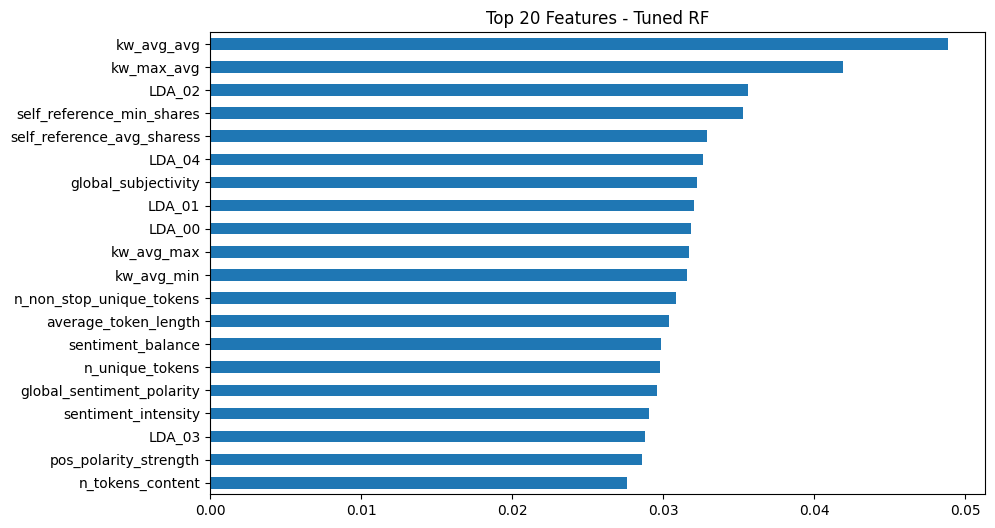

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh', figsize=(10, 6), title="Top 20 Features - Tuned RF")
plt.gca().invert_yaxis()
plt.show()